In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv('~/Downloads/training.csv')
test = pd.read_csv('~/Downloads/test.csv')
lookup = pd.read_csv('~/Downloads/IdLookupTable.csv')

na_cols = train.columns[train.isna().any()].tolist()
train = train.fillna(train[na_cols].mean())
X_train = train['Image'].apply(lambda img: np.fromstring(img, sep=' '))
X_train = np.vstack(X_train.values).reshape(-1, 96, 96).astype(np.uint8)

Y_train = train.drop(['Image'], axis=1)
Y_train = Y_train.values.astype(np.float32)

X_test = test['Image'].apply(lambda img: np.fromstring(img, sep=' '))
X_test = np.vstack(X_test.values).reshape(-1, 96, 96).astype(np.uint8)

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)

y_train = output_pipe.fit_transform(Y_train)

In [6]:
from keras.models import Sequential
from keras.layers import Activation, Dense
model = Sequential()
model.add(Dense(100, activation="relu", input_shape=(96*96,)))
model.add(Activation('relu'))
model.add(Dense(30))

In [7]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 180
history = model.fit(X_train.reshape(y_train.shape[0], -1), y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)

Instructions for updating:
Use tf.cast instead.


Train on 5639 samples, validate on 1410 samples
Epoch 1/200


  20/5639 [..............................] - ETA: 1:15 - loss: 0.3766 - acc: 0.3500

 120/5639 [..............................] - ETA: 14s - loss: 0.2928 - acc: 0.0583 

 220/5639 [>.............................] - ETA: 9s - loss: 0.1920 - acc: 0.0500 

 260/5639 [>.............................] - ETA: 9s - loss: 0.1716 - acc: 0.0577

 340/5639 [>.............................] - ETA: 7s - loss: 0.1435 - acc: 0.1206

 420/5639 [=>............................] - ETA: 6s - loss: 0.1247 - acc: 0.1762

 500/5639 [=>............................] - ETA: 6s - loss: 0.1104 - acc: 0.2200

 580/5639 [==>...........................] - ETA: 5s - loss: 0.0993 - acc: 0.2621

 660/5639 [==>...........................] - ETA: 5s - loss: 0.0897 - acc: 0.2818

 740/5639 [==>...........................] - ETA: 5s - loss: 0.0823 - acc: 0.2973

 820/5639 [===>..........................] - ETA: 4s - loss: 0.0761 - acc: 0.3122

 920/5639 [===>..........................] - ETA: 4s - loss: 0.0699 - acc: 0.3348

1020/5639 [====>.........................] - ETA: 4s - loss: 0.0645 - acc: 0.3490

1120/5639 [====>.........................] - ETA: 4s - loss: 0.0601 - acc: 0.3616

1220/5639 [=====>........................] - ETA: 3s - loss: 0.0564 - acc: 0.3730

1300/5639 [=====>........................] - ETA: 3s - loss: 0.0538 - acc: 0.3838

1380/5639 [======>.......................] - ETA: 3s - loss: 0.0514 - acc: 0.3891

1460/5639 [======>.......................] - ETA: 3s - loss: 0.0494 - acc: 0.3952

1560/5639 [=======>......................] - ETA: 3s - loss: 0.0470 - acc: 0.4032

1660/5639 [=======>......................] - ETA: 3s - loss: 0.0452 - acc: 0.4084

1740/5639 [========>.....................] - ETA: 3s - loss: 0.0437 - acc: 0.4098

1840/5639 [========>.....................] - ETA: 2s - loss: 0.0421 - acc: 0.4190

1900/5639 [=========>....................] - ETA: 2s - loss: 0.0413 - acc: 0.4205

1960/5639 [=========>....................] - ETA: 2s - loss: 0.0406 - acc: 0.4240

2040/5639 [=========>....................] - ETA: 2s - loss: 0.0395 - acc: 0.4235

2140/5639 [==========>...................] - ETA: 2s - loss: 0.0382 - acc: 0.4271

2240/5639 [==========>...................] - ETA: 2s - loss: 0.0371 - acc: 0.4295

2340/5639 [===========>..................] - ETA: 2s - loss: 0.0361 - acc: 0.4329

2440/5639 [===========>..................] - ETA: 2s - loss: 0.0350 - acc: 0.4352

2480/5639 [============>.................] - ETA: 2s - loss: 0.0347 - acc: 0.4367

2580/5639 [============>.................] - ETA: 2s - loss: 0.0338 - acc: 0.4415

2660/5639 [=============>................] - ETA: 2s - loss: 0.0332 - acc: 0.4387

2760/5639 [=============>................] - ETA: 2s - loss: 0.0325 - acc: 0.4395

2860/5639 [==============>...............] - ETA: 2s - loss: 0.0319 - acc: 0.4427

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0313 - acc: 0.4459

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0309 - acc: 0.4493

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0304 - acc: 0.4509

3260/5639 [================>.............] - ETA: 1s - loss: 0.0299 - acc: 0.4558

3360/5639 [================>.............] - ETA: 1s - loss: 0.0293 - acc: 0.4586

3460/5639 [=================>............] - ETA: 1s - loss: 0.0288 - acc: 0.4590

3560/5639 [=================>............] - ETA: 1s - loss: 0.0283 - acc: 0.4601

3660/5639 [==================>...........] - ETA: 1s - loss: 0.0280 - acc: 0.4628

3760/5639 [===================>..........] - ETA: 1s - loss: 0.0275 - acc: 0.4625

3860/5639 [===================>..........] - ETA: 1s - loss: 0.0273 - acc: 0.4640

3960/5639 [====================>.........] - ETA: 1s - loss: 0.0270 - acc: 0.4664

4060/5639 [====================>.........] - ETA: 1s - loss: 0.0267 - acc: 0.4677

4160/5639 [=====================>........] - ETA: 1s - loss: 0.0263 - acc: 0.4673

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0260 - acc: 0.4676

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0257 - acc: 0.4683

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0253 - acc: 0.4713

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0251 - acc: 0.4714

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0248 - acc: 0.4733

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0246 - acc: 0.4741

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0244 - acc: 0.4758

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0241 - acc: 0.4769

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0240 - acc: 0.4780

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0238 - acc: 0.4800



5220/5639 [==========================>...] - ETA: 0s - loss: 0.0236 - acc: 0.4801

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0234 - acc: 0.4816

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0233 - acc: 0.4822

5480/5639 [============================>.] - ETA: 0s - loss: 0.0230 - acc: 0.4830

5580/5639 [============================>.] - ETA: 0s - loss: 0.0229 - acc: 0.4830

5639/5639 [==============================] - 4s 682us/step - loss: 0.0228 - acc: 0.4832 - val_loss: 0.0067 - val_acc: 0.4936


Epoch 2/200
  20/5639 [..............................] - ETA: 3s - loss: 0.0115 - acc: 0.5500

  60/5639 [..............................] - ETA: 7s - loss: 0.0106 - acc: 0.5333

 120/5639 [..............................] - ETA: 6s - loss: 0.0112 - acc: 0.5500

 220/5639 [>.............................] - ETA: 4s - loss: 0.0108 - acc: 0.4955

 320/5639 [>.............................] - ETA: 4s - loss: 0.0127 - acc: 0.5156

 420/5639 [=>............................] - ETA: 3s - loss: 0.0139 - acc: 0.5190

 500/5639 [=>............................] - ETA: 3s - loss: 0.0137 - acc: 0.5220

 600/5639 [==>...........................] - ETA: 3s - loss: 0.0133 - acc: 0.5200

 700/5639 [==>...........................] - ETA: 3s - loss: 0.0132 - acc: 0.5214

 780/5639 [===>..........................] - ETA: 3s - loss: 0.0128 - acc: 0.5269

 880/5639 [===>..........................] - ETA: 3s - loss: 0.0128 - acc: 0.5205

 980/5639 [====>.........................] - ETA: 3s - loss: 0.0126 - acc: 0.5214

1060/5639 [====>.........................] - ETA: 3s - loss: 0.0125 - acc: 0.5198

1160/5639 [=====>........................] - ETA: 2s - loss: 0.0124 - acc: 0.5267

1240/5639 [=====>........................] - ETA: 2s - loss: 0.0124 - acc: 0.5218

1340/5639 [======>.......................] - ETA: 2s - loss: 0.0123 - acc: 0.5231

1440/5639 [======>.......................] - ETA: 2s - loss: 0.0123 - acc: 0.5194

1520/5639 [=======>......................] - ETA: 2s - loss: 0.0122 - acc: 0.5191

1620/5639 [=======>......................] - ETA: 2s - loss: 0.0122 - acc: 0.5198

1720/5639 [========>.....................] - ETA: 2s - loss: 0.0123 - acc: 0.5233

1820/5639 [========>.....................] - ETA: 2s - loss: 0.0122 - acc: 0.5236

1920/5639 [=========>....................] - ETA: 2s - loss: 0.0121 - acc: 0.5250

1980/5639 [=========>....................] - ETA: 2s - loss: 0.0121 - acc: 0.5227

2080/5639 [==========>...................] - ETA: 2s - loss: 0.0121 - acc: 0.5202

2140/5639 [==========>...................] - ETA: 2s - loss: 0.0122 - acc: 0.5210

2220/5639 [==========>...................] - ETA: 2s - loss: 0.0122 - acc: 0.5216

2300/5639 [===========>..................] - ETA: 2s - loss: 0.0122 - acc: 0.5209

2360/5639 [===========>..................] - ETA: 2s - loss: 0.0122 - acc: 0.5208

2420/5639 [===========>..................] - ETA: 2s - loss: 0.0122 - acc: 0.5186

2520/5639 [============>.................] - ETA: 2s - loss: 0.0122 - acc: 0.5194

2620/5639 [============>.................] - ETA: 1s - loss: 0.0122 - acc: 0.5168

2700/5639 [=============>................] - ETA: 1s - loss: 0.0121 - acc: 0.5137

2780/5639 [=============>................] - ETA: 1s - loss: 0.0120 - acc: 0.5158

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0119 - acc: 0.5149

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0119 - acc: 0.5164

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0119 - acc: 0.5172

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0119 - acc: 0.5189

3280/5639 [================>.............] - ETA: 1s - loss: 0.0121 - acc: 0.5174

3380/5639 [================>.............] - ETA: 1s - loss: 0.0121 - acc: 0.5145

3480/5639 [=================>............] - ETA: 1s - loss: 0.0121 - acc: 0.5149

3560/5639 [=================>............] - ETA: 1s - loss: 0.0121 - acc: 0.5157

3660/5639 [==================>...........] - ETA: 1s - loss: 0.0120 - acc: 0.5156

3760/5639 [===================>..........] - ETA: 1s - loss: 0.0120 - acc: 0.5152

3860/5639 [===================>..........] - ETA: 1s - loss: 0.0120 - acc: 0.5179

3960/5639 [====================>.........] - ETA: 1s - loss: 0.0119 - acc: 0.5184

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0121 - acc: 0.5195

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0120 - acc: 0.5192

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0122 - acc: 0.5185

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0121 - acc: 0.5170

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0121 - acc: 0.5162

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0121 - acc: 0.5159

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0121 - acc: 0.5140

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0121 - acc: 0.5146

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0121 - acc: 0.5143

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0121 - acc: 0.5150

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0120 - acc: 0.5145

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0121 - acc: 0.5134

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0120 - acc: 0.5130

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0121 - acc: 0.5115

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0121 - acc: 0.5109

5460/5639 [============================>.] - ETA: 0s - loss: 0.0121 - acc: 0.5104

5540/5639 [============================>.] - ETA: 0s - loss: 0.0121 - acc: 0.5099

5620/5639 [============================>.] - ETA: 0s - loss: 0.0120 - acc: 0.5096

5639/5639 [==============================] - 4s 646us/step - loss: 0.0120 - acc: 0.5098 - val_loss: 0.0058 - val_acc: 0.4376


Epoch 3/200
  20/5639 [..............................] - ETA: 3s - loss: 0.0121 - acc: 0.3500

  80/5639 [..............................] - ETA: 5s - loss: 0.0111 - acc: 0.4625

 120/5639 [..............................] - ETA: 6s - loss: 0.0101 - acc: 0.4667

 220/5639 [>.............................] - ETA: 4s - loss: 0.0114 - acc: 0.4955

 280/5639 [>.............................] - ETA: 4s - loss: 0.0109 - acc: 0.4857

 380/5639 [=>............................] - ETA: 4s - loss: 0.0111 - acc: 0.4737

 480/5639 [=>............................] - ETA: 3s - loss: 0.0107 - acc: 0.4583

 560/5639 [=>............................] - ETA: 3s - loss: 0.0106 - acc: 0.4768

 620/5639 [==>...........................] - ETA: 3s - loss: 0.0109 - acc: 0.4823

 660/5639 [==>...........................] - ETA: 4s - loss: 0.0108 - acc: 0.4864

 740/5639 [==>...........................] - ETA: 3s - loss: 0.0114 - acc: 0.4878

 820/5639 [===>..........................] - ETA: 3s - loss: 0.0117 - acc: 0.4878

 920/5639 [===>..........................] - ETA: 3s - loss: 0.0115 - acc: 0.4967

1020/5639 [====>.........................] - ETA: 3s - loss: 0.0118 - acc: 0.4980

1100/5639 [====>.........................] - ETA: 3s - loss: 0.0117 - acc: 0.4973

1180/5639 [=====>........................] - ETA: 3s - loss: 0.0116 - acc: 0.5000

1260/5639 [=====>........................] - ETA: 3s - loss: 0.0119 - acc: 0.5024

1340/5639 [======>.......................] - ETA: 3s - loss: 0.0119 - acc: 0.5075

1420/5639 [======>.......................] - ETA: 3s - loss: 0.0118 - acc: 0.5099

1500/5639 [======>.......................] - ETA: 2s - loss: 0.0117 - acc: 0.5127

1540/5639 [=======>......................] - ETA: 3s - loss: 0.0118 - acc: 0.5130

1580/5639 [=======>......................] - ETA: 3s - loss: 0.0119 - acc: 0.5133

1640/5639 [=======>......................] - ETA: 3s - loss: 0.0119 - acc: 0.5134

1740/5639 [========>.....................] - ETA: 2s - loss: 0.0118 - acc: 0.5080

1820/5639 [========>.....................] - ETA: 2s - loss: 0.0118 - acc: 0.5071

1920/5639 [=========>....................] - ETA: 2s - loss: 0.0118 - acc: 0.5068

2020/5639 [=========>....................] - ETA: 2s - loss: 0.0117 - acc: 0.5104

2120/5639 [==========>...................] - ETA: 2s - loss: 0.0116 - acc: 0.5075

2220/5639 [==========>...................] - ETA: 2s - loss: 0.0116 - acc: 0.5059

2300/5639 [===========>..................] - ETA: 2s - loss: 0.0116 - acc: 0.5070

2400/5639 [===========>..................] - ETA: 2s - loss: 0.0116 - acc: 0.5063

2500/5639 [============>.................] - ETA: 2s - loss: 0.0115 - acc: 0.5088

2600/5639 [============>.................] - ETA: 2s - loss: 0.0115 - acc: 0.5096

2700/5639 [=============>................] - ETA: 2s - loss: 0.0115 - acc: 0.5078

2780/5639 [=============>................] - ETA: 1s - loss: 0.0115 - acc: 0.5047

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0114 - acc: 0.5059

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0114 - acc: 0.5085

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0114 - acc: 0.5101

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0114 - acc: 0.5116

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0114 - acc: 0.5132

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0114 - acc: 0.5143

3200/5639 [================>.............] - ETA: 1s - loss: 0.0114 - acc: 0.5144

3260/5639 [================>.............] - ETA: 1s - loss: 0.0114 - acc: 0.5120

3340/5639 [================>.............] - ETA: 1s - loss: 0.0113 - acc: 0.5108

3420/5639 [=================>............] - ETA: 1s - loss: 0.0114 - acc: 0.5105

3500/5639 [=================>............] - ETA: 1s - loss: 0.0114 - acc: 0.5091

3580/5639 [==================>...........] - ETA: 1s - loss: 0.0113 - acc: 0.5075

3660/5639 [==================>...........] - ETA: 1s - loss: 0.0113 - acc: 0.5066

3740/5639 [==================>...........] - ETA: 1s - loss: 0.0112 - acc: 0.5070

3780/5639 [===================>..........] - ETA: 1s - loss: 0.0112 - acc: 0.5053

3840/5639 [===================>..........] - ETA: 1s - loss: 0.0112 - acc: 0.5042

3920/5639 [===================>..........] - ETA: 1s - loss: 0.0115 - acc: 0.5033

4000/5639 [====================>.........] - ETA: 1s - loss: 0.0114 - acc: 0.5043

4080/5639 [====================>.........] - ETA: 1s - loss: 0.0114 - acc: 0.5034

4160/5639 [=====================>........] - ETA: 1s - loss: 0.0114 - acc: 0.5038

4220/5639 [=====================>........] - ETA: 1s - loss: 0.0114 - acc: 0.5036

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0114 - acc: 0.5035

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0114 - acc: 0.5050

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0114 - acc: 0.5051

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0114 - acc: 0.5074

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0114 - acc: 0.5068

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0114 - acc: 0.5085

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0114 - acc: 0.5090

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0114 - acc: 0.5089

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0113 - acc: 0.5098

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0113 - acc: 0.5092

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0113 - acc: 0.5095

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0113 - acc: 0.5082

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0113 - acc: 0.5075

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0113 - acc: 0.5085

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0113 - acc: 0.5086

5460/5639 [============================>.] - ETA: 0s - loss: 0.0112 - acc: 0.5082

5540/5639 [============================>.] - ETA: 0s - loss: 0.0112 - acc: 0.5083

5600/5639 [============================>.] - ETA: 0s - loss: 0.0113 - acc: 0.5075

5639/5639 [==============================] - 4s 765us/step - loss: 0.0113 - acc: 0.5077 - val_loss: 0.0054 - val_acc: 0.4397


Epoch 4/200


  20/5639 [..............................] - ETA: 5s - loss: 0.0161 - acc: 0.2500

  60/5639 [..............................] - ETA: 6s - loss: 0.0126 - acc: 0.4000

 100/5639 [..............................] - ETA: 8s - loss: 0.0109 - acc: 0.4000

 180/5639 [..............................] - ETA: 6s - loss: 0.0100 - acc: 0.4000

 260/5639 [>.............................] - ETA: 5s - loss: 0.0102 - acc: 0.4269

 340/5639 [>.............................] - ETA: 5s - loss: 0.0110 - acc: 0.4676

 440/5639 [=>............................] - ETA: 4s - loss: 0.0110 - acc: 0.4773

 540/5639 [=>............................] - ETA: 4s - loss: 0.0107 - acc: 0.4944

 640/5639 [==>...........................] - ETA: 3s - loss: 0.0109 - acc: 0.4938

 740/5639 [==>...........................] - ETA: 3s - loss: 0.0109 - acc: 0.5054

 820/5639 [===>..........................] - ETA: 3s - loss: 0.0107 - acc: 0.5134

 900/5639 [===>..........................] - ETA: 3s - loss: 0.0108 - acc: 0.5122

1000/5639 [====>.........................] - ETA: 3s - loss: 0.0108 - acc: 0.5140

1100/5639 [====>.........................] - ETA: 3s - loss: 0.0107 - acc: 0.5145

1180/5639 [=====>........................] - ETA: 3s - loss: 0.0107 - acc: 0.5102

1280/5639 [=====>........................] - ETA: 2s - loss: 0.0110 - acc: 0.5141

1360/5639 [======>.......................] - ETA: 2s - loss: 0.0109 - acc: 0.5140

1460/5639 [======>.......................] - ETA: 2s - loss: 0.0112 - acc: 0.5192

1560/5639 [=======>......................] - ETA: 2s - loss: 0.0112 - acc: 0.5224

1640/5639 [=======>......................] - ETA: 2s - loss: 0.0112 - acc: 0.5220

1700/5639 [========>.....................] - ETA: 2s - loss: 0.0111 - acc: 0.5182

1760/5639 [========>.....................] - ETA: 2s - loss: 0.0110 - acc: 0.5182

1840/5639 [========>.....................] - ETA: 2s - loss: 0.0111 - acc: 0.5163

1940/5639 [=========>....................] - ETA: 2s - loss: 0.0111 - acc: 0.5186

2040/5639 [=========>....................] - ETA: 2s - loss: 0.0110 - acc: 0.5206

2140/5639 [==========>...................] - ETA: 2s - loss: 0.0112 - acc: 0.5196

2240/5639 [==========>...................] - ETA: 2s - loss: 0.0112 - acc: 0.5223

2340/5639 [===========>..................] - ETA: 2s - loss: 0.0112 - acc: 0.5184

2440/5639 [===========>..................] - ETA: 2s - loss: 0.0111 - acc: 0.5160

2540/5639 [============>.................] - ETA: 2s - loss: 0.0110 - acc: 0.5185

2640/5639 [=============>................] - ETA: 1s - loss: 0.0110 - acc: 0.5159

2740/5639 [=============>................] - ETA: 1s - loss: 0.0109 - acc: 0.5153

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0109 - acc: 0.5138

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0110 - acc: 0.5140

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0110 - acc: 0.5129

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0109 - acc: 0.5115

3220/5639 [================>.............] - ETA: 1s - loss: 0.0109 - acc: 0.5084

3280/5639 [================>.............] - ETA: 1s - loss: 0.0109 - acc: 0.5091

3320/5639 [================>.............] - ETA: 1s - loss: 0.0108 - acc: 0.5081

3400/5639 [=================>............] - ETA: 1s - loss: 0.0108 - acc: 0.5088

3500/5639 [=================>............] - ETA: 1s - loss: 0.0108 - acc: 0.5069

3560/5639 [=================>............] - ETA: 1s - loss: 0.0107 - acc: 0.5076

3640/5639 [==================>...........] - ETA: 1s - loss: 0.0107 - acc: 0.5071

3740/5639 [==================>...........] - ETA: 1s - loss: 0.0107 - acc: 0.5099

3840/5639 [===================>..........] - ETA: 1s - loss: 0.0107 - acc: 0.5107

3940/5639 [===================>..........] - ETA: 1s - loss: 0.0107 - acc: 0.5132

4040/5639 [====================>.........] - ETA: 1s - loss: 0.0108 - acc: 0.5129

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0108 - acc: 0.5129

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0109 - acc: 0.5114

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0108 - acc: 0.5127

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0108 - acc: 0.5116

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0108 - acc: 0.5123

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0108 - acc: 0.5128

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0108 - acc: 0.5131

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0107 - acc: 0.5133

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0107 - acc: 0.5126

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0107 - acc: 0.5130

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0107 - acc: 0.5122

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0108 - acc: 0.5126

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0107 - acc: 0.5123

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0107 - acc: 0.5107

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0107 - acc: 0.5115

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0108 - acc: 0.5096



5480/5639 [============================>.] - ETA: 0s - loss: 0.0108 - acc: 0.5089

5540/5639 [============================>.] - ETA: 0s - loss: 0.0108 - acc: 0.5094

5639/5639 [==============================] - 4s 671us/step - loss: 0.0108 - acc: 0.5091 - val_loss: 0.0051 - val_acc: 0.4447


Epoch 5/200
  20/5639 [..............................] - ETA: 4s - loss: 0.0081 - acc: 0.5500

  60/5639 [..............................] - ETA: 7s - loss: 0.0084 - acc: 0.5500

 100/5639 [..............................] - ETA: 7s - loss: 0.0101 - acc: 0.5200

 180/5639 [..............................] - ETA: 5s - loss: 0.0097 - acc: 0.4944

 260/5639 [>.............................] - ETA: 4s - loss: 0.0106 - acc: 0.4769

 360/5639 [>.............................] - ETA: 4s - loss: 0.0100 - acc: 0.4750

 460/5639 [=>............................] - ETA: 3s - loss: 0.0105 - acc: 0.4783

 540/5639 [=>............................] - ETA: 3s - loss: 0.0106 - acc: 0.4870

 620/5639 [==>...........................] - ETA: 3s - loss: 0.0105 - acc: 0.4806

 700/5639 [==>...........................] - ETA: 3s - loss: 0.0104 - acc: 0.4900

 780/5639 [===>..........................] - ETA: 3s - loss: 0.0107 - acc: 0.4949

 880/5639 [===>..........................] - ETA: 3s - loss: 0.0106 - acc: 0.4886

 960/5639 [====>.........................] - ETA: 3s - loss: 0.0104 - acc: 0.4844

1040/5639 [====>.........................] - ETA: 3s - loss: 0.0103 - acc: 0.4846

1140/5639 [=====>........................] - ETA: 3s - loss: 0.0101 - acc: 0.4877

1240/5639 [=====>........................] - ETA: 2s - loss: 0.0102 - acc: 0.4895

1320/5639 [======>.......................] - ETA: 2s - loss: 0.0102 - acc: 0.4932

1420/5639 [======>.......................] - ETA: 2s - loss: 0.0100 - acc: 0.4986

1520/5639 [=======>......................] - ETA: 2s - loss: 0.0101 - acc: 0.4967

1600/5639 [=======>......................] - ETA: 2s - loss: 0.0102 - acc: 0.4925

1660/5639 [=======>......................] - ETA: 2s - loss: 0.0101 - acc: 0.4970

1700/5639 [========>.....................] - ETA: 2s - loss: 0.0101 - acc: 0.4959

1780/5639 [========>.....................] - ETA: 2s - loss: 0.0101 - acc: 0.4949

1860/5639 [========>.....................] - ETA: 2s - loss: 0.0103 - acc: 0.4957

1940/5639 [=========>....................] - ETA: 2s - loss: 0.0103 - acc: 0.4912

2040/5639 [=========>....................] - ETA: 2s - loss: 0.0103 - acc: 0.4897

2140/5639 [==========>...................] - ETA: 2s - loss: 0.0103 - acc: 0.4883

2220/5639 [==========>...................] - ETA: 2s - loss: 0.0103 - acc: 0.4878

2300/5639 [===========>..................] - ETA: 2s - loss: 0.0103 - acc: 0.4900

2380/5639 [===========>..................] - ETA: 2s - loss: 0.0103 - acc: 0.4874

2460/5639 [============>.................] - ETA: 2s - loss: 0.0103 - acc: 0.4882

2520/5639 [============>.................] - ETA: 2s - loss: 0.0103 - acc: 0.4909

2580/5639 [============>.................] - ETA: 2s - loss: 0.0103 - acc: 0.4938

2660/5639 [=============>................] - ETA: 2s - loss: 0.0104 - acc: 0.4951

2740/5639 [=============>................] - ETA: 2s - loss: 0.0103 - acc: 0.4938

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0102 - acc: 0.4957

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0102 - acc: 0.4966

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0102 - acc: 0.4963

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0103 - acc: 0.4961

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0103 - acc: 0.4971

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0103 - acc: 0.4975

3260/5639 [================>.............] - ETA: 1s - loss: 0.0103 - acc: 0.4982

3320/5639 [================>.............] - ETA: 1s - loss: 0.0103 - acc: 0.4985

3400/5639 [=================>............] - ETA: 1s - loss: 0.0105 - acc: 0.4991

3480/5639 [=================>............] - ETA: 1s - loss: 0.0106 - acc: 0.5000

3560/5639 [=================>............] - ETA: 1s - loss: 0.0105 - acc: 0.4978

3640/5639 [==================>...........] - ETA: 1s - loss: 0.0105 - acc: 0.4975

3740/5639 [==================>...........] - ETA: 1s - loss: 0.0105 - acc: 0.4984

3840/5639 [===================>..........] - ETA: 1s - loss: 0.0104 - acc: 0.4982

3900/5639 [===================>..........] - ETA: 1s - loss: 0.0104 - acc: 0.4995

3960/5639 [====================>.........] - ETA: 1s - loss: 0.0105 - acc: 0.5008

4060/5639 [====================>.........] - ETA: 1s - loss: 0.0104 - acc: 0.5005

4160/5639 [=====================>........] - ETA: 1s - loss: 0.0104 - acc: 0.5012

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0105 - acc: 0.5033

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0105 - acc: 0.5030

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0105 - acc: 0.5041

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0105 - acc: 0.5043

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0105 - acc: 0.5051

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0104 - acc: 0.5056

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0104 - acc: 0.5059

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0104 - acc: 0.5059

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0104 - acc: 0.5044

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0104 - acc: 0.5035

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0104 - acc: 0.5025

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0104 - acc: 0.5023

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0104 - acc: 0.5017

5520/5639 [============================>.] - ETA: 0s - loss: 0.0104 - acc: 0.5024

5580/5639 [============================>.] - ETA: 0s - loss: 0.0104 - acc: 0.5020

5639/5639 [==============================] - 4s 715us/step - loss: 0.0104 - acc: 0.5024 - val_loss: 0.0049 - val_acc: 0.4191


Epoch 6/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0090 - acc: 0.5000

 120/5639 [..............................] - ETA: 2s - loss: 0.0096 - acc: 0.5250

 240/5639 [>.............................] - ETA: 2s - loss: 0.0100 - acc: 0.5417

 340/5639 [>.............................] - ETA: 2s - loss: 0.0097 - acc: 0.5118

 440/5639 [=>............................] - ETA: 2s - loss: 0.0094 - acc: 0.5205

 540/5639 [=>............................] - ETA: 2s - loss: 0.0094 - acc: 0.5148

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0106 - acc: 0.5203

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0105 - acc: 0.5118

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0116 - acc: 0.5000

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0115 - acc: 0.4990

1080/5639 [====>.........................] - ETA: 2s - loss: 0.0115 - acc: 0.4954

1180/5639 [=====>........................] - ETA: 2s - loss: 0.0115 - acc: 0.4924

1280/5639 [=====>........................] - ETA: 2s - loss: 0.0114 - acc: 0.4891

1380/5639 [======>.......................] - ETA: 2s - loss: 0.0111 - acc: 0.4928

1480/5639 [======>.......................] - ETA: 2s - loss: 0.0110 - acc: 0.4973

1580/5639 [=======>......................] - ETA: 2s - loss: 0.0108 - acc: 0.4994

1680/5639 [=======>......................] - ETA: 2s - loss: 0.0108 - acc: 0.4952

1760/5639 [========>.....................] - ETA: 2s - loss: 0.0107 - acc: 0.4955

1860/5639 [========>.....................] - ETA: 2s - loss: 0.0107 - acc: 0.4968

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0105 - acc: 0.4939

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0105 - acc: 0.4937

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0104 - acc: 0.4931

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0103 - acc: 0.4925

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0103 - acc: 0.4941

2480/5639 [============>.................] - ETA: 1s - loss: 0.0103 - acc: 0.4952

2580/5639 [============>.................] - ETA: 1s - loss: 0.0103 - acc: 0.4977

2680/5639 [=============>................] - ETA: 1s - loss: 0.0102 - acc: 0.5026

2780/5639 [=============>................] - ETA: 1s - loss: 0.0101 - acc: 0.5029

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0101 - acc: 0.5014

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0101 - acc: 0.5010

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0100 - acc: 0.5003

3200/5639 [================>.............] - ETA: 1s - loss: 0.0101 - acc: 0.5028

3300/5639 [================>.............] - ETA: 1s - loss: 0.0101 - acc: 0.5030

3400/5639 [=================>............] - ETA: 1s - loss: 0.0101 - acc: 0.5018

3520/5639 [=================>............] - ETA: 1s - loss: 0.0100 - acc: 0.5028

3620/5639 [==================>...........] - ETA: 1s - loss: 0.0100 - acc: 0.5022

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0100 - acc: 0.5030

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0099 - acc: 0.5045

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0101 - acc: 0.5023

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0101 - acc: 0.5025

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0101 - acc: 0.5000

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0100 - acc: 0.5000

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0100 - acc: 0.5016

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0101 - acc: 0.5007

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0100 - acc: 0.5024

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0100 - acc: 0.5019

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0100 - acc: 0.5027

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0101 - acc: 0.5030

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0101 - acc: 0.5016

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0101 - acc: 0.5010

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0101 - acc: 0.5000

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0101 - acc: 0.5017

5560/5639 [============================>.] - ETA: 0s - loss: 0.0101 - acc: 0.5000

5639/5639 [==============================] - 3s 525us/step - loss: 0.0100 - acc: 0.4996 - val_loss: 0.0046 - val_acc: 0.4674


Epoch 7/200


  20/5639 [..............................] - ETA: 3s - loss: 0.0110 - acc: 0.5500

 140/5639 [..............................] - ETA: 2s - loss: 0.0079 - acc: 0.4286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0092 - acc: 0.4923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0089 - acc: 0.4816

 500/5639 [=>............................] - ETA: 2s - loss: 0.0088 - acc: 0.4880

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0087 - acc: 0.4871

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0087 - acc: 0.4946

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0091 - acc: 0.4802

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0092 - acc: 0.4888

1100/5639 [====>.........................] - ETA: 2s - loss: 0.0090 - acc: 0.4845

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0090 - acc: 0.4852

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0093 - acc: 0.4970

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0093 - acc: 0.4904

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0095 - acc: 0.4930

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0097 - acc: 0.4929

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0097 - acc: 0.4951

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0097 - acc: 0.4959

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0096 - acc: 0.4995

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0096 - acc: 0.4986

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0096 - acc: 0.4978

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0095 - acc: 0.4996

2540/5639 [============>.................] - ETA: 1s - loss: 0.0094 - acc: 0.5012

2660/5639 [=============>................] - ETA: 1s - loss: 0.0095 - acc: 0.5026

2780/5639 [=============>................] - ETA: 1s - loss: 0.0095 - acc: 0.5025

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0095 - acc: 0.5045

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0096 - acc: 0.5063

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0096 - acc: 0.5045

3260/5639 [================>.............] - ETA: 1s - loss: 0.0095 - acc: 0.5049

3380/5639 [================>.............] - ETA: 0s - loss: 0.0098 - acc: 0.5038

3500/5639 [=================>............] - ETA: 0s - loss: 0.0098 - acc: 0.5029

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0099 - acc: 0.5014

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0099 - acc: 0.5008

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0099 - acc: 0.4995

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0099 - acc: 0.4969

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0098 - acc: 0.4985

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0098 - acc: 0.4970

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0098 - acc: 0.4974

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0098 - acc: 0.4951

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0098 - acc: 0.4939

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0098 - acc: 0.4936

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0098 - acc: 0.4935

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0097 - acc: 0.4945

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0097 - acc: 0.4949

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0097 - acc: 0.4942

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0097 - acc: 0.4949

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0097 - acc: 0.4958

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0097 - acc: 0.4957

5480/5639 [============================>.] - ETA: 0s - loss: 0.0097 - acc: 0.4953

5600/5639 [============================>.] - ETA: 0s - loss: 0.0097 - acc: 0.4970

5639/5639 [==============================] - 3s 471us/step - loss: 0.0098 - acc: 0.4962 - val_loss: 0.0045 - val_acc: 0.4248


Epoch 8/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0080 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0084 - acc: 0.5286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0087 - acc: 0.5192

 380/5639 [=>............................] - ETA: 2s - loss: 0.0087 - acc: 0.4737

 500/5639 [=>............................] - ETA: 2s - loss: 0.0086 - acc: 0.4560

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0083 - acc: 0.4548

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0084 - acc: 0.4689

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0083 - acc: 0.4826

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0085 - acc: 0.4847

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0091 - acc: 0.4755

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0091 - acc: 0.4779

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0092 - acc: 0.4821

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0096 - acc: 0.4842

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0097 - acc: 0.4816

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0096 - acc: 0.4859

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0096 - acc: 0.4885

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0097 - acc: 0.4881



2060/5639 [=========>....................] - ETA: 1s - loss: 0.0096 - acc: 0.4908

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0097 - acc: 0.4862

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0097 - acc: 0.4874

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0096 - acc: 0.4876

2540/5639 [============>.................] - ETA: 1s - loss: 0.0095 - acc: 0.4906

2660/5639 [=============>................] - ETA: 1s - loss: 0.0094 - acc: 0.4902

2780/5639 [=============>................] - ETA: 1s - loss: 0.0094 - acc: 0.4878

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0094 - acc: 0.4876

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0093 - acc: 0.4894

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0094 - acc: 0.4869

3260/5639 [================>.............] - ETA: 1s - loss: 0.0093 - acc: 0.4883

3380/5639 [================>.............] - ETA: 0s - loss: 0.0092 - acc: 0.4920

3500/5639 [=================>............] - ETA: 0s - loss: 0.0094 - acc: 0.4909

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0093 - acc: 0.4928

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0093 - acc: 0.4918

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0093 - acc: 0.4916

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0094 - acc: 0.4921

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0094 - acc: 0.4906

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0094 - acc: 0.4877

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0094 - acc: 0.4890

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0094 - acc: 0.4893

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0096 - acc: 0.4900



4640/5639 [=======================>......] - ETA: 0s - loss: 0.0095 - acc: 0.4903

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0095 - acc: 0.4914

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0094 - acc: 0.4918

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0094 - acc: 0.4910

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0094 - acc: 0.4920

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0094 - acc: 0.4924

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0095 - acc: 0.4910

5480/5639 [============================>.] - ETA: 0s - loss: 0.0095 - acc: 0.4918

5600/5639 [============================>.] - ETA: 0s - loss: 0.0095 - acc: 0.4934

5639/5639 [==============================] - 3s 458us/step - loss: 0.0095 - acc: 0.4933 - val_loss: 0.0043 - val_acc: 0.4121


Epoch 9/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0085 - acc: 0.6000



 140/5639 [..............................] - ETA: 2s - loss: 0.0076 - acc: 0.5214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0074 - acc: 0.4962

 380/5639 [=>............................] - ETA: 2s - loss: 0.0078 - acc: 0.4974

 500/5639 [=>............................] - ETA: 2s - loss: 0.0081 - acc: 0.4880

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0082 - acc: 0.4694

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0080 - acc: 0.4743

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0079 - acc: 0.4837

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0085 - acc: 0.4745

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0088 - acc: 0.4727

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0089 - acc: 0.4787

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0088 - acc: 0.4851

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0088 - acc: 0.4788

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0090 - acc: 0.4741

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0089 - acc: 0.4771

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0093 - acc: 0.4830

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0092 - acc: 0.4835

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0092 - acc: 0.4859

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0092 - acc: 0.4862

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0092 - acc: 0.4848

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0093 - acc: 0.4864

2540/5639 [============>.................] - ETA: 1s - loss: 0.0092 - acc: 0.4882

2660/5639 [=============>................] - ETA: 1s - loss: 0.0092 - acc: 0.4880

2780/5639 [=============>................] - ETA: 1s - loss: 0.0092 - acc: 0.4885

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0091 - acc: 0.4883

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0092 - acc: 0.4914

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0093 - acc: 0.4917

3220/5639 [================>.............] - ETA: 1s - loss: 0.0093 - acc: 0.4913

3340/5639 [================>.............] - ETA: 1s - loss: 0.0094 - acc: 0.4919

3460/5639 [=================>............] - ETA: 0s - loss: 0.0094 - acc: 0.4890

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0094 - acc: 0.4908

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0095 - acc: 0.4897

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0095 - acc: 0.4893

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0095 - acc: 0.4891

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0094 - acc: 0.4892

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0094 - acc: 0.4911

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0093 - acc: 0.4902

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0093 - acc: 0.4903

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0093 - acc: 0.4905

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0093 - acc: 0.4927

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0092 - acc: 0.4933

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0092 - acc: 0.4949

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0092 - acc: 0.4948

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0091 - acc: 0.4971

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0091 - acc: 0.4969

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0091 - acc: 0.4976

5500/5639 [============================>.] - ETA: 0s - loss: 0.0092 - acc: 0.4984

5620/5639 [============================>.] - ETA: 0s - loss: 0.0092 - acc: 0.4984

5639/5639 [==============================] - 3s 465us/step - loss: 0.0092 - acc: 0.4981 - val_loss: 0.0044 - val_acc: 0.3794


Epoch 10/200
  20/5639 [..............................] - ETA: 3s - loss: 0.0158 - acc: 0.2500

 140/5639 [..............................] - ETA: 2s - loss: 0.0138 - acc: 0.4571

 260/5639 [>.............................] - ETA: 2s - loss: 0.0106 - acc: 0.5038

 380/5639 [=>............................] - ETA: 2s - loss: 0.0100 - acc: 0.4763

 500/5639 [=>............................] - ETA: 2s - loss: 0.0098 - acc: 0.4920

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0097 - acc: 0.4790

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0096 - acc: 0.4919

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0093 - acc: 0.5012

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0093 - acc: 0.5031

1100/5639 [====>.........................] - ETA: 2s - loss: 0.0095 - acc: 0.5055

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0093 - acc: 0.5049

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0092 - acc: 0.5000

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0091 - acc: 0.5034

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0091 - acc: 0.5076

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0091 - acc: 0.5035

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0091 - acc: 0.4973

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0089 - acc: 0.5052

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0089 - acc: 0.5049

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0089 - acc: 0.5055

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0089 - acc: 0.5052

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0089 - acc: 0.5046

2500/5639 [============>.................] - ETA: 1s - loss: 0.0090 - acc: 0.5024

2620/5639 [============>.................] - ETA: 1s - loss: 0.0091 - acc: 0.5027

2740/5639 [=============>................] - ETA: 1s - loss: 0.0092 - acc: 0.5051

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0091 - acc: 0.5031

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0093 - acc: 0.5044

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0093 - acc: 0.5016

3220/5639 [================>.............] - ETA: 1s - loss: 0.0092 - acc: 0.5003

3340/5639 [================>.............] - ETA: 1s - loss: 0.0091 - acc: 0.4997

3460/5639 [=================>............] - ETA: 0s - loss: 0.0091 - acc: 0.5014



3560/5639 [=================>............] - ETA: 0s - loss: 0.0091 - acc: 0.5014

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0091 - acc: 0.5000

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0091 - acc: 0.5000

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0090 - acc: 0.4997

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0090 - acc: 0.4970



4140/5639 [=====================>........] - ETA: 0s - loss: 0.0090 - acc: 0.4959

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0089 - acc: 0.4960

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0090 - acc: 0.4959

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0090 - acc: 0.4976

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0090 - acc: 0.4968

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0090 - acc: 0.4964

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0090 - acc: 0.4975

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0090 - acc: 0.4964

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0090 - acc: 0.4964

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0089 - acc: 0.4984

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0090 - acc: 0.4985

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0090 - acc: 0.4970

5520/5639 [============================>.] - ETA: 0s - loss: 0.0090 - acc: 0.4978

5639/5639 [==============================] - 3s 479us/step - loss: 0.0090 - acc: 0.4978 - val_loss: 0.0046 - val_acc: 0.4206


Epoch 11/200
  20/5639 [..............................] - ETA: 3s - loss: 0.0112 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0076 - acc: 0.5571

 260/5639 [>.............................] - ETA: 2s - loss: 0.0076 - acc: 0.5077

 380/5639 [=>............................] - ETA: 2s - loss: 0.0079 - acc: 0.5342

 500/5639 [=>............................] - ETA: 2s - loss: 0.0084 - acc: 0.5200

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0083 - acc: 0.5242

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0081 - acc: 0.5230

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0081 - acc: 0.5198

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0081 - acc: 0.5112

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0081 - acc: 0.5145

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0081 - acc: 0.5139

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0080 - acc: 0.5172

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0079 - acc: 0.5111

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0082 - acc: 0.5083

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0082 - acc: 0.5119

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0082 - acc: 0.5122

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0083 - acc: 0.5078

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0083 - acc: 0.5069

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0085 - acc: 0.5042

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0085 - acc: 0.5048

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0085 - acc: 0.5025

2520/5639 [============>.................] - ETA: 1s - loss: 0.0086 - acc: 0.4996

2640/5639 [=============>................] - ETA: 1s - loss: 0.0086 - acc: 0.5011

2760/5639 [=============>................] - ETA: 1s - loss: 0.0086 - acc: 0.5000

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0086 - acc: 0.4976

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0086 - acc: 0.4940

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0086 - acc: 0.4929

3240/5639 [================>.............] - ETA: 1s - loss: 0.0086 - acc: 0.4923

3360/5639 [================>.............] - ETA: 0s - loss: 0.0086 - acc: 0.4937

3480/5639 [=================>............] - ETA: 0s - loss: 0.0088 - acc: 0.4951

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0088 - acc: 0.4942

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0088 - acc: 0.4941

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0088 - acc: 0.4917

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0088 - acc: 0.4924

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0087 - acc: 0.4934

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0087 - acc: 0.4938

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0087 - acc: 0.4947

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0087 - acc: 0.4947

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0087 - acc: 0.4967

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0087 - acc: 0.4946

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0087 - acc: 0.4939

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0087 - acc: 0.4944

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0088 - acc: 0.4937

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0088 - acc: 0.4945

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0088 - acc: 0.4948

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0088 - acc: 0.4949

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0088 - acc: 0.4961

5560/5639 [============================>.] - ETA: 0s - loss: 0.0088 - acc: 0.4977

5639/5639 [==============================] - 3s 474us/step - loss: 0.0088 - acc: 0.4976 - val_loss: 0.0041 - val_acc: 0.4525


Epoch 12/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0084 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0069 - acc: 0.5857

 260/5639 [>.............................] - ETA: 2s - loss: 0.0082 - acc: 0.5731

 380/5639 [=>............................] - ETA: 2s - loss: 0.0081 - acc: 0.5474

 480/5639 [=>............................] - ETA: 2s - loss: 0.0088 - acc: 0.5146

 580/5639 [==>...........................] - ETA: 2s - loss: 0.0087 - acc: 0.5086

 700/5639 [==>...........................] - ETA: 2s - loss: 0.0090 - acc: 0.5043

 820/5639 [===>..........................] - ETA: 2s - loss: 0.0088 - acc: 0.4915

 940/5639 [====>.........................] - ETA: 2s - loss: 0.0085 - acc: 0.5053

1060/5639 [====>.........................] - ETA: 2s - loss: 0.0083 - acc: 0.5094

1160/5639 [=====>........................] - ETA: 2s - loss: 0.0083 - acc: 0.5121

1280/5639 [=====>........................] - ETA: 1s - loss: 0.0086 - acc: 0.5070

1400/5639 [======>.......................] - ETA: 1s - loss: 0.0086 - acc: 0.5029

1520/5639 [=======>......................] - ETA: 1s - loss: 0.0084 - acc: 0.4980

1640/5639 [=======>......................] - ETA: 1s - loss: 0.0082 - acc: 0.4963

1760/5639 [========>.....................] - ETA: 1s - loss: 0.0085 - acc: 0.4966

1880/5639 [=========>....................] - ETA: 1s - loss: 0.0089 - acc: 0.4952

2000/5639 [=========>....................] - ETA: 1s - loss: 0.0090 - acc: 0.4955

2120/5639 [==========>...................] - ETA: 1s - loss: 0.0089 - acc: 0.4939

2240/5639 [==========>...................] - ETA: 1s - loss: 0.0090 - acc: 0.4951

2360/5639 [===========>..................] - ETA: 1s - loss: 0.0091 - acc: 0.4983

2480/5639 [============>.................] - ETA: 1s - loss: 0.0089 - acc: 0.4996

2600/5639 [============>.................] - ETA: 1s - loss: 0.0088 - acc: 0.5019

2720/5639 [=============>................] - ETA: 1s - loss: 0.0088 - acc: 0.5048

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0088 - acc: 0.5039



2960/5639 [==============>...............] - ETA: 1s - loss: 0.0088 - acc: 0.5054

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0089 - acc: 0.5049

3200/5639 [================>.............] - ETA: 1s - loss: 0.0089 - acc: 0.5012

3320/5639 [================>.............] - ETA: 1s - loss: 0.0090 - acc: 0.5003

3440/5639 [=================>............] - ETA: 0s - loss: 0.0090 - acc: 0.4983

3560/5639 [=================>............] - ETA: 0s - loss: 0.0090 - acc: 0.4983

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0090 - acc: 0.4986

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0089 - acc: 0.4997

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0088 - acc: 0.5013

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0088 - acc: 0.5045

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0088 - acc: 0.5055

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0088 - acc: 0.5058

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0088 - acc: 0.5052

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0088 - acc: 0.5066

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0088 - acc: 0.5063

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0088 - acc: 0.5063

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0087 - acc: 0.5047

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0088 - acc: 0.5046

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0088 - acc: 0.5061

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0087 - acc: 0.5067

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0087 - acc: 0.5076

5480/5639 [============================>.] - ETA: 0s - loss: 0.0087 - acc: 0.5078

5600/5639 [============================>.] - ETA: 0s - loss: 0.0087 - acc: 0.5071

5639/5639 [==============================] - 3s 463us/step - loss: 0.0087 - acc: 0.5079 - val_loss: 0.0040 - val_acc: 0.4277


Epoch 13/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0069 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0096 - acc: 0.5500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0086 - acc: 0.5192

 380/5639 [=>............................] - ETA: 2s - loss: 0.0090 - acc: 0.5184

 500/5639 [=>............................] - ETA: 2s - loss: 0.0088 - acc: 0.5260

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0091 - acc: 0.5339

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0091 - acc: 0.5311

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0091 - acc: 0.5326

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0089 - acc: 0.5327

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0091 - acc: 0.5327

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0089 - acc: 0.5320

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0090 - acc: 0.5291

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0089 - acc: 0.5342

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0089 - acc: 0.5291

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0092 - acc: 0.5268

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0092 - acc: 0.5272

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0092 - acc: 0.5250

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0092 - acc: 0.5235

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0091 - acc: 0.5236

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0090 - acc: 0.5276

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0090 - acc: 0.5300

2520/5639 [============>.................] - ETA: 1s - loss: 0.0090 - acc: 0.5238

2640/5639 [=============>................] - ETA: 1s - loss: 0.0089 - acc: 0.5227

2760/5639 [=============>................] - ETA: 1s - loss: 0.0089 - acc: 0.5221

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0087 - acc: 0.5247

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0087 - acc: 0.5247

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0089 - acc: 0.5272

3240/5639 [================>.............] - ETA: 1s - loss: 0.0088 - acc: 0.5296

3360/5639 [================>.............] - ETA: 0s - loss: 0.0088 - acc: 0.5268

3480/5639 [=================>............] - ETA: 0s - loss: 0.0087 - acc: 0.5284

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0087 - acc: 0.5303

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0087 - acc: 0.5288

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0086 - acc: 0.5297

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0086 - acc: 0.5283

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0085 - acc: 0.5257

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0085 - acc: 0.5248

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0085 - acc: 0.5266

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0085 - acc: 0.5261

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0085 - acc: 0.5261

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0086 - acc: 0.5252

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0087 - acc: 0.5263

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0087 - acc: 0.5291

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0086 - acc: 0.5306

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0086 - acc: 0.5295

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0086 - acc: 0.5295

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0085 - acc: 0.5293

5520/5639 [============================>.] - ETA: 0s - loss: 0.0085 - acc: 0.5288

5639/5639 [==============================] - 3s 455us/step - loss: 0.0085 - acc: 0.5293 - val_loss: 0.0042 - val_acc: 0.4674


Epoch 14/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0144 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0084 - acc: 0.5429

 260/5639 [>.............................] - ETA: 2s - loss: 0.0078 - acc: 0.5192

 380/5639 [=>............................] - ETA: 2s - loss: 0.0080 - acc: 0.5421

 420/5639 [=>............................] - ETA: 2s - loss: 0.0079 - acc: 0.5476

 540/5639 [=>............................] - ETA: 2s - loss: 0.0078 - acc: 0.5574

 660/5639 [==>...........................] - ETA: 2s - loss: 0.0076 - acc: 0.5500

 780/5639 [===>..........................] - ETA: 2s - loss: 0.0076 - acc: 0.5423

 900/5639 [===>..........................] - ETA: 2s - loss: 0.0076 - acc: 0.5422

1020/5639 [====>.........................] - ETA: 2s - loss: 0.0075 - acc: 0.5441

1140/5639 [=====>........................] - ETA: 2s - loss: 0.0076 - acc: 0.5482

1260/5639 [=====>........................] - ETA: 2s - loss: 0.0074 - acc: 0.5429

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0078 - acc: 0.5478



1500/5639 [======>.......................] - ETA: 1s - loss: 0.0082 - acc: 0.5493

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0081 - acc: 0.5549

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0084 - acc: 0.5580

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0083 - acc: 0.5554

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0084 - acc: 0.5515

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0083 - acc: 0.5495

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0083 - acc: 0.5545

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0082 - acc: 0.5538

2460/5639 [============>.................] - ETA: 1s - loss: 0.0082 - acc: 0.5512



2580/5639 [============>.................] - ETA: 1s - loss: 0.0081 - acc: 0.5500

2700/5639 [=============>................] - ETA: 1s - loss: 0.0082 - acc: 0.5481

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0083 - acc: 0.5468

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0084 - acc: 0.5490

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0084 - acc: 0.5474

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0084 - acc: 0.5456

3300/5639 [================>.............] - ETA: 1s - loss: 0.0084 - acc: 0.5452

3420/5639 [=================>............] - ETA: 0s - loss: 0.0086 - acc: 0.5453

3540/5639 [=================>............] - ETA: 0s - loss: 0.0086 - acc: 0.5427

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0086 - acc: 0.5396

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0086 - acc: 0.5394

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0086 - acc: 0.5408

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0087 - acc: 0.5398

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0087 - acc: 0.5391

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0087 - acc: 0.5385

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0086 - acc: 0.5397

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0086 - acc: 0.5404

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0086 - acc: 0.5398

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0085 - acc: 0.5395

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0085 - acc: 0.5418

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0085 - acc: 0.5418

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0085 - acc: 0.5439

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0084 - acc: 0.5450

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0084 - acc: 0.5440

5480/5639 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.5445

5600/5639 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.5450

5639/5639 [==============================] - 3s 462us/step - loss: 0.0084 - acc: 0.5457 - val_loss: 0.0039 - val_acc: 0.4965


Epoch 15/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0053 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0061 - acc: 0.6143

 260/5639 [>.............................] - ETA: 2s - loss: 0.0075 - acc: 0.5538

 380/5639 [=>............................] - ETA: 2s - loss: 0.0075 - acc: 0.5553

 500/5639 [=>............................] - ETA: 2s - loss: 0.0077 - acc: 0.5520

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0077 - acc: 0.5613

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0077 - acc: 0.5635

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0086 - acc: 0.5651

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0087 - acc: 0.5724

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0085 - acc: 0.5700

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0087 - acc: 0.5656

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0087 - acc: 0.5619

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0087 - acc: 0.5596

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0087 - acc: 0.5595

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0088 - acc: 0.5576

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0089 - acc: 0.5599

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0088 - acc: 0.5582

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0091 - acc: 0.5549

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0090 - acc: 0.5541

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0090 - acc: 0.5557

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0089 - acc: 0.5574

2540/5639 [============>.................] - ETA: 1s - loss: 0.0088 - acc: 0.5555

2660/5639 [=============>................] - ETA: 1s - loss: 0.0088 - acc: 0.5571

2780/5639 [=============>................] - ETA: 1s - loss: 0.0088 - acc: 0.5583

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0087 - acc: 0.5600

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0087 - acc: 0.5626

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0086 - acc: 0.5615

3260/5639 [================>.............] - ETA: 1s - loss: 0.0087 - acc: 0.5629

3380/5639 [================>.............] - ETA: 0s - loss: 0.0086 - acc: 0.5660

3480/5639 [=================>............] - ETA: 0s - loss: 0.0086 - acc: 0.5649

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0085 - acc: 0.5665

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0085 - acc: 0.5659

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0084 - acc: 0.5675

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0084 - acc: 0.5693

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0084 - acc: 0.5692

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0084 - acc: 0.5691

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0083 - acc: 0.5688

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0083 - acc: 0.5690

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0083 - acc: 0.5709

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0082 - acc: 0.5711

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0082 - acc: 0.5705

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0083 - acc: 0.5723

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0082 - acc: 0.5728

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0082 - acc: 0.5706

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0083 - acc: 0.5707

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0083 - acc: 0.5714

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0083 - acc: 0.5689

5520/5639 [============================>.] - ETA: 0s - loss: 0.0083 - acc: 0.5694

5620/5639 [============================>.] - ETA: 0s - loss: 0.0083 - acc: 0.5692

5639/5639 [==============================] - 3s 471us/step - loss: 0.0083 - acc: 0.5696 - val_loss: 0.0040 - val_acc: 0.5333


Epoch 16/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0042 - acc: 0.5500

 140/5639 [..............................] - ETA: 2s - loss: 0.0064 - acc: 0.5286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0067 - acc: 0.5423

 380/5639 [=>............................] - ETA: 2s - loss: 0.0091 - acc: 0.5553

 500/5639 [=>............................] - ETA: 2s - loss: 0.0086 - acc: 0.5700

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0083 - acc: 0.5661

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0083 - acc: 0.5581

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0084 - acc: 0.5674

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0081 - acc: 0.5670

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0080 - acc: 0.5661

1260/5639 [=====>........................] - ETA: 1s - loss: 0.0082 - acc: 0.5643

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0081 - acc: 0.5667

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0081 - acc: 0.5667

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0082 - acc: 0.5679



1740/5639 [========>.....................] - ETA: 1s - loss: 0.0082 - acc: 0.5678

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0082 - acc: 0.5624

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0082 - acc: 0.5646

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0081 - acc: 0.5638

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0081 - acc: 0.5658

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0081 - acc: 0.5671

2460/5639 [============>.................] - ETA: 1s - loss: 0.0082 - acc: 0.5638

2580/5639 [============>.................] - ETA: 1s - loss: 0.0082 - acc: 0.5636

2700/5639 [=============>................] - ETA: 1s - loss: 0.0084 - acc: 0.5652

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0084 - acc: 0.5642

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0083 - acc: 0.5663

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0083 - acc: 0.5690

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0083 - acc: 0.5708

3300/5639 [================>.............] - ETA: 0s - loss: 0.0083 - acc: 0.5709

3420/5639 [=================>............] - ETA: 0s - loss: 0.0082 - acc: 0.5722

3540/5639 [=================>............] - ETA: 0s - loss: 0.0082 - acc: 0.5695

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0084 - acc: 0.5702

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0084 - acc: 0.5730

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0083 - acc: 0.5723

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0083 - acc: 0.5721

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0083 - acc: 0.5710

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0084 - acc: 0.5685

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0083 - acc: 0.5696

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0083 - acc: 0.5707

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0083 - acc: 0.5701

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0083 - acc: 0.5708

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0083 - acc: 0.5715

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0083 - acc: 0.5716

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0083 - acc: 0.5721

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0083 - acc: 0.5723

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0082 - acc: 0.5739

5480/5639 [============================>.] - ETA: 0s - loss: 0.0082 - acc: 0.5746



5600/5639 [============================>.] - ETA: 0s - loss: 0.0082 - acc: 0.5766

5639/5639 [==============================] - 3s 448us/step - loss: 0.0082 - acc: 0.5765 - val_loss: 0.0040 - val_acc: 0.5518


Epoch 17/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0109 - acc: 0.5000

 140/5639 [..............................] - ETA: 2s - loss: 0.0078 - acc: 0.5643

 260/5639 [>.............................] - ETA: 2s - loss: 0.0082 - acc: 0.5846

 380/5639 [=>............................] - ETA: 2s - loss: 0.0079 - acc: 0.5895

 500/5639 [=>............................] - ETA: 2s - loss: 0.0090 - acc: 0.5940

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0086 - acc: 0.5855

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0085 - acc: 0.5838

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0083 - acc: 0.5814

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0082 - acc: 0.5714

1100/5639 [====>.........................] - ETA: 2s - loss: 0.0080 - acc: 0.5745

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0081 - acc: 0.5762

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0086 - acc: 0.5776

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0085 - acc: 0.5863



1580/5639 [=======>......................] - ETA: 1s - loss: 0.0083 - acc: 0.5797

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0086 - acc: 0.5818

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0086 - acc: 0.5802

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0085 - acc: 0.5830

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0084 - acc: 0.5786

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0083 - acc: 0.5798

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0082 - acc: 0.5778

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0082 - acc: 0.5760

2540/5639 [============>.................] - ETA: 1s - loss: 0.0081 - acc: 0.5776

2660/5639 [=============>................] - ETA: 1s - loss: 0.0081 - acc: 0.5812

2780/5639 [=============>................] - ETA: 1s - loss: 0.0081 - acc: 0.5817

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0081 - acc: 0.5834

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0080 - acc: 0.5834

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0080 - acc: 0.5857

3260/5639 [================>.............] - ETA: 1s - loss: 0.0080 - acc: 0.5850

3380/5639 [================>.............] - ETA: 0s - loss: 0.0080 - acc: 0.5855

3500/5639 [=================>............] - ETA: 0s - loss: 0.0080 - acc: 0.5860

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0080 - acc: 0.5873

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0080 - acc: 0.5864

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0080 - acc: 0.5858

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0080 - acc: 0.5839

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0080 - acc: 0.5824

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0081 - acc: 0.5834

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0081 - acc: 0.5839

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0081 - acc: 0.5823

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0081 - acc: 0.5838

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0081 - acc: 0.5828

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0081 - acc: 0.5828

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0081 - acc: 0.5830

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0081 - acc: 0.5828

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0081 - acc: 0.5826

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0081 - acc: 0.5813

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0081 - acc: 0.5815

5520/5639 [============================>.] - ETA: 0s - loss: 0.0081 - acc: 0.5832

5639/5639 [==============================] - 3s 454us/step - loss: 0.0081 - acc: 0.5845 - val_loss: 0.0039 - val_acc: 0.5745


Epoch 18/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0089 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0099 - acc: 0.6000

 260/5639 [>.............................] - ETA: 2s - loss: 0.0089 - acc: 0.5885

 380/5639 [=>............................] - ETA: 2s - loss: 0.0088 - acc: 0.5868

 500/5639 [=>............................] - ETA: 2s - loss: 0.0087 - acc: 0.5860

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0088 - acc: 0.5919

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0083 - acc: 0.6000

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0081 - acc: 0.5942

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0081 - acc: 0.5878

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0081 - acc: 0.5845

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0080 - acc: 0.5787

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0078 - acc: 0.5813

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0078 - acc: 0.5747

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0078 - acc: 0.5797

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0077 - acc: 0.5800

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0077 - acc: 0.5791

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0078 - acc: 0.5809

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0079 - acc: 0.5811

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0079 - acc: 0.5803

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0079 - acc: 0.5791

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0078 - acc: 0.5851

2540/5639 [============>.................] - ETA: 1s - loss: 0.0079 - acc: 0.5870

2660/5639 [=============>................] - ETA: 1s - loss: 0.0079 - acc: 0.5831

2780/5639 [=============>................] - ETA: 1s - loss: 0.0080 - acc: 0.5831

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0080 - acc: 0.5821

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0080 - acc: 0.5841

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0079 - acc: 0.5806

3260/5639 [================>.............] - ETA: 1s - loss: 0.0079 - acc: 0.5788

3380/5639 [================>.............] - ETA: 1s - loss: 0.0078 - acc: 0.5820

3480/5639 [=================>............] - ETA: 1s - loss: 0.0079 - acc: 0.5828

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0079 - acc: 0.5808

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0080 - acc: 0.5833

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0080 - acc: 0.5846

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0080 - acc: 0.5816

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0080 - acc: 0.5853

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0080 - acc: 0.5871

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0079 - acc: 0.5854

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0079 - acc: 0.5845

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0079 - acc: 0.5853

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0079 - acc: 0.5831

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0079 - acc: 0.5827

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0079 - acc: 0.5829

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0079 - acc: 0.5837

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0079 - acc: 0.5837

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0079 - acc: 0.5833

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0080 - acc: 0.5843

5520/5639 [============================>.] - ETA: 0s - loss: 0.0080 - acc: 0.5844

5639/5639 [==============================] - 3s 485us/step - loss: 0.0080 - acc: 0.5852 - val_loss: 0.0040 - val_acc: 0.5950


Epoch 19/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0384 - acc: 0.5000

 140/5639 [..............................] - ETA: 2s - loss: 0.0150 - acc: 0.5643

 260/5639 [>.............................] - ETA: 2s - loss: 0.0115 - acc: 0.5846

 380/5639 [=>............................] - ETA: 2s - loss: 0.0104 - acc: 0.6184

 500/5639 [=>............................] - ETA: 2s - loss: 0.0098 - acc: 0.6200

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0096 - acc: 0.6129

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0100 - acc: 0.6216

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0096 - acc: 0.6256

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0093 - acc: 0.6143

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0091 - acc: 0.6036

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0089 - acc: 0.6066

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0088 - acc: 0.6127

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0088 - acc: 0.6075

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0088 - acc: 0.6057

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0086 - acc: 0.6059

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0087 - acc: 0.6088

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0085 - acc: 0.6036

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0084 - acc: 0.6039

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0083 - acc: 0.6005

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0083 - acc: 0.6065

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0083 - acc: 0.6070

2540/5639 [============>.................] - ETA: 1s - loss: 0.0083 - acc: 0.6035

2660/5639 [=============>................] - ETA: 1s - loss: 0.0082 - acc: 0.6034

2780/5639 [=============>................] - ETA: 1s - loss: 0.0083 - acc: 0.6018

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0082 - acc: 0.6017

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0082 - acc: 0.6017

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0083 - acc: 0.6022

3260/5639 [================>.............] - ETA: 1s - loss: 0.0083 - acc: 0.6009

3380/5639 [================>.............] - ETA: 0s - loss: 0.0082 - acc: 0.6003

3500/5639 [=================>............] - ETA: 0s - loss: 0.0082 - acc: 0.6006

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0082 - acc: 0.6000

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0082 - acc: 0.6016

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0081 - acc: 0.5997

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0080 - acc: 0.6010

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0080 - acc: 0.6007

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0080 - acc: 0.5998

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0079 - acc: 0.5993

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0079 - acc: 0.5986

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0080 - acc: 0.5993

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0080 - acc: 0.5989

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0080 - acc: 0.5985

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0081 - acc: 0.5986

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0080 - acc: 0.5998

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0080 - acc: 0.5986

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0080 - acc: 0.5992

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0080 - acc: 0.6006

5480/5639 [============================>.] - ETA: 0s - loss: 0.0080 - acc: 0.6002

5600/5639 [============================>.] - ETA: 0s - loss: 0.0079 - acc: 0.5993

5639/5639 [==============================] - 3s 464us/step - loss: 0.0079 - acc: 0.5985 - val_loss: 0.0038 - val_acc: 0.6028


Epoch 20/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0078 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0066 - acc: 0.6286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0071 - acc: 0.6269

 380/5639 [=>............................] - ETA: 2s - loss: 0.0072 - acc: 0.6263

 500/5639 [=>............................] - ETA: 2s - loss: 0.0084 - acc: 0.5980

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0082 - acc: 0.6145



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0096 - acc: 0.6122

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0096 - acc: 0.6070

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0093 - acc: 0.6020

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0094 - acc: 0.6027

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0094 - acc: 0.6000

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0093 - acc: 0.5918

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0091 - acc: 0.5897

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0089 - acc: 0.5867

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0087 - acc: 0.5847

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0088 - acc: 0.5863

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0087 - acc: 0.5876

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0086 - acc: 0.5917

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0086 - acc: 0.5968

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0085 - acc: 0.5965

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0085 - acc: 0.5979

2540/5639 [============>.................] - ETA: 1s - loss: 0.0085 - acc: 0.5992

2660/5639 [=============>................] - ETA: 1s - loss: 0.0084 - acc: 0.5989

2780/5639 [=============>................] - ETA: 1s - loss: 0.0083 - acc: 0.6004

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0083 - acc: 0.5997

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0083 - acc: 0.6003

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0082 - acc: 0.6010

3260/5639 [================>.............] - ETA: 1s - loss: 0.0082 - acc: 0.6000

3380/5639 [================>.............] - ETA: 0s - loss: 0.0081 - acc: 0.6003

3500/5639 [=================>............] - ETA: 0s - loss: 0.0081 - acc: 0.6003

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0082 - acc: 0.5994

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0081 - acc: 0.6008

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0081 - acc: 0.6005

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0081 - acc: 0.5992



4080/5639 [====================>.........] - ETA: 0s - loss: 0.0081 - acc: 0.5998

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0081 - acc: 0.5990

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0081 - acc: 0.5988

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0080 - acc: 0.5971

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0080 - acc: 0.5978

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0080 - acc: 0.5979

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0080 - acc: 0.5996

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0080 - acc: 0.6000

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0080 - acc: 0.6020

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0080 - acc: 0.6029

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0080 - acc: 0.6040

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0080 - acc: 0.6035

5500/5639 [============================>.] - ETA: 0s - loss: 0.0079 - acc: 0.6038

5620/5639 [============================>.] - ETA: 0s - loss: 0.0079 - acc: 0.6043

5639/5639 [==============================] - 3s 455us/step - loss: 0.0079 - acc: 0.6040 - val_loss: 0.0038 - val_acc: 0.6128


Epoch 21/200


  20/5639 [..............................] - ETA: 4s - loss: 0.0068 - acc: 0.7500

 120/5639 [..............................] - ETA: 3s - loss: 0.0074 - acc: 0.6250

 240/5639 [>.............................] - ETA: 2s - loss: 0.0101 - acc: 0.6000

 360/5639 [>.............................] - ETA: 2s - loss: 0.0095 - acc: 0.5833

 480/5639 [=>............................] - ETA: 2s - loss: 0.0095 - acc: 0.5917

 580/5639 [==>...........................] - ETA: 2s - loss: 0.0103 - acc: 0.5931

 700/5639 [==>...........................] - ETA: 2s - loss: 0.0099 - acc: 0.5900

 820/5639 [===>..........................] - ETA: 2s - loss: 0.0092 - acc: 0.5976

 940/5639 [====>.........................] - ETA: 2s - loss: 0.0089 - acc: 0.5926

1060/5639 [====>.........................] - ETA: 2s - loss: 0.0087 - acc: 0.5934

1180/5639 [=====>........................] - ETA: 2s - loss: 0.0086 - acc: 0.5822

1300/5639 [=====>........................] - ETA: 1s - loss: 0.0084 - acc: 0.5915

1420/5639 [======>.......................] - ETA: 1s - loss: 0.0083 - acc: 0.5930

1540/5639 [=======>......................] - ETA: 1s - loss: 0.0083 - acc: 0.5922

1660/5639 [=======>......................] - ETA: 1s - loss: 0.0083 - acc: 0.5976

1780/5639 [========>.....................] - ETA: 1s - loss: 0.0082 - acc: 0.6000

1900/5639 [=========>....................] - ETA: 1s - loss: 0.0082 - acc: 0.5995

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0082 - acc: 0.5960

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0082 - acc: 0.5944

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0080 - acc: 0.5947

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0080 - acc: 0.5966

2500/5639 [============>.................] - ETA: 1s - loss: 0.0081 - acc: 0.5984

2600/5639 [============>.................] - ETA: 1s - loss: 0.0081 - acc: 0.5965

2720/5639 [=============>................] - ETA: 1s - loss: 0.0080 - acc: 0.5996

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0079 - acc: 0.5989

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0079 - acc: 0.6003

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0079 - acc: 0.5987

3200/5639 [================>.............] - ETA: 1s - loss: 0.0079 - acc: 0.5975

3320/5639 [================>.............] - ETA: 1s - loss: 0.0078 - acc: 0.5991

3440/5639 [=================>............] - ETA: 0s - loss: 0.0078 - acc: 0.5997

3560/5639 [=================>............] - ETA: 0s - loss: 0.0078 - acc: 0.6006

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0078 - acc: 0.5997

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0078 - acc: 0.5995

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0079 - acc: 0.5982

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0079 - acc: 0.5998



4160/5639 [=====================>........] - ETA: 0s - loss: 0.0079 - acc: 0.6014

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0078 - acc: 0.6016

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0078 - acc: 0.6023

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0078 - acc: 0.6009

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0078 - acc: 0.6011

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0077 - acc: 0.6011

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0077 - acc: 0.6014

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0078 - acc: 0.6020

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0078 - acc: 0.6014

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0078 - acc: 0.6008

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0079 - acc: 0.6022

5480/5639 [============================>.] - ETA: 0s - loss: 0.0079 - acc: 0.6027

5600/5639 [============================>.] - ETA: 0s - loss: 0.0078 - acc: 0.6043

5639/5639 [==============================] - 3s 458us/step - loss: 0.0078 - acc: 0.6045 - val_loss: 0.0038 - val_acc: 0.6135


Epoch 22/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0057 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0060 - acc: 0.6500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0069 - acc: 0.6231

 380/5639 [=>............................] - ETA: 2s - loss: 0.0070 - acc: 0.6158

 500/5639 [=>............................] - ETA: 2s - loss: 0.0071 - acc: 0.6060

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0070 - acc: 0.5935

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0070 - acc: 0.5892

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0074 - acc: 0.6000

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0082 - acc: 0.6051

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0080 - acc: 0.5918

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0080 - acc: 0.5967

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0081 - acc: 0.5925



1460/5639 [======>.......................] - ETA: 1s - loss: 0.0080 - acc: 0.5938

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0079 - acc: 0.5918

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0079 - acc: 0.5912

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0080 - acc: 0.5912

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0080 - acc: 0.5974

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0080 - acc: 0.5922

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0081 - acc: 0.5945

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0083 - acc: 0.5948

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0081 - acc: 0.5950

2540/5639 [============>.................] - ETA: 1s - loss: 0.0083 - acc: 0.5921

2660/5639 [=============>................] - ETA: 1s - loss: 0.0082 - acc: 0.5932

2780/5639 [=============>................] - ETA: 1s - loss: 0.0081 - acc: 0.5942

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0081 - acc: 0.5972

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0081 - acc: 0.5967

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0081 - acc: 0.5959

3260/5639 [================>.............] - ETA: 1s - loss: 0.0080 - acc: 0.5975

3380/5639 [================>.............] - ETA: 0s - loss: 0.0079 - acc: 0.5976

3500/5639 [=================>............] - ETA: 0s - loss: 0.0081 - acc: 0.5974

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0080 - acc: 0.5981

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0080 - acc: 0.6011

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0080 - acc: 0.6028

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0079 - acc: 0.6030

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0079 - acc: 0.6051

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0079 - acc: 0.6055

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0078 - acc: 0.6060

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0078 - acc: 0.6061

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0078 - acc: 0.6061

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0078 - acc: 0.6062

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0078 - acc: 0.6066



4940/5639 [=========================>....] - ETA: 0s - loss: 0.0078 - acc: 0.6089

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0078 - acc: 0.6089

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0078 - acc: 0.6089

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0077 - acc: 0.6085

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0077 - acc: 0.6079

5540/5639 [============================>.] - ETA: 0s - loss: 0.0078 - acc: 0.6090

5639/5639 [==============================] - 3s 450us/step - loss: 0.0078 - acc: 0.6093 - val_loss: 0.0039 - val_acc: 0.6064


Epoch 23/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.6357

 260/5639 [>.............................] - ETA: 2s - loss: 0.0063 - acc: 0.6308

 380/5639 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.6263

 460/5639 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.6283

 580/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6121

 700/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6243

 820/5639 [===>..........................] - ETA: 2s - loss: 0.0073 - acc: 0.6232

 940/5639 [====>.........................] - ETA: 2s - loss: 0.0073 - acc: 0.6117

1060/5639 [====>.........................] - ETA: 2s - loss: 0.0074 - acc: 0.6038

1180/5639 [=====>........................] - ETA: 1s - loss: 0.0076 - acc: 0.5966

1300/5639 [=====>........................] - ETA: 1s - loss: 0.0076 - acc: 0.6015

1420/5639 [======>.......................] - ETA: 1s - loss: 0.0077 - acc: 0.5986

1540/5639 [=======>......................] - ETA: 1s - loss: 0.0079 - acc: 0.5987

1660/5639 [=======>......................] - ETA: 1s - loss: 0.0077 - acc: 0.6006

1780/5639 [========>.....................] - ETA: 1s - loss: 0.0081 - acc: 0.5994

1900/5639 [=========>....................] - ETA: 1s - loss: 0.0082 - acc: 0.6047

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0081 - acc: 0.6069

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0081 - acc: 0.6079

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0081 - acc: 0.6044

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0080 - acc: 0.6038

2500/5639 [============>.................] - ETA: 1s - loss: 0.0080 - acc: 0.6056



2620/5639 [============>.................] - ETA: 1s - loss: 0.0079 - acc: 0.6073

2740/5639 [=============>................] - ETA: 1s - loss: 0.0079 - acc: 0.6040

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0079 - acc: 0.6028

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0079 - acc: 0.6034

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0079 - acc: 0.6035

3220/5639 [================>.............] - ETA: 1s - loss: 0.0079 - acc: 0.6040

3340/5639 [================>.............] - ETA: 0s - loss: 0.0079 - acc: 0.6063

3460/5639 [=================>............] - ETA: 0s - loss: 0.0079 - acc: 0.6055

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0079 - acc: 0.6056

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0079 - acc: 0.6059

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0079 - acc: 0.6055

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0079 - acc: 0.6074

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0079 - acc: 0.6106

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0078 - acc: 0.6108

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0078 - acc: 0.6114

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0077 - acc: 0.6111

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0077 - acc: 0.6108

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0077 - acc: 0.6097

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0077 - acc: 0.6107

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0077 - acc: 0.6104

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0078 - acc: 0.6106

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0078 - acc: 0.6111

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0078 - acc: 0.6112

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0077 - acc: 0.6115

5500/5639 [============================>.] - ETA: 0s - loss: 0.0077 - acc: 0.6113

5620/5639 [============================>.] - ETA: 0s - loss: 0.0077 - acc: 0.6119

5639/5639 [==============================] - 3s 451us/step - loss: 0.0077 - acc: 0.6120 - val_loss: 0.0037 - val_acc: 0.6170


Epoch 24/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0086 - acc: 0.4500

 140/5639 [..............................] - ETA: 2s - loss: 0.0070 - acc: 0.5214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0068 - acc: 0.5269

 380/5639 [=>............................] - ETA: 2s - loss: 0.0066 - acc: 0.5553

 500/5639 [=>............................] - ETA: 2s - loss: 0.0067 - acc: 0.5760

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0068 - acc: 0.5742

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0078 - acc: 0.5757

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0077 - acc: 0.5791

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0076 - acc: 0.5867

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0076 - acc: 0.5973

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0074 - acc: 0.6082

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0076 - acc: 0.6097

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0075 - acc: 0.6116

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0074 - acc: 0.6101

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0074 - acc: 0.6100

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0076 - acc: 0.6143

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0075 - acc: 0.6191

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0075 - acc: 0.6204



2180/5639 [==========>...................] - ETA: 1s - loss: 0.0074 - acc: 0.6174

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0075 - acc: 0.6187

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0074 - acc: 0.6182

2540/5639 [============>.................] - ETA: 1s - loss: 0.0075 - acc: 0.6197

2660/5639 [=============>................] - ETA: 1s - loss: 0.0074 - acc: 0.6192

2780/5639 [=============>................] - ETA: 1s - loss: 0.0073 - acc: 0.6234

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0073 - acc: 0.6224

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0074 - acc: 0.6212

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0074 - acc: 0.6194

3260/5639 [================>.............] - ETA: 1s - loss: 0.0073 - acc: 0.6199

3380/5639 [================>.............] - ETA: 0s - loss: 0.0074 - acc: 0.6210

3500/5639 [=================>............] - ETA: 0s - loss: 0.0073 - acc: 0.6209

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0073 - acc: 0.6210

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0073 - acc: 0.6179

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0073 - acc: 0.6194

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0074 - acc: 0.6188

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0074 - acc: 0.6185

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0074 - acc: 0.6201

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0074 - acc: 0.6207

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0075 - acc: 0.6188

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0075 - acc: 0.6177

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0075 - acc: 0.6168

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0075 - acc: 0.6165

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0076 - acc: 0.6163

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0076 - acc: 0.6152

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0077 - acc: 0.6160

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0077 - acc: 0.6167

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0076 - acc: 0.6169

5560/5639 [============================>.] - ETA: 0s - loss: 0.0076 - acc: 0.6167

5639/5639 [==============================] - 3s 459us/step - loss: 0.0076 - acc: 0.6161 - val_loss: 0.0038 - val_acc: 0.6277


Epoch 25/200
  20/5639 [..............................] - ETA: 3s - loss: 0.0096 - acc: 0.4500

 140/5639 [..............................] - ETA: 2s - loss: 0.0081 - acc: 0.6429

 260/5639 [>.............................] - ETA: 2s - loss: 0.0079 - acc: 0.6385

 380/5639 [=>............................] - ETA: 2s - loss: 0.0078 - acc: 0.6395

 500/5639 [=>............................] - ETA: 2s - loss: 0.0076 - acc: 0.6440

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0077 - acc: 0.6484

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0074 - acc: 0.6541

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0073 - acc: 0.6442



 980/5639 [====>.........................] - ETA: 2s - loss: 0.0074 - acc: 0.6367

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0073 - acc: 0.6318

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0074 - acc: 0.6270

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0073 - acc: 0.6269

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0074 - acc: 0.6247

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0074 - acc: 0.6228

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0072 - acc: 0.6194

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0072 - acc: 0.6203

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0071 - acc: 0.6211

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0071 - acc: 0.6209

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0071 - acc: 0.6197

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0075 - acc: 0.6165

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0075 - acc: 0.6178

2540/5639 [============>.................] - ETA: 1s - loss: 0.0075 - acc: 0.6165

2660/5639 [=============>................] - ETA: 1s - loss: 0.0074 - acc: 0.6154

2780/5639 [=============>................] - ETA: 1s - loss: 0.0074 - acc: 0.6180

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0073 - acc: 0.6224

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0073 - acc: 0.6219

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0073 - acc: 0.6226

3260/5639 [================>.............] - ETA: 1s - loss: 0.0073 - acc: 0.6245

3380/5639 [================>.............] - ETA: 0s - loss: 0.0072 - acc: 0.6263

3500/5639 [=================>............] - ETA: 0s - loss: 0.0074 - acc: 0.6243

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0073 - acc: 0.6251

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0074 - acc: 0.6262

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0075 - acc: 0.6251

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0075 - acc: 0.6256

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0075 - acc: 0.6249

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0075 - acc: 0.6227

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0074 - acc: 0.6235

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0074 - acc: 0.6220

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0074 - acc: 0.6236

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0074 - acc: 0.6228

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0075 - acc: 0.6214

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0075 - acc: 0.6223

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0075 - acc: 0.6215

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0075 - acc: 0.6214

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0075 - acc: 0.6217



5420/5639 [===========================>..] - ETA: 0s - loss: 0.0075 - acc: 0.6225

5540/5639 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.6247

5639/5639 [==============================] - 3s 451us/step - loss: 0.0076 - acc: 0.6248 - val_loss: 0.0040 - val_acc: 0.5908


Epoch 26/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0076 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0098 - acc: 0.5786

 260/5639 [>.............................] - ETA: 2s - loss: 0.0091 - acc: 0.6077

 380/5639 [=>............................] - ETA: 2s - loss: 0.0107 - acc: 0.5947

 500/5639 [=>............................] - ETA: 2s - loss: 0.0101 - acc: 0.5940

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0098 - acc: 0.6000

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0094 - acc: 0.6081

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0093 - acc: 0.6198

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0090 - acc: 0.6173

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0085 - acc: 0.6236

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0091 - acc: 0.6254



1340/5639 [======>.......................] - ETA: 1s - loss: 0.0090 - acc: 0.6276

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0092 - acc: 0.6274

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0090 - acc: 0.6241

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0088 - acc: 0.6224

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0086 - acc: 0.6236

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0084 - acc: 0.6211

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0084 - acc: 0.6184

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0083 - acc: 0.6188

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0082 - acc: 0.6170

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0082 - acc: 0.6202

2540/5639 [============>.................] - ETA: 1s - loss: 0.0082 - acc: 0.6189

2660/5639 [=============>................] - ETA: 1s - loss: 0.0082 - acc: 0.6162

2780/5639 [=============>................] - ETA: 1s - loss: 0.0082 - acc: 0.6162

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0081 - acc: 0.6183

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0080 - acc: 0.6205

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0081 - acc: 0.6191

3260/5639 [================>.............] - ETA: 1s - loss: 0.0080 - acc: 0.6218

3380/5639 [================>.............] - ETA: 0s - loss: 0.0079 - acc: 0.6213

3500/5639 [=================>............] - ETA: 0s - loss: 0.0080 - acc: 0.6217

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0080 - acc: 0.6185

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0079 - acc: 0.6170

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0079 - acc: 0.6192

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0079 - acc: 0.6209

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0079 - acc: 0.6210

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0078 - acc: 0.6214

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0078 - acc: 0.6205

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0078 - acc: 0.6202

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0077 - acc: 0.6191

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0077 - acc: 0.6198

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0077 - acc: 0.6202

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0076 - acc: 0.6197

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0077 - acc: 0.6205

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0076 - acc: 0.6200

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0076 - acc: 0.6187

5480/5639 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.6184

5600/5639 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.6177

5639/5639 [==============================] - 3s 448us/step - loss: 0.0075 - acc: 0.6182 - val_loss: 0.0037 - val_acc: 0.6234


Epoch 27/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.3000

 140/5639 [..............................] - ETA: 2s - loss: 0.0101 - acc: 0.5429

 260/5639 [>.............................] - ETA: 2s - loss: 0.0099 - acc: 0.5846

 380/5639 [=>............................] - ETA: 2s - loss: 0.0087 - acc: 0.5868

 500/5639 [=>............................] - ETA: 2s - loss: 0.0096 - acc: 0.6060



 620/5639 [==>...........................] - ETA: 2s - loss: 0.0089 - acc: 0.6145

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0088 - acc: 0.6162

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0087 - acc: 0.6105

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0085 - acc: 0.6050

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0083 - acc: 0.6107

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0081 - acc: 0.6153

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0080 - acc: 0.6210

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0078 - acc: 0.6207

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0077 - acc: 0.6179

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0082 - acc: 0.6190

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0083 - acc: 0.6134

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0082 - acc: 0.6131

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0080 - acc: 0.6148

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0079 - acc: 0.6149

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0078 - acc: 0.6154

2460/5639 [============>.................] - ETA: 1s - loss: 0.0078 - acc: 0.6159

2600/5639 [============>.................] - ETA: 1s - loss: 0.0077 - acc: 0.6192

2720/5639 [=============>................] - ETA: 1s - loss: 0.0077 - acc: 0.6188

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0077 - acc: 0.6187

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0076 - acc: 0.6182

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0076 - acc: 0.6146

3200/5639 [================>.............] - ETA: 1s - loss: 0.0076 - acc: 0.6122

3320/5639 [================>.............] - ETA: 0s - loss: 0.0076 - acc: 0.6102

3440/5639 [=================>............] - ETA: 0s - loss: 0.0076 - acc: 0.6116

3560/5639 [=================>............] - ETA: 0s - loss: 0.0075 - acc: 0.6107

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0075 - acc: 0.6103

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0074 - acc: 0.6116

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0074 - acc: 0.6102

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0074 - acc: 0.6106

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0074 - acc: 0.6124

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0073 - acc: 0.6140

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0073 - acc: 0.6115

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0073 - acc: 0.6115



4660/5639 [=======================>......] - ETA: 0s - loss: 0.0073 - acc: 0.6127

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0073 - acc: 0.6142



4900/5639 [=========================>....] - ETA: 0s - loss: 0.0074 - acc: 0.6133

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0074 - acc: 0.6155

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.6152

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.6162

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0075 - acc: 0.6169

5520/5639 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.6181

5639/5639 [==============================] - 3s 445us/step - loss: 0.0074 - acc: 0.6185 - val_loss: 0.0037 - val_acc: 0.6234


Epoch 28/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.4500

 140/5639 [..............................] - ETA: 2s - loss: 0.0070 - acc: 0.6429

 280/5639 [>.............................] - ETA: 2s - loss: 0.0064 - acc: 0.6393

 400/5639 [=>............................] - ETA: 2s - loss: 0.0074 - acc: 0.6375

 520/5639 [=>............................] - ETA: 2s - loss: 0.0076 - acc: 0.6519

 660/5639 [==>...........................] - ETA: 2s - loss: 0.0074 - acc: 0.6470

 780/5639 [===>..........................] - ETA: 2s - loss: 0.0071 - acc: 0.6385

 900/5639 [===>..........................] - ETA: 1s - loss: 0.0071 - acc: 0.6256

1020/5639 [====>.........................] - ETA: 1s - loss: 0.0070 - acc: 0.6284

1160/5639 [=====>........................] - ETA: 1s - loss: 0.0070 - acc: 0.6345

1280/5639 [=====>........................] - ETA: 1s - loss: 0.0070 - acc: 0.6383

1420/5639 [======>.......................] - ETA: 1s - loss: 0.0073 - acc: 0.6430

1540/5639 [=======>......................] - ETA: 1s - loss: 0.0073 - acc: 0.6409

1660/5639 [=======>......................] - ETA: 1s - loss: 0.0073 - acc: 0.6416

1780/5639 [========>.....................] - ETA: 1s - loss: 0.0075 - acc: 0.6393

1900/5639 [=========>....................] - ETA: 1s - loss: 0.0079 - acc: 0.6353

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0080 - acc: 0.6342

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0079 - acc: 0.6313

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0079 - acc: 0.6327

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0079 - acc: 0.6311

2500/5639 [============>.................] - ETA: 1s - loss: 0.0077 - acc: 0.6296

2620/5639 [============>.................] - ETA: 1s - loss: 0.0076 - acc: 0.6302

2740/5639 [=============>................] - ETA: 1s - loss: 0.0079 - acc: 0.6281

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0078 - acc: 0.6290

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0077 - acc: 0.6309

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0077 - acc: 0.6310

3220/5639 [================>.............] - ETA: 1s - loss: 0.0076 - acc: 0.6342

3340/5639 [================>.............] - ETA: 0s - loss: 0.0076 - acc: 0.6356

3460/5639 [=================>............] - ETA: 0s - loss: 0.0076 - acc: 0.6335

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0077 - acc: 0.6321

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0077 - acc: 0.6341

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0076 - acc: 0.6338

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0076 - acc: 0.6317

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0076 - acc: 0.6320

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0076 - acc: 0.6309

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0075 - acc: 0.6321

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0075 - acc: 0.6335

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0075 - acc: 0.6337

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0075 - acc: 0.6324

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0075 - acc: 0.6310

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0074 - acc: 0.6306



5020/5639 [=========================>....] - ETA: 0s - loss: 0.0075 - acc: 0.6319

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.6337

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.6317

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0074 - acc: 0.6315

5480/5639 [============================>.] - ETA: 0s - loss: 0.0074 - acc: 0.6318

5620/5639 [============================>.] - ETA: 0s - loss: 0.0074 - acc: 0.6324

5639/5639 [==============================] - 3s 448us/step - loss: 0.0074 - acc: 0.6322 - val_loss: 0.0046 - val_acc: 0.6206


Epoch 29/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0077 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0071 - acc: 0.5857

 260/5639 [>.............................] - ETA: 2s - loss: 0.0069 - acc: 0.6038

 380/5639 [=>............................] - ETA: 2s - loss: 0.0070 - acc: 0.5974

 500/5639 [=>............................] - ETA: 2s - loss: 0.0077 - acc: 0.6200

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0074 - acc: 0.6323

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0073 - acc: 0.6324

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0076 - acc: 0.6337

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0079 - acc: 0.6367



1100/5639 [====>.........................] - ETA: 1s - loss: 0.0077 - acc: 0.6327



1220/5639 [=====>........................] - ETA: 1s - loss: 0.0076 - acc: 0.6344

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0074 - acc: 0.6358



1460/5639 [======>.......................] - ETA: 1s - loss: 0.0073 - acc: 0.6342

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0074 - acc: 0.6323

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0073 - acc: 0.6300

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0073 - acc: 0.6313

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0072 - acc: 0.6339

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0070 - acc: 0.6368

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0071 - acc: 0.6356

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0070 - acc: 0.6364

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0071 - acc: 0.6362

2520/5639 [============>.................] - ETA: 1s - loss: 0.0071 - acc: 0.6361



2640/5639 [=============>................] - ETA: 1s - loss: 0.0071 - acc: 0.6367

2760/5639 [=============>................] - ETA: 1s - loss: 0.0071 - acc: 0.6370

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0070 - acc: 0.6372

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0071 - acc: 0.6367

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0071 - acc: 0.6359

3240/5639 [================>.............] - ETA: 1s - loss: 0.0070 - acc: 0.6349

3360/5639 [================>.............] - ETA: 0s - loss: 0.0072 - acc: 0.6336

3480/5639 [=================>............] - ETA: 0s - loss: 0.0072 - acc: 0.6330

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0071 - acc: 0.6328

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0072 - acc: 0.6336



3840/5639 [===================>..........] - ETA: 0s - loss: 0.0072 - acc: 0.6336



3960/5639 [====================>.........] - ETA: 0s - loss: 0.0072 - acc: 0.6346

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0072 - acc: 0.6321

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0072 - acc: 0.6312



4320/5639 [=====================>........] - ETA: 0s - loss: 0.0071 - acc: 0.6319

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0071 - acc: 0.6318

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0071 - acc: 0.6320

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0072 - acc: 0.6316

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0072 - acc: 0.6325

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0073 - acc: 0.6329

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0073 - acc: 0.6323

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0073 - acc: 0.6318

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0073 - acc: 0.6320



5400/5639 [===========================>..] - ETA: 0s - loss: 0.0073 - acc: 0.6320

5520/5639 [============================>.] - ETA: 0s - loss: 0.0074 - acc: 0.6332

5620/5639 [============================>.] - ETA: 0s - loss: 0.0074 - acc: 0.6327

5639/5639 [==============================] - 3s 453us/step - loss: 0.0074 - acc: 0.6331 - val_loss: 0.0037 - val_acc: 0.6206


Epoch 30/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0049 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0058 - acc: 0.6808

 380/5639 [=>............................] - ETA: 2s - loss: 0.0062 - acc: 0.6763

 500/5639 [=>............................] - ETA: 2s - loss: 0.0062 - acc: 0.6680

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0065 - acc: 0.6629

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6514

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0072 - acc: 0.6442

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0072 - acc: 0.6337

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0071 - acc: 0.6336

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0070 - acc: 0.6344

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0070 - acc: 0.6328

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0070 - acc: 0.6349

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0073 - acc: 0.6354

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0072 - acc: 0.6324

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0072 - acc: 0.6319

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0071 - acc: 0.6320

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0071 - acc: 0.6335

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0072 - acc: 0.6289

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0073 - acc: 0.6276

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0072 - acc: 0.6269

2480/5639 [============>.................] - ETA: 1s - loss: 0.0072 - acc: 0.6270

2580/5639 [============>.................] - ETA: 1s - loss: 0.0071 - acc: 0.6287

2700/5639 [=============>................] - ETA: 1s - loss: 0.0071 - acc: 0.6293

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0071 - acc: 0.6273

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0070 - acc: 0.6248

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0071 - acc: 0.6252

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0071 - acc: 0.6289

3300/5639 [================>.............] - ETA: 1s - loss: 0.0070 - acc: 0.6300

3420/5639 [=================>............] - ETA: 0s - loss: 0.0070 - acc: 0.6313

3540/5639 [=================>............] - ETA: 0s - loss: 0.0071 - acc: 0.6297

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0071 - acc: 0.6332

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0070 - acc: 0.6337

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0070 - acc: 0.6340

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0070 - acc: 0.6333

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0070 - acc: 0.6321

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0070 - acc: 0.6312

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0070 - acc: 0.6339

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0072 - acc: 0.6311

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0072 - acc: 0.6294

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0072 - acc: 0.6278

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0072 - acc: 0.6280

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0073 - acc: 0.6304

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.6297

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0074 - acc: 0.6271

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0074 - acc: 0.6278



5520/5639 [============================>.] - ETA: 0s - loss: 0.0073 - acc: 0.6281

5639/5639 [==============================] - 3s 461us/step - loss: 0.0073 - acc: 0.6294 - val_loss: 0.0039 - val_acc: 0.6149


Epoch 31/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0053 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0054 - acc: 0.6214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0057 - acc: 0.6423

 380/5639 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.6421

 500/5639 [=>............................] - ETA: 2s - loss: 0.0066 - acc: 0.6360

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0072 - acc: 0.6371



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6324

 780/5639 [===>..........................] - ETA: 2s - loss: 0.0081 - acc: 0.6333

 900/5639 [===>..........................] - ETA: 2s - loss: 0.0078 - acc: 0.6400

1020/5639 [====>.........................] - ETA: 2s - loss: 0.0076 - acc: 0.6373

1060/5639 [====>.........................] - ETA: 2s - loss: 0.0075 - acc: 0.6330

1180/5639 [=====>........................] - ETA: 2s - loss: 0.0076 - acc: 0.6305



1300/5639 [=====>........................] - ETA: 2s - loss: 0.0074 - acc: 0.6338

1420/5639 [======>.......................] - ETA: 1s - loss: 0.0074 - acc: 0.6338

1540/5639 [=======>......................] - ETA: 1s - loss: 0.0074 - acc: 0.6292

1660/5639 [=======>......................] - ETA: 1s - loss: 0.0076 - acc: 0.6247

1780/5639 [========>.....................] - ETA: 1s - loss: 0.0076 - acc: 0.6258

1900/5639 [=========>....................] - ETA: 1s - loss: 0.0075 - acc: 0.6242

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0076 - acc: 0.6282

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0076 - acc: 0.6257

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0075 - acc: 0.6252

2360/5639 [===========>..................] - ETA: 1s - loss: 0.0076 - acc: 0.6275

2480/5639 [============>.................] - ETA: 1s - loss: 0.0075 - acc: 0.6298

2600/5639 [============>.................] - ETA: 1s - loss: 0.0075 - acc: 0.6296

2720/5639 [=============>................] - ETA: 1s - loss: 0.0075 - acc: 0.6294

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0074 - acc: 0.6338

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0074 - acc: 0.6351



3080/5639 [===============>..............] - ETA: 1s - loss: 0.0075 - acc: 0.6341

3200/5639 [================>.............] - ETA: 1s - loss: 0.0075 - acc: 0.6334

3320/5639 [================>.............] - ETA: 1s - loss: 0.0074 - acc: 0.6307

3440/5639 [=================>............] - ETA: 1s - loss: 0.0074 - acc: 0.6323

3560/5639 [=================>............] - ETA: 0s - loss: 0.0074 - acc: 0.6365

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0073 - acc: 0.6367

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0073 - acc: 0.6339

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0074 - acc: 0.6342

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0074 - acc: 0.6356

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0074 - acc: 0.6370

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0074 - acc: 0.6395

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0074 - acc: 0.6403

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0074 - acc: 0.6392

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0075 - acc: 0.6397

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0075 - acc: 0.6387

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0074 - acc: 0.6378

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0074 - acc: 0.6400

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.6396

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.6393

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0073 - acc: 0.6401

5480/5639 [============================>.] - ETA: 0s - loss: 0.0073 - acc: 0.6398

5600/5639 [============================>.] - ETA: 0s - loss: 0.0073 - acc: 0.6386

5639/5639 [==============================] - 3s 466us/step - loss: 0.0073 - acc: 0.6375 - val_loss: 0.0038 - val_acc: 0.6191


Epoch 32/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0059 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0067 - acc: 0.6214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0073 - acc: 0.6462

 380/5639 [=>............................] - ETA: 2s - loss: 0.0074 - acc: 0.6342

 500/5639 [=>............................] - ETA: 2s - loss: 0.0074 - acc: 0.6240

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6258

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0070 - acc: 0.6365

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0069 - acc: 0.6337

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0071 - acc: 0.6439

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0078 - acc: 0.6445

1220/5639 [=====>........................] - ETA: 2s - loss: 0.0077 - acc: 0.6451

1340/5639 [======>.......................] - ETA: 2s - loss: 0.0077 - acc: 0.6366

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0076 - acc: 0.6370

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0077 - acc: 0.6386

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0076 - acc: 0.6382

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0075 - acc: 0.6346

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0075 - acc: 0.6376

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0074 - acc: 0.6340

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0073 - acc: 0.6335

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0073 - acc: 0.6346

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0072 - acc: 0.6354

2520/5639 [============>.................] - ETA: 1s - loss: 0.0072 - acc: 0.6353

2640/5639 [=============>................] - ETA: 1s - loss: 0.0073 - acc: 0.6352

2760/5639 [=============>................] - ETA: 1s - loss: 0.0076 - acc: 0.6355

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0076 - acc: 0.6326

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0078 - acc: 0.6303

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0077 - acc: 0.6295

3240/5639 [================>.............] - ETA: 1s - loss: 0.0076 - acc: 0.6324

3360/5639 [================>.............] - ETA: 1s - loss: 0.0076 - acc: 0.6345

3460/5639 [=================>............] - ETA: 0s - loss: 0.0076 - acc: 0.6338

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0075 - acc: 0.6338

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0075 - acc: 0.6346

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0075 - acc: 0.6338

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0075 - acc: 0.6331

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0075 - acc: 0.6348

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0074 - acc: 0.6350

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0074 - acc: 0.6352

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0074 - acc: 0.6349

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0073 - acc: 0.6340

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0073 - acc: 0.6344

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0073 - acc: 0.6335

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0072 - acc: 0.6335

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0072 - acc: 0.6355

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0072 - acc: 0.6382

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.6388

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0073 - acc: 0.6389

5520/5639 [============================>.] - ETA: 0s - loss: 0.0073 - acc: 0.6382

5639/5639 [==============================] - 3s 462us/step - loss: 0.0072 - acc: 0.6379 - val_loss: 0.0036 - val_acc: 0.6255


Epoch 33/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0384 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0140 - acc: 0.6571

 260/5639 [>.............................] - ETA: 2s - loss: 0.0107 - acc: 0.6462

 380/5639 [=>............................] - ETA: 2s - loss: 0.0092 - acc: 0.6368

 500/5639 [=>............................] - ETA: 2s - loss: 0.0090 - acc: 0.6440

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0083 - acc: 0.6548



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0084 - acc: 0.6419

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0082 - acc: 0.6488

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0079 - acc: 0.6490

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0081 - acc: 0.6564

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0079 - acc: 0.6492

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0080 - acc: 0.6470

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0080 - acc: 0.6452

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0080 - acc: 0.6449

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0079 - acc: 0.6447

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0078 - acc: 0.6462

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0077 - acc: 0.6438

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0078 - acc: 0.6398

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0077 - acc: 0.6353

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0077 - acc: 0.6387

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0077 - acc: 0.6417

2540/5639 [============>.................] - ETA: 1s - loss: 0.0076 - acc: 0.6445

2660/5639 [=============>................] - ETA: 1s - loss: 0.0076 - acc: 0.6462

2780/5639 [=============>................] - ETA: 1s - loss: 0.0075 - acc: 0.6435

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0075 - acc: 0.6438

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0075 - acc: 0.6407

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0075 - acc: 0.6389

3260/5639 [================>.............] - ETA: 1s - loss: 0.0074 - acc: 0.6390



3380/5639 [================>.............] - ETA: 0s - loss: 0.0074 - acc: 0.6391

3500/5639 [=================>............] - ETA: 0s - loss: 0.0073 - acc: 0.6389

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0073 - acc: 0.6392

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0073 - acc: 0.6412

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0073 - acc: 0.6412

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0072 - acc: 0.6405

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0073 - acc: 0.6391

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0073 - acc: 0.6389

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0073 - acc: 0.6385

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0072 - acc: 0.6382

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0071 - acc: 0.6374

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0072 - acc: 0.6383

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0072 - acc: 0.6388

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0072 - acc: 0.6371

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0072 - acc: 0.6378

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0072 - acc: 0.6385

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.6376

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.6388

5560/5639 [============================>.] - ETA: 0s - loss: 0.0071 - acc: 0.6396

5639/5639 [==============================] - 3s 447us/step - loss: 0.0072 - acc: 0.6404 - val_loss: 0.0036 - val_acc: 0.6191


Epoch 34/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0044 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0054 - acc: 0.6571

 260/5639 [>.............................] - ETA: 2s - loss: 0.0054 - acc: 0.6538

 380/5639 [=>............................] - ETA: 2s - loss: 0.0064 - acc: 0.6289

 500/5639 [=>............................] - ETA: 2s - loss: 0.0067 - acc: 0.6380

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0069 - acc: 0.6484

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0072 - acc: 0.6541

 780/5639 [===>..........................] - ETA: 2s - loss: 0.0070 - acc: 0.6603

 900/5639 [===>..........................] - ETA: 2s - loss: 0.0070 - acc: 0.6511

1020/5639 [====>.........................] - ETA: 2s - loss: 0.0071 - acc: 0.6510

1140/5639 [=====>........................] - ETA: 2s - loss: 0.0075 - acc: 0.6553

1260/5639 [=====>........................] - ETA: 1s - loss: 0.0073 - acc: 0.6548

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0072 - acc: 0.6565

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0073 - acc: 0.6560

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0072 - acc: 0.6531

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0072 - acc: 0.6529

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0072 - acc: 0.6500

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0072 - acc: 0.6515

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0071 - acc: 0.6519

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0072 - acc: 0.6491

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0071 - acc: 0.6470

2460/5639 [============>.................] - ETA: 1s - loss: 0.0074 - acc: 0.6435

2580/5639 [============>.................] - ETA: 1s - loss: 0.0075 - acc: 0.6407

2700/5639 [=============>................] - ETA: 1s - loss: 0.0075 - acc: 0.6389

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0075 - acc: 0.6387

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0075 - acc: 0.6395

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0075 - acc: 0.6412

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0074 - acc: 0.6396

3300/5639 [================>.............] - ETA: 1s - loss: 0.0073 - acc: 0.6397

3420/5639 [=================>............] - ETA: 0s - loss: 0.0072 - acc: 0.6415

3540/5639 [=================>............] - ETA: 0s - loss: 0.0072 - acc: 0.6429

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0071 - acc: 0.6426

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0071 - acc: 0.6421

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0071 - acc: 0.6421

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0070 - acc: 0.6433

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0070 - acc: 0.6430



4260/5639 [=====================>........] - ETA: 0s - loss: 0.0070 - acc: 0.6423

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0071 - acc: 0.6420



4500/5639 [======================>.......] - ETA: 0s - loss: 0.0071 - acc: 0.6422

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0070 - acc: 0.6429

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0071 - acc: 0.6432

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0071 - acc: 0.6449

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0071 - acc: 0.6458

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0071 - acc: 0.6461

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0071 - acc: 0.6460

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.6451

5460/5639 [============================>.] - ETA: 0s - loss: 0.0072 - acc: 0.6438

5580/5639 [============================>.] - ETA: 0s - loss: 0.0072 - acc: 0.6443

5639/5639 [==============================] - 3s 455us/step - loss: 0.0071 - acc: 0.6441 - val_loss: 0.0038 - val_acc: 0.6113


Epoch 35/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0082 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0069 - acc: 0.6143

 260/5639 [>.............................] - ETA: 2s - loss: 0.0079 - acc: 0.6385

 380/5639 [=>............................] - ETA: 2s - loss: 0.0075 - acc: 0.6605

 500/5639 [=>............................] - ETA: 2s - loss: 0.0073 - acc: 0.6620

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0078 - acc: 0.6661

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0090 - acc: 0.6649

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0084 - acc: 0.6616

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0081 - acc: 0.6561

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0079 - acc: 0.6555

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0078 - acc: 0.6516

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0076 - acc: 0.6515

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0076 - acc: 0.6548

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0077 - acc: 0.6544

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0078 - acc: 0.6588

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0077 - acc: 0.6571

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0076 - acc: 0.6598

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0076 - acc: 0.6563

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0075 - acc: 0.6587

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0075 - acc: 0.6609

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0075 - acc: 0.6595

2540/5639 [============>.................] - ETA: 1s - loss: 0.0074 - acc: 0.6594

2660/5639 [=============>................] - ETA: 1s - loss: 0.0075 - acc: 0.6568

2780/5639 [=============>................] - ETA: 1s - loss: 0.0074 - acc: 0.6572

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0074 - acc: 0.6538

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0073 - acc: 0.6533

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0073 - acc: 0.6513

3260/5639 [================>.............] - ETA: 1s - loss: 0.0073 - acc: 0.6525

3380/5639 [================>.............] - ETA: 0s - loss: 0.0073 - acc: 0.6536

3500/5639 [=================>............] - ETA: 0s - loss: 0.0073 - acc: 0.6529

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0072 - acc: 0.6530

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0072 - acc: 0.6524

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0072 - acc: 0.6516

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0073 - acc: 0.6487

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0072 - acc: 0.6473

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0072 - acc: 0.6483

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0072 - acc: 0.6484

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0072 - acc: 0.6484

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0072 - acc: 0.6474



4700/5639 [========================>.....] - ETA: 0s - loss: 0.0072 - acc: 0.6485

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0072 - acc: 0.6498

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0072 - acc: 0.6492

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0071 - acc: 0.6482

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0071 - acc: 0.6488

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0071 - acc: 0.6509

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0072 - acc: 0.6509

5540/5639 [============================>.] - ETA: 0s - loss: 0.0071 - acc: 0.6505

5639/5639 [==============================] - 3s 448us/step - loss: 0.0071 - acc: 0.6506 - val_loss: 0.0037 - val_acc: 0.6184


Epoch 36/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0102 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0097 - acc: 0.6286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0082 - acc: 0.6308

 380/5639 [=>............................] - ETA: 2s - loss: 0.0074 - acc: 0.6316

 500/5639 [=>............................] - ETA: 2s - loss: 0.0071 - acc: 0.6320

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0073 - acc: 0.6339

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0074 - acc: 0.6446

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0072 - acc: 0.6523

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0074 - acc: 0.6480

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0072 - acc: 0.6427

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0073 - acc: 0.6467

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0072 - acc: 0.6522

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0070 - acc: 0.6555

1540/5639 [=======>......................] - ETA: 1s - loss: 0.0070 - acc: 0.6571

1660/5639 [=======>......................] - ETA: 1s - loss: 0.0070 - acc: 0.6560

1780/5639 [========>.....................] - ETA: 1s - loss: 0.0069 - acc: 0.6567

1900/5639 [=========>....................] - ETA: 1s - loss: 0.0068 - acc: 0.6584

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0068 - acc: 0.6579

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0069 - acc: 0.6598

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0069 - acc: 0.6593

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0069 - acc: 0.6613

2500/5639 [============>.................] - ETA: 1s - loss: 0.0069 - acc: 0.6600

2620/5639 [============>.................] - ETA: 1s - loss: 0.0069 - acc: 0.6595

2740/5639 [=============>................] - ETA: 1s - loss: 0.0070 - acc: 0.6584

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0070 - acc: 0.6580

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.6598

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0070 - acc: 0.6594

3200/5639 [================>.............] - ETA: 1s - loss: 0.0069 - acc: 0.6578

3320/5639 [================>.............] - ETA: 1s - loss: 0.0069 - acc: 0.6566

3440/5639 [=================>............] - ETA: 0s - loss: 0.0070 - acc: 0.6561

3560/5639 [=================>............] - ETA: 0s - loss: 0.0069 - acc: 0.6562

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0069 - acc: 0.6557



3800/5639 [===================>..........] - ETA: 0s - loss: 0.0070 - acc: 0.6561

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0070 - acc: 0.6538

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0069 - acc: 0.6532

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0069 - acc: 0.6526

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0069 - acc: 0.6535

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0069 - acc: 0.6523

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0069 - acc: 0.6533

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0072 - acc: 0.6539

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0071 - acc: 0.6536

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0071 - acc: 0.6537

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0071 - acc: 0.6526



5120/5639 [==========================>...] - ETA: 0s - loss: 0.0070 - acc: 0.6516

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0070 - acc: 0.6504

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0071 - acc: 0.6496

5480/5639 [============================>.] - ETA: 0s - loss: 0.0071 - acc: 0.6482

5600/5639 [============================>.] - ETA: 0s - loss: 0.0071 - acc: 0.6496

5639/5639 [==============================] - 3s 459us/step - loss: 0.0071 - acc: 0.6501 - val_loss: 0.0036 - val_acc: 0.6128


Epoch 37/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0071 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0060 - acc: 0.6500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0055 - acc: 0.6769

 380/5639 [=>............................] - ETA: 2s - loss: 0.0065 - acc: 0.6526

 500/5639 [=>............................] - ETA: 2s - loss: 0.0067 - acc: 0.6640

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0073 - acc: 0.6548

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0069 - acc: 0.6608

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0068 - acc: 0.6605

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0065 - acc: 0.6633

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0065 - acc: 0.6655

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0066 - acc: 0.6631

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0065 - acc: 0.6642

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0066 - acc: 0.6616

1540/5639 [=======>......................] - ETA: 1s - loss: 0.0067 - acc: 0.6630

1660/5639 [=======>......................] - ETA: 1s - loss: 0.0069 - acc: 0.6620



1780/5639 [========>.....................] - ETA: 1s - loss: 0.0068 - acc: 0.6596

1900/5639 [=========>....................] - ETA: 1s - loss: 0.0068 - acc: 0.6595

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0067 - acc: 0.6604

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0067 - acc: 0.6631

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0066 - acc: 0.6646

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0066 - acc: 0.6647

2500/5639 [============>.................] - ETA: 1s - loss: 0.0065 - acc: 0.6640

2620/5639 [============>.................] - ETA: 1s - loss: 0.0066 - acc: 0.6622

2740/5639 [=============>................] - ETA: 1s - loss: 0.0065 - acc: 0.6639

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0066 - acc: 0.6601

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0067 - acc: 0.6570

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.6571

3220/5639 [================>.............] - ETA: 1s - loss: 0.0068 - acc: 0.6562

3340/5639 [================>.............] - ETA: 1s - loss: 0.0068 - acc: 0.6554

3460/5639 [=================>............] - ETA: 0s - loss: 0.0067 - acc: 0.6569

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0068 - acc: 0.6561

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0069 - acc: 0.6538

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0070 - acc: 0.6542

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0070 - acc: 0.6546

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0071 - acc: 0.6557

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0071 - acc: 0.6562

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0070 - acc: 0.6553

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0070 - acc: 0.6581

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0070 - acc: 0.6570

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0070 - acc: 0.6575

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0070 - acc: 0.6588

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0070 - acc: 0.6582

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0070 - acc: 0.6592

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0070 - acc: 0.6601

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0070 - acc: 0.6597

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0070 - acc: 0.6589

5500/5639 [============================>.] - ETA: 0s - loss: 0.0070 - acc: 0.6596

5620/5639 [============================>.] - ETA: 0s - loss: 0.0070 - acc: 0.6591

5639/5639 [==============================] - 3s 456us/step - loss: 0.0070 - acc: 0.6590 - val_loss: 0.0037 - val_acc: 0.6035


Epoch 38/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0036 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0086 - acc: 0.6429

 260/5639 [>.............................] - ETA: 2s - loss: 0.0078 - acc: 0.6423

 380/5639 [=>............................] - ETA: 2s - loss: 0.0071 - acc: 0.6526

 500/5639 [=>............................] - ETA: 2s - loss: 0.0067 - acc: 0.6400

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6194

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0070 - acc: 0.6243

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0070 - acc: 0.6384

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0071 - acc: 0.6408

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0071 - acc: 0.6418

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0070 - acc: 0.6451

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0069 - acc: 0.6448

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0072 - acc: 0.6466

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0071 - acc: 0.6437

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0072 - acc: 0.6459

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0072 - acc: 0.6467

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0072 - acc: 0.6448

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0072 - acc: 0.6447

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0071 - acc: 0.6440

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0070 - acc: 0.6483

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0072 - acc: 0.6512

2540/5639 [============>.................] - ETA: 1s - loss: 0.0072 - acc: 0.6508

2660/5639 [=============>................] - ETA: 1s - loss: 0.0071 - acc: 0.6489

2780/5639 [=============>................] - ETA: 1s - loss: 0.0071 - acc: 0.6518

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0071 - acc: 0.6514

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0070 - acc: 0.6543

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0071 - acc: 0.6541

3260/5639 [================>.............] - ETA: 1s - loss: 0.0071 - acc: 0.6564

3380/5639 [================>.............] - ETA: 0s - loss: 0.0071 - acc: 0.6550

3500/5639 [=================>............] - ETA: 0s - loss: 0.0070 - acc: 0.6551

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0070 - acc: 0.6566

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0070 - acc: 0.6567



3860/5639 [===================>..........] - ETA: 0s - loss: 0.0070 - acc: 0.6557

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0069 - acc: 0.6558

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0069 - acc: 0.6563

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0069 - acc: 0.6576

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0068 - acc: 0.6599

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0068 - acc: 0.6605

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0069 - acc: 0.6587

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0069 - acc: 0.6606

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0069 - acc: 0.6629



4940/5639 [=========================>....] - ETA: 0s - loss: 0.0069 - acc: 0.6617

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0070 - acc: 0.6621

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0070 - acc: 0.6624

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0070 - acc: 0.6613

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0070 - acc: 0.6619

5560/5639 [============================>.] - ETA: 0s - loss: 0.0070 - acc: 0.6613

5639/5639 [==============================] - 3s 448us/step - loss: 0.0069 - acc: 0.6618 - val_loss: 0.0040 - val_acc: 0.6206


Epoch 39/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0068 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0063 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0062 - acc: 0.6808

 380/5639 [=>............................] - ETA: 2s - loss: 0.0060 - acc: 0.6632

 500/5639 [=>............................] - ETA: 2s - loss: 0.0072 - acc: 0.6540

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6484

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0070 - acc: 0.6514

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0067 - acc: 0.6523

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0065 - acc: 0.6561

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0063 - acc: 0.6655

1200/5639 [=====>........................] - ETA: 1s - loss: 0.0065 - acc: 0.6575

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0066 - acc: 0.6568

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0065 - acc: 0.6587

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.6560

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0064 - acc: 0.6586

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0066 - acc: 0.6609

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0067 - acc: 0.6661

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0066 - acc: 0.6646

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0067 - acc: 0.6686

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0066 - acc: 0.6712

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0066 - acc: 0.6688

2460/5639 [============>.................] - ETA: 1s - loss: 0.0068 - acc: 0.6691

2580/5639 [============>.................] - ETA: 1s - loss: 0.0068 - acc: 0.6729

2700/5639 [=============>................] - ETA: 1s - loss: 0.0068 - acc: 0.6700

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.6667

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.6646

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.6667

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.6676

3300/5639 [================>.............] - ETA: 1s - loss: 0.0069 - acc: 0.6667

3420/5639 [=================>............] - ETA: 0s - loss: 0.0070 - acc: 0.6664

3540/5639 [=================>............] - ETA: 0s - loss: 0.0069 - acc: 0.6667

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0069 - acc: 0.6672

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0068 - acc: 0.6669

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0069 - acc: 0.6651

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0070 - acc: 0.6632

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0070 - acc: 0.6628

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0070 - acc: 0.6636



4380/5639 [======================>.......] - ETA: 0s - loss: 0.0069 - acc: 0.6644

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0069 - acc: 0.6660

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0069 - acc: 0.6649

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0069 - acc: 0.6639

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0069 - acc: 0.6665

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0069 - acc: 0.6657

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0069 - acc: 0.6657

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0069 - acc: 0.6657

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0068 - acc: 0.6667

5460/5639 [============================>.] - ETA: 0s - loss: 0.0069 - acc: 0.6648

5580/5639 [============================>.] - ETA: 0s - loss: 0.0069 - acc: 0.6642

5639/5639 [==============================] - 3s 459us/step - loss: 0.0069 - acc: 0.6645 - val_loss: 0.0038 - val_acc: 0.6113


Epoch 40/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0090 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0075 - acc: 0.6429

 260/5639 [>.............................] - ETA: 2s - loss: 0.0063 - acc: 0.6692

 380/5639 [=>............................] - ETA: 2s - loss: 0.0064 - acc: 0.6816

 500/5639 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.7000

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.7032

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0061 - acc: 0.7014

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0065 - acc: 0.6895

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0066 - acc: 0.6847

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0067 - acc: 0.6800

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0066 - acc: 0.6762

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0067 - acc: 0.6724

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0070 - acc: 0.6712

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0070 - acc: 0.6747

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0069 - acc: 0.6771

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0069 - acc: 0.6714

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0068 - acc: 0.6727

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0068 - acc: 0.6743

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0068 - acc: 0.6734

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0067 - acc: 0.6726

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0069 - acc: 0.6702

2540/5639 [============>.................] - ETA: 1s - loss: 0.0068 - acc: 0.6701

2660/5639 [=============>................] - ETA: 1s - loss: 0.0068 - acc: 0.6703

2780/5639 [=============>................] - ETA: 1s - loss: 0.0068 - acc: 0.6687

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.6707

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.6722

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.6717

3260/5639 [================>.............] - ETA: 1s - loss: 0.0070 - acc: 0.6702

3380/5639 [================>.............] - ETA: 0s - loss: 0.0069 - acc: 0.6698

3500/5639 [=================>............] - ETA: 0s - loss: 0.0069 - acc: 0.6694

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0069 - acc: 0.6663

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0069 - acc: 0.6684

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0069 - acc: 0.6692

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0069 - acc: 0.6698

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0069 - acc: 0.6717

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0069 - acc: 0.6709

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0069 - acc: 0.6721

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0069 - acc: 0.6720

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0069 - acc: 0.6710

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0069 - acc: 0.6702

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0069 - acc: 0.6701

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0069 - acc: 0.6700

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0069 - acc: 0.6706

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0069 - acc: 0.6707

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0069 - acc: 0.6698

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0069 - acc: 0.6689

5520/5639 [============================>.] - ETA: 0s - loss: 0.0069 - acc: 0.6694

5639/5639 [==============================] - 3s 450us/step - loss: 0.0069 - acc: 0.6691 - val_loss: 0.0036 - val_acc: 0.5993


Epoch 41/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0066 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0082 - acc: 0.6500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0074 - acc: 0.6769

 380/5639 [=>............................] - ETA: 2s - loss: 0.0077 - acc: 0.6632

 500/5639 [=>............................] - ETA: 2s - loss: 0.0075 - acc: 0.6620

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6855

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0070 - acc: 0.6838

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0069 - acc: 0.6884

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0068 - acc: 0.6827

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0065 - acc: 0.6800

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0066 - acc: 0.6787

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0070 - acc: 0.6701

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0073 - acc: 0.6692

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0072 - acc: 0.6654

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0071 - acc: 0.6690

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0070 - acc: 0.6672

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0069 - acc: 0.6667

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0069 - acc: 0.6662

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0069 - acc: 0.6690

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0070 - acc: 0.6728

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0070 - acc: 0.6746

2520/5639 [============>.................] - ETA: 1s - loss: 0.0069 - acc: 0.6722

2640/5639 [=============>................] - ETA: 1s - loss: 0.0069 - acc: 0.6674

2760/5639 [=============>................] - ETA: 1s - loss: 0.0068 - acc: 0.6667

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0068 - acc: 0.6667

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.6673

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.6708

3240/5639 [================>.............] - ETA: 1s - loss: 0.0069 - acc: 0.6716

3360/5639 [================>.............] - ETA: 0s - loss: 0.0068 - acc: 0.6717

3480/5639 [=================>............] - ETA: 0s - loss: 0.0069 - acc: 0.6701

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0068 - acc: 0.6689

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0068 - acc: 0.6712

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0067 - acc: 0.6727

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0067 - acc: 0.6715

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0068 - acc: 0.6716

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.6702

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.6699

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0068 - acc: 0.6691

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0068 - acc: 0.6702

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0068 - acc: 0.6712

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0068 - acc: 0.6708

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0069 - acc: 0.6701

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0070 - acc: 0.6694

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0069 - acc: 0.6694

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0069 - acc: 0.6708

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0069 - acc: 0.6713

5520/5639 [============================>.] - ETA: 0s - loss: 0.0069 - acc: 0.6710

5639/5639 [==============================] - 3s 449us/step - loss: 0.0068 - acc: 0.6714 - val_loss: 0.0036 - val_acc: 0.6050


Epoch 42/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0067 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0066 - acc: 0.6714

 260/5639 [>.............................] - ETA: 2s - loss: 0.0061 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.6974

 500/5639 [=>............................] - ETA: 2s - loss: 0.0064 - acc: 0.7100

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0062 - acc: 0.7177

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.7108

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0069 - acc: 0.7116

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0067 - acc: 0.7041

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0068 - acc: 0.6882

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0068 - acc: 0.6795

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0069 - acc: 0.6765

1420/5639 [======>.......................] - ETA: 1s - loss: 0.0068 - acc: 0.6754

1540/5639 [=======>......................] - ETA: 1s - loss: 0.0068 - acc: 0.6747

1660/5639 [=======>......................] - ETA: 1s - loss: 0.0069 - acc: 0.6771

1780/5639 [========>.....................] - ETA: 1s - loss: 0.0069 - acc: 0.6758

1900/5639 [=========>....................] - ETA: 1s - loss: 0.0068 - acc: 0.6779

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0068 - acc: 0.6777

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0067 - acc: 0.6757

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0066 - acc: 0.6783

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0066 - acc: 0.6803

2500/5639 [============>.................] - ETA: 1s - loss: 0.0066 - acc: 0.6796

2620/5639 [============>.................] - ETA: 1s - loss: 0.0065 - acc: 0.6760

2740/5639 [=============>................] - ETA: 1s - loss: 0.0066 - acc: 0.6759

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0065 - acc: 0.6745

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0067 - acc: 0.6762

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0067 - acc: 0.6755

3220/5639 [================>.............] - ETA: 1s - loss: 0.0068 - acc: 0.6783

3340/5639 [================>.............] - ETA: 0s - loss: 0.0068 - acc: 0.6778

3460/5639 [=================>............] - ETA: 0s - loss: 0.0068 - acc: 0.6795

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0067 - acc: 0.6788

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0068 - acc: 0.6768

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0067 - acc: 0.6751

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0068 - acc: 0.6736

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0068 - acc: 0.6732

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.6732

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.6730

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0069 - acc: 0.6744

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0069 - acc: 0.6753

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0070 - acc: 0.6768

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0070 - acc: 0.6774

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0069 - acc: 0.6780

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0069 - acc: 0.6777

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0069 - acc: 0.6782

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0069 - acc: 0.6781

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0068 - acc: 0.6775

5500/5639 [============================>.] - ETA: 0s - loss: 0.0068 - acc: 0.6769

5620/5639 [============================>.] - ETA: 0s - loss: 0.0068 - acc: 0.6760

5639/5639 [==============================] - 3s 452us/step - loss: 0.0068 - acc: 0.6762 - val_loss: 0.0036 - val_acc: 0.6085


Epoch 43/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0086 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0063 - acc: 0.7500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0070 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0067 - acc: 0.6921

 500/5639 [=>............................] - ETA: 2s - loss: 0.0070 - acc: 0.6880

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0076 - acc: 0.6823

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0077 - acc: 0.6716

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0075 - acc: 0.6767

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0073 - acc: 0.6704



1100/5639 [====>.........................] - ETA: 1s - loss: 0.0076 - acc: 0.6691

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0074 - acc: 0.6689

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0073 - acc: 0.6706

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0072 - acc: 0.6743

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0070 - acc: 0.6769

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0069 - acc: 0.6738

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0069 - acc: 0.6755



1960/5639 [=========>....................] - ETA: 1s - loss: 0.0068 - acc: 0.6755

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0068 - acc: 0.6764

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0068 - acc: 0.6800

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0068 - acc: 0.6789

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0069 - acc: 0.6791

2560/5639 [============>.................] - ETA: 1s - loss: 0.0068 - acc: 0.6805

2680/5639 [=============>................] - ETA: 1s - loss: 0.0068 - acc: 0.6784

2800/5639 [=============>................] - ETA: 1s - loss: 0.0068 - acc: 0.6786

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.6753

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.6747

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.6737

3280/5639 [================>.............] - ETA: 1s - loss: 0.0069 - acc: 0.6750

3400/5639 [=================>............] - ETA: 0s - loss: 0.0069 - acc: 0.6756

3520/5639 [=================>............] - ETA: 0s - loss: 0.0069 - acc: 0.6756

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0068 - acc: 0.6788

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0068 - acc: 0.6779

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0068 - acc: 0.6771

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0067 - acc: 0.6758

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0067 - acc: 0.6743



4240/5639 [=====================>........] - ETA: 0s - loss: 0.0067 - acc: 0.6741

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0067 - acc: 0.6752

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0067 - acc: 0.6750

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0066 - acc: 0.6767

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0068 - acc: 0.6773

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0067 - acc: 0.6779



4960/5639 [=========================>....] - ETA: 0s - loss: 0.0067 - acc: 0.6778

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0067 - acc: 0.6787

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0066 - acc: 0.6781

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0068 - acc: 0.6793

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0068 - acc: 0.6761

5560/5639 [============================>.] - ETA: 0s - loss: 0.0068 - acc: 0.6761

5639/5639 [==============================] - 3s 446us/step - loss: 0.0068 - acc: 0.6757 - val_loss: 0.0035 - val_acc: 0.6057


Epoch 44/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0062 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0084 - acc: 0.6500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0074 - acc: 0.6692

 380/5639 [=>............................] - ETA: 2s - loss: 0.0068 - acc: 0.6842

 500/5639 [=>............................] - ETA: 2s - loss: 0.0068 - acc: 0.6780

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0068 - acc: 0.6726

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0067 - acc: 0.6797

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0066 - acc: 0.6814

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0065 - acc: 0.6816

1100/5639 [====>.........................] - ETA: 2s - loss: 0.0064 - acc: 0.6782

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0064 - acc: 0.6746

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.6724

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0068 - acc: 0.6692

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0068 - acc: 0.6690

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0067 - acc: 0.6735

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0068 - acc: 0.6720

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0071 - acc: 0.6706

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0073 - acc: 0.6704

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0072 - acc: 0.6697

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0071 - acc: 0.6730

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0070 - acc: 0.6752

2540/5639 [============>.................] - ETA: 1s - loss: 0.0069 - acc: 0.6744

2660/5639 [=============>................] - ETA: 1s - loss: 0.0069 - acc: 0.6744

2780/5639 [=============>................] - ETA: 1s - loss: 0.0069 - acc: 0.6755

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.6766

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0068 - acc: 0.6728

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.6707

3240/5639 [================>.............] - ETA: 1s - loss: 0.0069 - acc: 0.6719

3360/5639 [================>.............] - ETA: 0s - loss: 0.0068 - acc: 0.6747

3480/5639 [=================>............] - ETA: 0s - loss: 0.0068 - acc: 0.6750

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0068 - acc: 0.6744

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0068 - acc: 0.6734

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0068 - acc: 0.6758

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0068 - acc: 0.6753

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0068 - acc: 0.6743

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.6748

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.6757

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0068 - acc: 0.6752

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0068 - acc: 0.6748

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0068 - acc: 0.6748

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0068 - acc: 0.6756

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0068 - acc: 0.6758

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0068 - acc: 0.6764



5160/5639 [==========================>...] - ETA: 0s - loss: 0.0068 - acc: 0.6771

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0067 - acc: 0.6775

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0067 - acc: 0.6767

5520/5639 [============================>.] - ETA: 0s - loss: 0.0067 - acc: 0.6764

5639/5639 [==============================] - 3s 453us/step - loss: 0.0067 - acc: 0.6769 - val_loss: 0.0036 - val_acc: 0.6099


Epoch 45/200
  20/5639 [..............................] - ETA: 3s - loss: 0.0080 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0077 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0082 - acc: 0.6895

 500/5639 [=>............................] - ETA: 2s - loss: 0.0075 - acc: 0.6740

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0073 - acc: 0.6726

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6838

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0072 - acc: 0.6814

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0073 - acc: 0.6694

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0072 - acc: 0.6673

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0070 - acc: 0.6664

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0071 - acc: 0.6649

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0075 - acc: 0.6671

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0073 - acc: 0.6709

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0072 - acc: 0.6776

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0071 - acc: 0.6764

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0072 - acc: 0.6758

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0071 - acc: 0.6782

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0070 - acc: 0.6803

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0069 - acc: 0.6826

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0068 - acc: 0.6835

2540/5639 [============>.................] - ETA: 1s - loss: 0.0068 - acc: 0.6843

2660/5639 [=============>................] - ETA: 1s - loss: 0.0069 - acc: 0.6831

2780/5639 [=============>................] - ETA: 1s - loss: 0.0069 - acc: 0.6809

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.6786

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0068 - acc: 0.6798

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0068 - acc: 0.6808

3240/5639 [================>.............] - ETA: 1s - loss: 0.0068 - acc: 0.6809

3360/5639 [================>.............] - ETA: 0s - loss: 0.0068 - acc: 0.6792

3480/5639 [=================>............] - ETA: 0s - loss: 0.0068 - acc: 0.6813

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0069 - acc: 0.6822

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0070 - acc: 0.6828

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0069 - acc: 0.6818

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0069 - acc: 0.6841

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0069 - acc: 0.6843

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.6840

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.6847

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0068 - acc: 0.6829

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0067 - acc: 0.6827

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0067 - acc: 0.6810

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0067 - acc: 0.6815

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0067 - acc: 0.6821



5040/5639 [=========================>....] - ETA: 0s - loss: 0.0067 - acc: 0.6837

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0067 - acc: 0.6826

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0067 - acc: 0.6814

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0067 - acc: 0.6800

5520/5639 [============================>.] - ETA: 0s - loss: 0.0067 - acc: 0.6792

5639/5639 [==============================] - 3s 451us/step - loss: 0.0067 - acc: 0.6790 - val_loss: 0.0036 - val_acc: 0.5993


Epoch 46/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0054 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0053 - acc: 0.7000

 260/5639 [>.............................] - ETA: 2s - loss: 0.0053 - acc: 0.7077

 380/5639 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.7079

 500/5639 [=>............................] - ETA: 2s - loss: 0.0058 - acc: 0.7220

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0060 - acc: 0.7177

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0057 - acc: 0.7068

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.7023

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.7041

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0060 - acc: 0.7036

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0060 - acc: 0.7025

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.7090

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.7068

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0060 - acc: 0.7019

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.6988

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.6951

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0062 - acc: 0.6938

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0062 - acc: 0.6933

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0062 - acc: 0.6936

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.6897

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0062 - acc: 0.6844

2560/5639 [============>.................] - ETA: 1s - loss: 0.0064 - acc: 0.6844

2680/5639 [=============>................] - ETA: 1s - loss: 0.0064 - acc: 0.6825

2800/5639 [=============>................] - ETA: 1s - loss: 0.0064 - acc: 0.6846

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0064 - acc: 0.6832

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0065 - acc: 0.6836

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0064 - acc: 0.6848

3280/5639 [================>.............] - ETA: 1s - loss: 0.0064 - acc: 0.6835

3400/5639 [=================>............] - ETA: 0s - loss: 0.0066 - acc: 0.6853

3520/5639 [=================>............] - ETA: 0s - loss: 0.0066 - acc: 0.6832

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0066 - acc: 0.6802

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0066 - acc: 0.6795

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0066 - acc: 0.6786

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0066 - acc: 0.6767

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0066 - acc: 0.6772

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0067 - acc: 0.6790

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0068 - acc: 0.6796

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0068 - acc: 0.6797

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0067 - acc: 0.6796

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0068 - acc: 0.6799

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0069 - acc: 0.6804

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0068 - acc: 0.6788

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0068 - acc: 0.6785

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0068 - acc: 0.6785

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0068 - acc: 0.6784

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0067 - acc: 0.6789

5560/5639 [============================>.] - ETA: 0s - loss: 0.0067 - acc: 0.6786

5639/5639 [==============================] - 3s 449us/step - loss: 0.0067 - acc: 0.6787 - val_loss: 0.0037 - val_acc: 0.6156


Epoch 47/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0035 - acc: 0.4500

 140/5639 [..............................] - ETA: 2s - loss: 0.0063 - acc: 0.6500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0060 - acc: 0.6308

 380/5639 [=>............................] - ETA: 2s - loss: 0.0063 - acc: 0.6263

 500/5639 [=>............................] - ETA: 2s - loss: 0.0064 - acc: 0.6300

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6500

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0069 - acc: 0.6432

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0068 - acc: 0.6512

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0066 - acc: 0.6561

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0065 - acc: 0.6564

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0064 - acc: 0.6566

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0065 - acc: 0.6530

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0067 - acc: 0.6548

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0066 - acc: 0.6601

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0065 - acc: 0.6612

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0065 - acc: 0.6604

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0064 - acc: 0.6613

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0064 - acc: 0.6641

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0066 - acc: 0.6647

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0065 - acc: 0.6687

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0065 - acc: 0.6711

2540/5639 [============>.................] - ETA: 1s - loss: 0.0064 - acc: 0.6720

2660/5639 [=============>................] - ETA: 1s - loss: 0.0065 - acc: 0.6707

2780/5639 [=============>................] - ETA: 1s - loss: 0.0064 - acc: 0.6734

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0064 - acc: 0.6717

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0065 - acc: 0.6705

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0065 - acc: 0.6707

3260/5639 [================>.............] - ETA: 1s - loss: 0.0066 - acc: 0.6699

3360/5639 [================>.............] - ETA: 0s - loss: 0.0066 - acc: 0.6717

3480/5639 [=================>............] - ETA: 0s - loss: 0.0065 - acc: 0.6701

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0066 - acc: 0.6678

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0066 - acc: 0.6696

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0067 - acc: 0.6703

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0066 - acc: 0.6715

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0068 - acc: 0.6723



4200/5639 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.6729

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.6736

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0068 - acc: 0.6736

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0067 - acc: 0.6748

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0067 - acc: 0.6735

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0067 - acc: 0.6760

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0067 - acc: 0.6768

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0067 - acc: 0.6784

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0067 - acc: 0.6781

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0067 - acc: 0.6790

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0066 - acc: 0.6789

5520/5639 [============================>.] - ETA: 0s - loss: 0.0066 - acc: 0.6792

5639/5639 [==============================] - 3s 450us/step - loss: 0.0066 - acc: 0.6799 - val_loss: 0.0036 - val_acc: 0.5908


Epoch 48/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0058 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0061 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0078 - acc: 0.6500

 360/5639 [>.............................] - ETA: 2s - loss: 0.0074 - acc: 0.6694

 480/5639 [=>............................] - ETA: 2s - loss: 0.0074 - acc: 0.6667

 600/5639 [==>...........................] - ETA: 2s - loss: 0.0072 - acc: 0.6783

 720/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6722

 840/5639 [===>..........................] - ETA: 2s - loss: 0.0069 - acc: 0.6726

 960/5639 [====>.........................] - ETA: 2s - loss: 0.0067 - acc: 0.6781

1080/5639 [====>.........................] - ETA: 2s - loss: 0.0068 - acc: 0.6713

1200/5639 [=====>........................] - ETA: 1s - loss: 0.0066 - acc: 0.6725

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0066 - acc: 0.6750

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.6785

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0064 - acc: 0.6808

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0066 - acc: 0.6804

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0065 - acc: 0.6794

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0064 - acc: 0.6812

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0063 - acc: 0.6809

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0064 - acc: 0.6815

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0064 - acc: 0.6829

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.6833

2520/5639 [============>.................] - ETA: 1s - loss: 0.0066 - acc: 0.6845

2640/5639 [=============>................] - ETA: 1s - loss: 0.0068 - acc: 0.6837

2760/5639 [=============>................] - ETA: 1s - loss: 0.0068 - acc: 0.6822

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0068 - acc: 0.6830

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0070 - acc: 0.6830

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.6846

3240/5639 [================>.............] - ETA: 1s - loss: 0.0070 - acc: 0.6861

3360/5639 [================>.............] - ETA: 0s - loss: 0.0069 - acc: 0.6869

3480/5639 [=================>............] - ETA: 0s - loss: 0.0068 - acc: 0.6853

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0068 - acc: 0.6856

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0067 - acc: 0.6844

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0067 - acc: 0.6857

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0067 - acc: 0.6846

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0067 - acc: 0.6828

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0067 - acc: 0.6838

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0067 - acc: 0.6831

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0067 - acc: 0.6822

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0067 - acc: 0.6816

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0067 - acc: 0.6823

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0067 - acc: 0.6819

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0067 - acc: 0.6846

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0067 - acc: 0.6843

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0067 - acc: 0.6841

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0067 - acc: 0.6839

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0067 - acc: 0.6830

5520/5639 [============================>.] - ETA: 0s - loss: 0.0066 - acc: 0.6817

5639/5639 [==============================] - 3s 456us/step - loss: 0.0066 - acc: 0.6820 - val_loss: 0.0039 - val_acc: 0.5993


Epoch 49/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0057 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0050 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0054 - acc: 0.6808

 380/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.6842

 500/5639 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.7020

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.7016

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0053 - acc: 0.6932

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0054 - acc: 0.6977

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.7061

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.7027

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.6984

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0060 - acc: 0.7007

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0060 - acc: 0.6979

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0059 - acc: 0.6962

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.6994

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.6995

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.6969

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.6956

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0063 - acc: 0.6922

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.6896

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.6872

2540/5639 [============>.................] - ETA: 1s - loss: 0.0063 - acc: 0.6894

2660/5639 [=============>................] - ETA: 1s - loss: 0.0062 - acc: 0.6880

2780/5639 [=============>................] - ETA: 1s - loss: 0.0062 - acc: 0.6838

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0065 - acc: 0.6845

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0065 - acc: 0.6868

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0065 - acc: 0.6847

3260/5639 [================>.............] - ETA: 1s - loss: 0.0065 - acc: 0.6859

3380/5639 [================>.............] - ETA: 0s - loss: 0.0067 - acc: 0.6840

3500/5639 [=================>............] - ETA: 0s - loss: 0.0066 - acc: 0.6854

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0066 - acc: 0.6865

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0066 - acc: 0.6869

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0066 - acc: 0.6850

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0065 - acc: 0.6844

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0065 - acc: 0.6846

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0065 - acc: 0.6841

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0065 - acc: 0.6832

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0065 - acc: 0.6827

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0065 - acc: 0.6845

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0065 - acc: 0.6860

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0066 - acc: 0.6849

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0066 - acc: 0.6844

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0066 - acc: 0.6844

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0066 - acc: 0.6832

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0066 - acc: 0.6832

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0066 - acc: 0.6830

5540/5639 [============================>.] - ETA: 0s - loss: 0.0066 - acc: 0.6843

5639/5639 [==============================] - 3s 451us/step - loss: 0.0066 - acc: 0.6835 - val_loss: 0.0035 - val_acc: 0.5816


Epoch 50/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0058 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0061 - acc: 0.6500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0056 - acc: 0.6846

 380/5639 [=>............................] - ETA: 2s - loss: 0.0092 - acc: 0.6842

 500/5639 [=>............................] - ETA: 2s - loss: 0.0082 - acc: 0.6760

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0083 - acc: 0.6774

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0080 - acc: 0.6689

 860/5639 [===>..........................]

 - ETA: 2s - loss: 0.0078 - acc: 0.6767

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0076 - acc: 0.6806

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0074 - acc: 0.6818

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0074 - acc: 0.6820

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0075 - acc: 0.6858

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0074 - acc: 0.6863

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0074 - acc: 0.6867

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0072 - acc: 0.6929

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0072 - acc: 0.6896

1880/5639 [=========>....................] - ETA: 1s - loss: 0.0073 - acc: 0.6899

2000/5639 [=========>....................] - ETA: 1s - loss: 0.0072 - acc: 0.6895

2120/5639 [==========>...................] - ETA: 1s - loss: 0.0071 - acc: 0.6892

2240/5639 [==========>...................] - ETA: 1s - loss: 0.0074 - acc: 0.6897

2360/5639 [===========>..................] - ETA: 1s - loss: 0.0073 - acc: 0.6919

2480/5639 [============>.................] - ETA: 1s - loss: 0.0072 - acc: 0.6952

2600/5639 [============>.................] - ETA: 1s - loss: 0.0071 - acc: 0.6938

2720/5639 [=============>................] - ETA: 1s - loss: 0.0071 - acc: 0.6923

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0071 - acc: 0.6919

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0070 - acc: 0.6895

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0070 - acc: 0.6896

3200/5639 [================>.............] - ETA: 1s - loss: 0.0070 - acc: 0.6906

3320/5639 [================>.............] - ETA: 1s - loss: 0.0069 - acc: 0.6910

3440/5639 [=================>............] - ETA: 0s - loss: 0.0069 - acc: 0.6887

3560/5639 [=================>............] - ETA: 0s - loss: 0.0069 - acc: 0.6871

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0068 - acc: 0.6826

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0068 - acc: 0.6823

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0068 - acc: 0.6817

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0067 - acc: 0.6822

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0068 - acc: 0.6833

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0068 - acc: 0.6847

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0067 - acc: 0.6856

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0067 - acc: 0.6853

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0067 - acc: 0.6846

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0067 - acc: 0.6847

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0066 - acc: 0.6874

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0066 - acc: 0.6861

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0066 - acc: 0.6839

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0066 - acc: 0.6837

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0066 - acc: 0.6853

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0066 - acc: 0.6866

5540/5639 [============================>.] - ETA: 0s - loss: 0.0066 - acc: 0.6868

5639/5639 [==============================] - 3s 475us/step - loss: 0.0066 - acc: 0.6881 - val_loss: 0.0035 - val_acc: 0.5972


Epoch 51/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0044 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0051 - acc: 0.7214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0046 - acc: 0.7231

 380/5639 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.6921

 500/5639 [=>............................] - ETA: 2s - loss: 0.0066 - acc: 0.6880

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.6919

 720/5639 [==>...........................] - ETA: 2s - loss: 0.0062 - acc: 0.6875

 840/5639 [===>..........................] - ETA: 2s - loss: 0.0062 - acc: 0.6917

 960/5639 [====>.........................] - ETA: 2s - loss: 0.0063 - acc: 0.6948

1080/5639 [====>.........................] - ETA: 2s - loss: 0.0064 - acc: 0.6954

1180/5639 [=====>........................] - ETA: 2s - loss: 0.0065 - acc: 0.6890

1280/5639 [=====>........................] - ETA: 2s - loss: 0.0064 - acc: 0.6891

1400/5639 [======>.......................] - ETA: 2s - loss: 0.0065 - acc: 0.6914

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.6933

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0064 - acc: 0.6963

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0063 - acc: 0.6989

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0064 - acc: 0.6946

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0062 - acc: 0.6919

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0062 - acc: 0.6905

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0062 - acc: 0.6901

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.6902

2460/5639 [============>.................] - ETA: 1s - loss: 0.0062 - acc: 0.6927

2580/5639 [============>.................] - ETA: 1s - loss: 0.0061 - acc: 0.6930

2700/5639 [=============>................] - ETA: 1s - loss: 0.0063 - acc: 0.6907

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0063 - acc: 0.6901

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0064 - acc: 0.6884

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0064 - acc: 0.6899

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0063 - acc: 0.6896

3300/5639 [================>.............] - ETA: 1s - loss: 0.0063 - acc: 0.6885

3420/5639 [=================>............] - ETA: 1s - loss: 0.0064 - acc: 0.6880

3540/5639 [=================>............] - ETA: 0s - loss: 0.0066 - acc: 0.6879

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0066 - acc: 0.6891

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0066 - acc: 0.6897

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0066 - acc: 0.6869

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0066 - acc: 0.6881

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0066 - acc: 0.6867

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0066 - acc: 0.6862

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0066 - acc: 0.6874

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0066 - acc: 0.6880

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0066 - acc: 0.6866

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0066 - acc: 0.6861

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0066 - acc: 0.6837

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0066 - acc: 0.6849

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0066 - acc: 0.6831

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0066 - acc: 0.6845

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0066 - acc: 0.6861

5460/5639 [============================>.] - ETA: 0s - loss: 0.0066 - acc: 0.6879

5580/5639 [============================>.] - ETA: 0s - loss: 0.0066 - acc: 0.6889

5639/5639 [==============================] - 3s 487us/step - loss: 0.0066 - acc: 0.6886 - val_loss: 0.0035 - val_acc: 0.5929


Epoch 52/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0048 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0057 - acc: 0.6500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0060 - acc: 0.6577

 380/5639 [=>............................] - ETA: 2s - loss: 0.0058 - acc: 0.6921

 500/5639 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.7020

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.6952

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0061 - acc: 0.6959

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.7105

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0057 - acc: 0.7000

1100/5639 [====>.........................] - ETA: 2s - loss: 0.0057 - acc: 0.7018

1220/5639 [=====>........................] - ETA: 2s - loss: 0.0056 - acc: 0.6975

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.6955

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.6986

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 0.7025

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 0.7030

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.6989

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0061 - acc: 0.6922

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0065 - acc: 0.6931

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0065 - acc: 0.6907

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0065 - acc: 0.6894

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0064 - acc: 0.6891

2500/5639 [============>.................] - ETA: 1s - loss: 0.0065 - acc: 0.6928

2620/5639 [============>.................] - ETA: 1s - loss: 0.0066 - acc: 0.6947

2740/5639 [=============>................] - ETA: 1s - loss: 0.0067 - acc: 0.6945

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0066 - acc: 0.6944

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0067 - acc: 0.6956

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0067 - acc: 0.6955

3220/5639 [================>.............] - ETA: 1s - loss: 0.0066 - acc: 0.6932

3340/5639 [================>.............] - ETA: 1s - loss: 0.0066 - acc: 0.6940

3460/5639 [=================>............] - ETA: 1s - loss: 0.0066 - acc: 0.6960

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0066 - acc: 0.6947

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0067 - acc: 0.6932

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0067 - acc: 0.6908

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0067 - acc: 0.6891

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0067 - acc: 0.6878

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0067 - acc: 0.6884

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0066 - acc: 0.6880

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0066 - acc: 0.6874

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0066 - acc: 0.6877

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0066 - acc: 0.6876

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0067 - acc: 0.6877

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0066 - acc: 0.6882

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0066 - acc: 0.6877

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0066 - acc: 0.6870

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0066 - acc: 0.6885

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0066 - acc: 0.6876

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0065 - acc: 0.6892

5560/5639 [============================>.] - ETA: 0s - loss: 0.0065 - acc: 0.6888

5639/5639 [==============================] - 3s 480us/step - loss: 0.0065 - acc: 0.6888 - val_loss: 0.0035 - val_acc: 0.5879


Epoch 53/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0043 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0057 - acc: 0.6857

 260/5639 [>.............................] - ETA: 2s - loss: 0.0066 - acc: 0.6808

 380/5639 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.6974

 500/5639 [=>............................] - ETA: 2s - loss: 0.0079 - acc: 0.6900

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0076 - acc: 0.6919

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0079 - acc: 0.6865

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0076 - acc: 0.6814

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0076 - acc: 0.6837

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0075 - acc: 0.6764

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0073 - acc: 0.6795

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0073 - acc: 0.6858

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0073 - acc: 0.6788

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0073 - acc: 0.6734

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0071 - acc: 0.6741

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0070 - acc: 0.6753

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0070 - acc: 0.6773

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0068 - acc: 0.6801

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0067 - acc: 0.6794

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0067 - acc: 0.6804

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0067 - acc: 0.6822

2540/5639 [============>.................] - ETA: 1s - loss: 0.0067 - acc: 0.6827

2660/5639 [=============>................] - ETA: 1s - loss: 0.0067 - acc: 0.6820

2780/5639 [=============>................] - ETA: 1s - loss: 0.0066 - acc: 0.6824

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0065 - acc: 0.6828

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0066 - acc: 0.6815

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0065 - acc: 0.6820

3280/5639 [================>.............] - ETA: 1s - loss: 0.0065 - acc: 0.6835

3400/5639 [=================>............] - ETA: 0s - loss: 0.0064 - acc: 0.6847

3520/5639 [=================>............] - ETA: 0s - loss: 0.0064 - acc: 0.6835

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0064 - acc: 0.6827

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0063 - acc: 0.6838

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0063 - acc: 0.6851

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0064 - acc: 0.6860

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0064 - acc: 0.6854

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0065 - acc: 0.6874

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0065 - acc: 0.6855

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0065 - acc: 0.6852

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0065 - acc: 0.6852

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0065 - acc: 0.6862

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0065 - acc: 0.6886



4940/5639 [=========================>....] - ETA: 0s - loss: 0.0065 - acc: 0.6883

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0065 - acc: 0.6881

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0066 - acc: 0.6884

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0065 - acc: 0.6898

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0065 - acc: 0.6889

5520/5639 [============================>.] - ETA: 0s - loss: 0.0065 - acc: 0.6877

5639/5639 [==============================] - 3s 452us/step - loss: 0.0065 - acc: 0.6875 - val_loss: 0.0034 - val_acc: 0.5872


Epoch 54/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0064 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0071 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0065 - acc: 0.6769

 380/5639 [=>............................] - ETA: 2s - loss: 0.0065 - acc: 0.6789

 500/5639 [=>............................] - ETA: 2s - loss: 0.0064 - acc: 0.6880

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0062 - acc: 0.6887

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.6919

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0062 - acc: 0.6953

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0062 - acc: 0.6949

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0062 - acc: 0.6945

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0061 - acc: 0.6967

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0061 - acc: 0.6985

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0060 - acc: 0.6945

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0060 - acc: 0.7019

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.6988

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.7022

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.7046

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.7024

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0060 - acc: 0.7069

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0060 - acc: 0.7070

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0060 - acc: 0.7054

2540/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.7028

2660/5639 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.7023

2780/5639 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.6986

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0061 - acc: 0.6972

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.6990

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0063 - acc: 0.6984

3260/5639 [================>.............] - ETA: 1s - loss: 0.0063 - acc: 0.6966

3380/5639 [================>.............] - ETA: 0s - loss: 0.0063 - acc: 0.6967

3500/5639 [=================>............] - ETA: 0s - loss: 0.0063 - acc: 0.7000

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0065 - acc: 0.6983

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0064 - acc: 0.6973

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0064 - acc: 0.6977

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0064 - acc: 0.6967

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0066 - acc: 0.6976

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0066 - acc: 0.6967

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0065 - acc: 0.6959

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0065 - acc: 0.6946

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0065 - acc: 0.6928

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0065 - acc: 0.6943

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0065 - acc: 0.6948

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0066 - acc: 0.6947



5060/5639 [=========================>....] - ETA: 0s - loss: 0.0065 - acc: 0.6949

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0065 - acc: 0.6944

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0065 - acc: 0.6932

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0065 - acc: 0.6934

5540/5639 [============================>.] - ETA: 0s - loss: 0.0064 - acc: 0.6931

5639/5639 [==============================] - 3s 448us/step - loss: 0.0065 - acc: 0.6927 - val_loss: 0.0038 - val_acc: 0.5986


Epoch 55/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0071 - acc: 0.5500

 140/5639 [..............................] - ETA: 2s - loss: 0.0063 - acc: 0.7000

 260/5639 [>.............................] - ETA: 2s - loss: 0.0065 - acc: 0.7038

 380/5639 [=>............................] - ETA: 2s - loss: 0.0073 - acc: 0.7026

 500/5639 [=>............................] - ETA: 2s - loss: 0.0067 - acc: 0.6860

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0078 - acc: 0.6694



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0075 - acc: 0.6622

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0072 - acc: 0.6651

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0069 - acc: 0.6673

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0067 - acc: 0.6673

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0066 - acc: 0.6746

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0069 - acc: 0.6784

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0069 - acc: 0.6795

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0068 - acc: 0.6867

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0068 - acc: 0.6888

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0071 - acc: 0.6901

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0070 - acc: 0.6861

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0069 - acc: 0.6893

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0067 - acc: 0.6876

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0067 - acc: 0.6870

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0066 - acc: 0.6880

2540/5639 [============>.................] - ETA: 1s - loss: 0.0066 - acc: 0.6858

2660/5639 [=============>................] - ETA: 1s - loss: 0.0066 - acc: 0.6857

2780/5639 [=============>................] - ETA: 1s - loss: 0.0067 - acc: 0.6878

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0066 - acc: 0.6859

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0066 - acc: 0.6861

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0066 - acc: 0.6879

3260/5639 [================>.............] - ETA: 1s - loss: 0.0066 - acc: 0.6883

3380/5639 [================>.............] - ETA: 0s - loss: 0.0066 - acc: 0.6870

3500/5639 [=================>............] - ETA: 0s - loss: 0.0066 - acc: 0.6863

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0065 - acc: 0.6840

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0065 - acc: 0.6834

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0065 - acc: 0.6850

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0065 - acc: 0.6852

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0065 - acc: 0.6863

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0065 - acc: 0.6863

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0065 - acc: 0.6869

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0065 - acc: 0.6872

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0065 - acc: 0.6873

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0064 - acc: 0.6881

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0064 - acc: 0.6886

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0064 - acc: 0.6881

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0064 - acc: 0.6881

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0065 - acc: 0.6878

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0065 - acc: 0.6875

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0064 - acc: 0.6886

5540/5639 [============================>.] - ETA: 0s - loss: 0.0064 - acc: 0.6899

5639/5639 [==============================] - 3s 449us/step - loss: 0.0064 - acc: 0.6886 - val_loss: 0.0036 - val_acc: 0.5908


Epoch 56/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0048 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.7000

 260/5639 [>.............................] - ETA: 3s - loss: 0.0054 - acc: 0.7077

 380/5639 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.6921

 500/5639 [=>............................] - ETA: 2s - loss: 0.0056 - acc: 0.7220

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0063 - acc: 0.7242

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0065 - acc: 0.7149

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0064 - acc: 0.7035

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0063 - acc: 0.7082

1100/5639 [====>.........................] - ETA: 2s - loss: 0.0062 - acc: 0.7073

1220/5639 [=====>........................] - ETA: 2s - loss: 0.0061 - acc: 0.6959

1340/5639 [======>.......................] - ETA: 2s - loss: 0.0066 - acc: 0.6933

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.6938

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0064 - acc: 0.6905

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0064 - acc: 0.6947

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0064 - acc: 0.6989

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0063 - acc: 0.6974

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0064 - acc: 0.6937

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0063 - acc: 0.6913



2300/5639 [===========>..................] - ETA: 1s - loss: 0.0064 - acc: 0.6913

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0065 - acc: 0.6893

2540/5639 [============>.................] - ETA: 1s - loss: 0.0066 - acc: 0.6890

2660/5639 [=============>................] - ETA: 1s - loss: 0.0066 - acc: 0.6914

2780/5639 [=============>................] - ETA: 1s - loss: 0.0065 - acc: 0.6924

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0065 - acc: 0.6914

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0065 - acc: 0.6937

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0065 - acc: 0.6920

3280/5639 [================>.............] - ETA: 1s - loss: 0.0064 - acc: 0.6936

3400/5639 [=================>............] - ETA: 0s - loss: 0.0064 - acc: 0.6921

3520/5639 [=================>............] - ETA: 0s - loss: 0.0065 - acc: 0.6903

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0065 - acc: 0.6898

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0065 - acc: 0.6904

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0065 - acc: 0.6907

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0065 - acc: 0.6905

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0064 - acc: 0.6915

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0064 - acc: 0.6901

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0065 - acc: 0.6890

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0064 - acc: 0.6879

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0064 - acc: 0.6890

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0064 - acc: 0.6906

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0063 - acc: 0.6910

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0063 - acc: 0.6920

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0063 - acc: 0.6898

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0064 - acc: 0.6883

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0064 - acc: 0.6882

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0064 - acc: 0.6894

5480/5639 [============================>.] - ETA: 0s - loss: 0.0065 - acc: 0.6892

5600/5639 [============================>.] - ETA: 0s - loss: 0.0064 - acc: 0.6895

5639/5639 [==============================] - 3s 476us/step - loss: 0.0064 - acc: 0.6886 - val_loss: 0.0036 - val_acc: 0.5773


Epoch 57/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0041 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0053 - acc: 0.6857

 260/5639 [>.............................] - ETA: 2s - loss: 0.0057 - acc: 0.7000

 380/5639 [=>............................] - ETA: 2s - loss: 0.0058 - acc: 0.6895

 500/5639 [=>............................] - ETA: 2s - loss: 0.0058 - acc: 0.6840

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0068 - acc: 0.6645

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.6784

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0063 - acc: 0.6651

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0072 - acc: 0.6643

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0072 - acc: 0.6709



1220/5639 [=====>........................] - ETA: 1s - loss: 0.0071 - acc: 0.6713

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0069 - acc: 0.6724

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0067 - acc: 0.6781

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0066 - acc: 0.6842

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0066 - acc: 0.6841

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0064 - acc: 0.6824

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0064 - acc: 0.6856

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0069 - acc: 0.6898

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0068 - acc: 0.6881

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0068 - acc: 0.6887

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0067 - acc: 0.6893

2540/5639 [============>.................] - ETA: 1s - loss: 0.0066 - acc: 0.6874

2660/5639 [=============>................] - ETA: 1s - loss: 0.0065 - acc: 0.6895

2780/5639 [=============>................] - ETA: 1s - loss: 0.0065 - acc: 0.6896

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0064 - acc: 0.6890

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0064 - acc: 0.6914

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0064 - acc: 0.6914

3260/5639 [================>.............] - ETA: 1s - loss: 0.0064 - acc: 0.6902

3400/5639 [=================>............] - ETA: 0s - loss: 0.0064 - acc: 0.6921

3520/5639 [=================>............] - ETA: 0s - loss: 0.0064 - acc: 0.6909

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0064 - acc: 0.6887

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0064 - acc: 0.6883

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0063 - acc: 0.6884

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0064 - acc: 0.6882

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0063 - acc: 0.6896

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0063 - acc: 0.6901

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0062 - acc: 0.6908

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0063 - acc: 0.6904

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0063 - acc: 0.6904

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0064 - acc: 0.6892

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0064 - acc: 0.6888

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0064 - acc: 0.6903

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0065 - acc: 0.6915



5200/5639 [==========================>...] - ETA: 0s - loss: 0.0065 - acc: 0.6894

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0065 - acc: 0.6895

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0064 - acc: 0.6917

5560/5639 [============================>.] - ETA: 0s - loss: 0.0064 - acc: 0.6926

5639/5639 [==============================] - 3s 451us/step - loss: 0.0064 - acc: 0.6925 - val_loss: 0.0034 - val_acc: 0.5794


Epoch 58/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0063 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0070 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0063 - acc: 0.7115

 380/5639 [=>............................] - ETA: 2s - loss: 0.0069 - acc: 0.6816

 500/5639 [=>............................] - ETA: 2s - loss: 0.0067 - acc: 0.6760

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0065 - acc: 0.6871

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0063 - acc: 0.6946

 840/5639 [===>..........................] - ETA: 2s - loss: 0.0062 - acc: 0.7024

 960/5639 [====>.........................] - ETA: 2s - loss: 0.0063 - acc: 0.7021

1080/5639 [====>.........................] - ETA: 2s - loss: 0.0068 - acc: 0.6981

1200/5639 [=====>........................] - ETA: 1s - loss: 0.0067 - acc: 0.6933

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0068 - acc: 0.6932

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0069 - acc: 0.6903

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0067 - acc: 0.6872

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0066 - acc: 0.6857

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0067 - acc: 0.6878



1920/5639 [=========>....................] - ETA: 1s - loss: 0.0066 - acc: 0.6896

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0066 - acc: 0.6946



2160/5639 [==========>...................] - ETA: 1s - loss: 0.0066 - acc: 0.6898

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0065 - acc: 0.6904

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0067 - acc: 0.6900

2520/5639 [============>.................] - ETA: 1s - loss: 0.0066 - acc: 0.6893

2620/5639 [============>.................] - ETA: 1s - loss: 0.0067 - acc: 0.6931

2740/5639 [=============>................] - ETA: 1s - loss: 0.0067 - acc: 0.6912

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0066 - acc: 0.6920

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0065 - acc: 0.6923

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0065 - acc: 0.6881

3220/5639 [================>.............] - ETA: 1s - loss: 0.0065 - acc: 0.6873

3340/5639 [================>.............] - ETA: 1s - loss: 0.0064 - acc: 0.6877

3460/5639 [=================>............] - ETA: 0s - loss: 0.0064 - acc: 0.6884

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0064 - acc: 0.6891

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0064 - acc: 0.6911

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0063 - acc: 0.6916

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0063 - acc: 0.6924

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0062 - acc: 0.6906

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0063 - acc: 0.6909

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0062 - acc: 0.6916

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0062 - acc: 0.6914

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0062 - acc: 0.6916

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0062 - acc: 0.6916

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0062 - acc: 0.6910

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0063 - acc: 0.6918

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0064 - acc: 0.6928

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0064 - acc: 0.6918

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0064 - acc: 0.6903

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0064 - acc: 0.6901

5500/5639 [============================>.] - ETA: 0s - loss: 0.0064 - acc: 0.6905

5620/5639 [============================>.] - ETA: 0s - loss: 0.0064 - acc: 0.6899

5639/5639 [==============================] - 3s 453us/step - loss: 0.0064 - acc: 0.6895 - val_loss: 0.0036 - val_acc: 0.5723


Epoch 59/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0068 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.6857

 260/5639 [>.............................] - ETA: 2s - loss: 0.0058 - acc: 0.6808

 380/5639 [=>............................] - ETA: 2s - loss: 0.0073 - acc: 0.6921

 500/5639 [=>............................] - ETA: 2s - loss: 0.0070 - acc: 0.6800

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0074 - acc: 0.6855

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6959

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0069 - acc: 0.6988

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0070 - acc: 0.7071

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0069 - acc: 0.7073

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0067 - acc: 0.7098

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0070 - acc: 0.7164

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0069 - acc: 0.7096

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0069 - acc: 0.7095

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0068 - acc: 0.7076

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0069 - acc: 0.7055

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0070 - acc: 0.7031

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0069 - acc: 0.7010

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0070 - acc: 0.7009

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0069 - acc: 0.6983

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0070 - acc: 0.6983

2540/5639 [============>.................] - ETA: 1s - loss: 0.0071 - acc: 0.6945

2660/5639 [=============>................] - ETA: 1s - loss: 0.0070 - acc: 0.6910

2780/5639 [=============>................] - ETA: 1s - loss: 0.0070 - acc: 0.6917

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0069 - acc: 0.6890

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.6891

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0069 - acc: 0.6898

3260/5639 [================>.............] - ETA: 1s - loss: 0.0068 - acc: 0.6899

3380/5639 [================>.............] - ETA: 0s - loss: 0.0067 - acc: 0.6891

3500/5639 [=================>............] - ETA: 0s - loss: 0.0068 - acc: 0.6909

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0068 - acc: 0.6912

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0067 - acc: 0.6904

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0067 - acc: 0.6891

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0066 - acc: 0.6897

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0066 - acc: 0.6876

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0066 - acc: 0.6886

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0066 - acc: 0.6892

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0066 - acc: 0.6890

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0065 - acc: 0.6904

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0066 - acc: 0.6904

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0065 - acc: 0.6905



4940/5639 [=========================>....] - ETA: 0s - loss: 0.0065 - acc: 0.6905

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0065 - acc: 0.6917

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0064 - acc: 0.6917

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0064 - acc: 0.6913

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0064 - acc: 0.6917

5540/5639 [============================>.] - ETA: 0s - loss: 0.0064 - acc: 0.6908

5639/5639 [==============================] - 3s 452us/step - loss: 0.0064 - acc: 0.6909 - val_loss: 0.0036 - val_acc: 0.5773


Epoch 60/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0059 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0064 - acc: 0.7500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0090 - acc: 0.7154

 380/5639 [=>............................] - ETA: 2s - loss: 0.0083 - acc: 0.7158

 500/5639 [=>............................] - ETA: 2s - loss: 0.0074 - acc: 0.7060

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0072 - acc: 0.7000

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0070 - acc: 0.6946

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0066 - acc: 0.6942

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0065 - acc: 0.7092

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0064 - acc: 0.7064

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0064 - acc: 0.7066

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0063 - acc: 0.7075

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0063 - acc: 0.7048

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0066 - acc: 0.7057

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0066 - acc: 0.7012

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0066 - acc: 0.6995

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0066 - acc: 0.6990

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0065 - acc: 0.6961

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0065 - acc: 0.6917

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0066 - acc: 0.6909

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0066 - acc: 0.6913

2540/5639 [============>.................] - ETA: 1s - loss: 0.0066 - acc: 0.6929

2660/5639 [=============>................] - ETA: 1s - loss: 0.0066 - acc: 0.6947

2780/5639 [=============>................] - ETA: 1s - loss: 0.0066 - acc: 0.6932

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0066 - acc: 0.6948

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0067 - acc: 0.6957

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0067 - acc: 0.6939

3260/5639 [================>.............] - ETA: 1s - loss: 0.0067 - acc: 0.6936

3380/5639 [================>.............] - ETA: 0s - loss: 0.0067 - acc: 0.6929

3500/5639 [=================>............] - ETA: 0s - loss: 0.0067 - acc: 0.6946

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0067 - acc: 0.6967

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0067 - acc: 0.6941

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0066 - acc: 0.6922

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0066 - acc: 0.6942

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0065 - acc: 0.6949

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0066 - acc: 0.6948

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0065 - acc: 0.6970

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0065 - acc: 0.6971

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0065 - acc: 0.6963

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0065 - acc: 0.6968

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0064 - acc: 0.6969

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0064 - acc: 0.6960

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0064 - acc: 0.6947

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0064 - acc: 0.6954

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0064 - acc: 0.6951

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0064 - acc: 0.6943

5540/5639 [============================>.] - ETA: 0s - loss: 0.0064 - acc: 0.6937

5639/5639 [==============================] - 3s 452us/step - loss: 0.0063 - acc: 0.6946 - val_loss: 0.0035 - val_acc: 0.5908


Epoch 61/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0036 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0064 - acc: 0.6571

 260/5639 [>.............................] - ETA: 2s - loss: 0.0057 - acc: 0.6615

 380/5639 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.6921

 500/5639 [=>............................] - ETA: 2s - loss: 0.0063 - acc: 0.6820

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0060 - acc: 0.6903

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0062 - acc: 0.6824

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0060 - acc: 0.6814

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0060 - acc: 0.6827

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0060 - acc: 0.6818

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0064 - acc: 0.6828

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0063 - acc: 0.6888

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0063 - acc: 0.6856

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0063 - acc: 0.6804

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.6882

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0066 - acc: 0.6797

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0064 - acc: 0.6840

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0063 - acc: 0.6840

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0064 - acc: 0.6817

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0064 - acc: 0.6830

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.6818

2540/5639 [============>.................] - ETA: 1s - loss: 0.0064 - acc: 0.6839

2660/5639 [=============>................] - ETA: 1s - loss: 0.0064 - acc: 0.6842

2780/5639 [=============>................] - ETA: 1s - loss: 0.0065 - acc: 0.6863

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0066 - acc: 0.6872

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0065 - acc: 0.6870

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0066 - acc: 0.6869

3240/5639 [================>.............] - ETA: 1s - loss: 0.0066 - acc: 0.6870

3360/5639 [================>.............] - ETA: 0s - loss: 0.0065 - acc: 0.6881

3480/5639 [=================>............] - ETA: 0s - loss: 0.0065 - acc: 0.6876

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0064 - acc: 0.6881

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0064 - acc: 0.6858

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0064 - acc: 0.6870

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0063 - acc: 0.6884

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0063 - acc: 0.6897

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0064 - acc: 0.6905

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0064 - acc: 0.6907

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0063 - acc: 0.6937

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0063 - acc: 0.6928

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0063 - acc: 0.6931

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0063 - acc: 0.6935

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0062 - acc: 0.6922

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0062 - acc: 0.6934

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0062 - acc: 0.6924

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0062 - acc: 0.6918

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0062 - acc: 0.6911

5500/5639 [============================>.] - ETA: 0s - loss: 0.0062 - acc: 0.6916

5620/5639 [============================>.] - ETA: 0s - loss: 0.0063 - acc: 0.6918

5639/5639 [==============================] - 3s 452us/step - loss: 0.0063 - acc: 0.6920 - val_loss: 0.0036 - val_acc: 0.5780


Epoch 62/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.9000

 140/5639 [..............................] - ETA: 2s - loss: 0.0059 - acc: 0.7357

 260/5639 [>.............................] - ETA: 2s - loss: 0.0056 - acc: 0.7423

 380/5639 [=>............................] - ETA: 2s - loss: 0.0056 - acc: 0.7105

 500/5639 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.6980

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.7016

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7041

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0054 - acc: 0.7012

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.7020

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0053 - acc: 0.6982

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0053 - acc: 0.6934

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.6940

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.6911

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.6867

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.6876

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.6857

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.6809

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.6796



2180/5639 [==========>...................] - ETA: 1s - loss: 0.0058 - acc: 0.6807

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0059 - acc: 0.6813

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0059 - acc: 0.6818

2540/5639 [============>.................] - ETA: 1s - loss: 0.0059 - acc: 0.6835

2660/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.6861

2780/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.6853

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0058 - acc: 0.6862

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.6854

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.6876

3260/5639 [================>.............] - ETA: 1s - loss: 0.0058 - acc: 0.6887

3380/5639 [================>.............] - ETA: 0s - loss: 0.0058 - acc: 0.6882

3500/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.6891

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.6878

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0059 - acc: 0.6885

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0058 - acc: 0.6909

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0061 - acc: 0.6892

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0061 - acc: 0.6883

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0061 - acc: 0.6879

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0061 - acc: 0.6882

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0062 - acc: 0.6899

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0061 - acc: 0.6904

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0063 - acc: 0.6909

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0063 - acc: 0.6886

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0064 - acc: 0.6887

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0064 - acc: 0.6897

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0063 - acc: 0.6894

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0063 - acc: 0.6900

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0063 - acc: 0.6895

5540/5639 [============================>.] - ETA: 0s - loss: 0.0063 - acc: 0.6890

5639/5639 [==============================] - 3s 448us/step - loss: 0.0063 - acc: 0.6891 - val_loss: 0.0035 - val_acc: 0.5837


Epoch 63/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0042 - acc: 0.9000

 140/5639 [..............................] - ETA: 2s - loss: 0.0048 - acc: 0.7214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0049 - acc: 0.7000

 380/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7158

 500/5639 [=>............................] - ETA: 2s - loss: 0.0051 - acc: 0.7120

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7113

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7095

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0051 - acc: 0.7116

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0053 - acc: 0.7133

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0055 - acc: 0.7055

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0054 - acc: 0.7057

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7045

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.7075



1580/5639 [=======>......................] - ETA: 1s - loss: 0.0058 - acc: 0.7000

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.7029

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.6995

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.6974

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.6995

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.6963

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.6983

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0060 - acc: 0.6983

2540/5639 [============>.................] - ETA: 1s - loss: 0.0061 - acc: 0.6980

2660/5639 [=============>................] - ETA: 1s - loss: 0.0063 - acc: 0.6947

2780/5639 [=============>................] - ETA: 1s - loss: 0.0062 - acc: 0.6950

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0062 - acc: 0.6962

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0062 - acc: 0.6927



3140/5639 [===============>..............] - ETA: 1s - loss: 0.0063 - acc: 0.6911

3260/5639 [================>.............] - ETA: 1s - loss: 0.0063 - acc: 0.6896

3380/5639 [================>.............] - ETA: 0s - loss: 0.0063 - acc: 0.6923

3500/5639 [=================>............] - ETA: 0s - loss: 0.0063 - acc: 0.6931

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0063 - acc: 0.6936

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0063 - acc: 0.6920

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0063 - acc: 0.6927

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0064 - acc: 0.6915

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0063 - acc: 0.6924

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0063 - acc: 0.6945

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0063 - acc: 0.6929

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0064 - acc: 0.6904

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0064 - acc: 0.6919

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0064 - acc: 0.6891

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0064 - acc: 0.6892

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0063 - acc: 0.6881

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0063 - acc: 0.6889

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0063 - acc: 0.6886

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0063 - acc: 0.6891

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0063 - acc: 0.6899

5540/5639 [============================>.] - ETA: 0s - loss: 0.0063 - acc: 0.6888

5639/5639 [==============================] - 3s 447us/step - loss: 0.0063 - acc: 0.6895 - val_loss: 0.0034 - val_acc: 0.5823


Epoch 64/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0030 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.7643

 240/5639 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.7167

 360/5639 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.7194

 480/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7000

 600/5639 [==>...........................] - ETA: 2s - loss: 0.0053 - acc: 0.7050

 720/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7097

 840/5639 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.6988

 960/5639 [====>.........................] - ETA: 2s - loss: 0.0052 - acc: 0.7000

1080/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.6963

1200/5639 [=====>........................] - ETA: 1s - loss: 0.0052 - acc: 0.7000

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7000

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.6958

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0054 - acc: 0.6968

1660/5639 [=======>......................] - ETA: 1s - loss: 0.0057 - acc: 0.6940

1780/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.6938

1900/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.6911

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.6931

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0061 - acc: 0.6944

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0061 - acc: 0.6920

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0061 - acc: 0.6958

2500/5639 [============>.................] - ETA: 1s - loss: 0.0061 - acc: 0.6972

2620/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.6969

2740/5639 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.6971

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0060 - acc: 0.6965

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0061 - acc: 0.6960

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0061 - acc: 0.6981

3220/5639 [================>.............] - ETA: 1s - loss: 0.0061 - acc: 0.6988

3340/5639 [================>.............] - ETA: 0s - loss: 0.0061 - acc: 0.7003

3460/5639 [=================>............] - ETA: 0s - loss: 0.0060 - acc: 0.7029

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0061 - acc: 0.7025

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0061 - acc: 0.7014

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0061 - acc: 0.7024

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0061 - acc: 0.7030

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0061 - acc: 0.7005

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0063 - acc: 0.7000

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0063 - acc: 0.6998

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0064 - acc: 0.6993

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0064 - acc: 0.6987

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0064 - acc: 0.6970

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0064 - acc: 0.6985

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0063 - acc: 0.6990

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0063 - acc: 0.6982

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0063 - acc: 0.6973

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0063 - acc: 0.6977

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0063 - acc: 0.6961

5500/5639 [============================>.] - ETA: 0s - loss: 0.0063 - acc: 0.6960

5620/5639 [============================>.] - ETA: 0s - loss: 0.0063 - acc: 0.6961

5639/5639 [==============================] - 3s 452us/step - loss: 0.0063 - acc: 0.6960 - val_loss: 0.0035 - val_acc: 0.5922


Epoch 65/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0059 - acc: 0.4500

 140/5639 [..............................] - ETA: 2s - loss: 0.0066 - acc: 0.6786

 260/5639 [>.............................] - ETA: 2s - loss: 0.0060 - acc: 0.6692

 380/5639 [=>............................] - ETA: 2s - loss: 0.0066 - acc: 0.7026

 500/5639 [=>............................] - ETA: 2s - loss: 0.0064 - acc: 0.7080

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0071 - acc: 0.6887

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0067 - acc: 0.6892

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0066 - acc: 0.6907

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0066 - acc: 0.6776

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0065 - acc: 0.6809

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0064 - acc: 0.6820

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0063 - acc: 0.6831

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0061 - acc: 0.6865

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0060 - acc: 0.6869

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.6872

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.6880

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0062 - acc: 0.6903

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0061 - acc: 0.6918

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0063 - acc: 0.6918

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.6922

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0066 - acc: 0.6885

2560/5639 [============>.................] - ETA: 1s - loss: 0.0066 - acc: 0.6895

2680/5639 [=============>................] - ETA: 1s - loss: 0.0066 - acc: 0.6899

2800/5639 [=============>................] - ETA: 1s - loss: 0.0066 - acc: 0.6893

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0066 - acc: 0.6887

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0066 - acc: 0.6882

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0065 - acc: 0.6899

3280/5639 [================>.............] - ETA: 1s - loss: 0.0065 - acc: 0.6927

3400/5639 [=================>............] - ETA: 0s - loss: 0.0064 - acc: 0.6924

3520/5639 [=================>............] - ETA: 0s - loss: 0.0064 - acc: 0.6943

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0064 - acc: 0.6929

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0065 - acc: 0.6939

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0065 - acc: 0.6941

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0065 - acc: 0.6942

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0064 - acc: 0.6927

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0064 - acc: 0.6925

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0064 - acc: 0.6945

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0064 - acc: 0.6942

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0064 - acc: 0.6930

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0063 - acc: 0.6939

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0063 - acc: 0.6940

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0063 - acc: 0.6929

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0063 - acc: 0.6935

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0063 - acc: 0.6938

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0062 - acc: 0.6936

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0062 - acc: 0.6932



5560/5639 [============================>.] - ETA: 0s - loss: 0.0063 - acc: 0.6937

5639/5639 [==============================] - 3s 451us/step - loss: 0.0062 - acc: 0.6930 - val_loss: 0.0035 - val_acc: 0.5702


Epoch 66/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0067 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0058 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0058 - acc: 0.7192

 380/5639 [=>............................] - ETA: 2s - loss: 0.0060 - acc: 0.7105

 500/5639 [=>............................] - ETA: 2s - loss: 0.0062 - acc: 0.7020

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0061 - acc: 0.6855

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0061 - acc: 0.6905

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0060 - acc: 0.6895

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0059 - acc: 0.6878

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0059 - acc: 0.6909

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.6902

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.6896

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.6897

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0059 - acc: 0.6873

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.6871

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.6808

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.6830

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.6859

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0061 - acc: 0.6862

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0061 - acc: 0.6852

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0060 - acc: 0.6884

2540/5639 [============>.................] - ETA: 1s - loss: 0.0061 - acc: 0.6898

2640/5639 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.6928

2760/5639 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.6924

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0061 - acc: 0.6910

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0063 - acc: 0.6933



3120/5639 [===============>..............] - ETA: 1s - loss: 0.0063 - acc: 0.6942

3240/5639 [================>.............] - ETA: 1s - loss: 0.0062 - acc: 0.6951

3360/5639 [================>.............] - ETA: 0s - loss: 0.0062 - acc: 0.6955

3480/5639 [=================>............] - ETA: 0s - loss: 0.0062 - acc: 0.6954

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0063 - acc: 0.6958

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0063 - acc: 0.6941

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0063 - acc: 0.6953

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0064 - acc: 0.6957

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0063 - acc: 0.6941

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0063 - acc: 0.6919

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0063 - acc: 0.6910

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0062 - acc: 0.6912

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0062 - acc: 0.6930

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0062 - acc: 0.6916

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0062 - acc: 0.6921

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0062 - acc: 0.6916

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0062 - acc: 0.6920

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.6922

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0062 - acc: 0.6916

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0062 - acc: 0.6926

5500/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6931

5620/5639 [============================>.] - ETA: 0s - loss: 0.0062 - acc: 0.6925

5639/5639 [==============================] - 3s 455us/step - loss: 0.0062 - acc: 0.6921 - val_loss: 0.0038 - val_acc: 0.5879


Epoch 67/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0161 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0099 - acc: 0.7500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0078 - acc: 0.6846

 380/5639 [=>............................] - ETA: 2s - loss: 0.0071 - acc: 0.6921

 500/5639 [=>............................] - ETA: 2s - loss: 0.0068 - acc: 0.7000

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.7016

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0066 - acc: 0.7068

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0063 - acc: 0.6965

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0063 - acc: 0.6990

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0063 - acc: 0.6927

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0062 - acc: 0.6984

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0061 - acc: 0.6948

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0061 - acc: 0.6938

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0060 - acc: 0.6905

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.6918

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.6879

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.6825

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.6840

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0060 - acc: 0.6835

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0060 - acc: 0.6861

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0060 - acc: 0.6831

2540/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.6854

2660/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.6861

2780/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.6878

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.6869

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.6884

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.6908

3260/5639 [================>.............] - ETA: 1s - loss: 0.0060 - acc: 0.6929

3380/5639 [================>.............] - ETA: 0s - loss: 0.0060 - acc: 0.6932

3500/5639 [=================>............] - ETA: 0s - loss: 0.0060 - acc: 0.6931

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.6953

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.6944

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.6943

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.6937

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0061 - acc: 0.6937

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0062 - acc: 0.6927



4340/5639 [======================>.......] - ETA: 0s - loss: 0.0062 - acc: 0.6919

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0062 - acc: 0.6915

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0062 - acc: 0.6910

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0062 - acc: 0.6911

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0061 - acc: 0.6923

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0061 - acc: 0.6933

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0061 - acc: 0.6939

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.6940

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0061 - acc: 0.6930

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0061 - acc: 0.6928

5540/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6940

5639/5639 [==============================] - 3s 452us/step - loss: 0.0062 - acc: 0.6941 - val_loss: 0.0033 - val_acc: 0.5830


Epoch 68/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0166 - acc: 0.4500

 140/5639 [..............................] - ETA: 2s - loss: 0.0060 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0056 - acc: 0.7038

 380/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.7105

 500/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.7280

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0059 - acc: 0.7210

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.7216

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0057 - acc: 0.7174

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.7163

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0057 - acc: 0.7100

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0057 - acc: 0.7098

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7142

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.7137

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0059 - acc: 0.7057

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.7059

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7049

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0061 - acc: 0.6979

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0061 - acc: 0.6965

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0060 - acc: 0.6981

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0060 - acc: 0.7000

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0059 - acc: 0.6961

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0061 - acc: 0.6992

2540/5639 [============>.................] - ETA: 1s - loss: 0.0061 - acc: 0.6965

2660/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.7004

2760/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.6989

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0061 - acc: 0.7003

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0060 - acc: 0.6993

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.7010

3220/5639 [================>.............] - ETA: 1s - loss: 0.0060 - acc: 0.7006

3340/5639 [================>.............] - ETA: 1s - loss: 0.0059 - acc: 0.7000

3460/5639 [=================>............] - ETA: 1s - loss: 0.0060 - acc: 0.6986

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.6975

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.6970

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.6963

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0060 - acc: 0.6964

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.6936

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0059 - acc: 0.6926

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0059 - acc: 0.6944

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0059 - acc: 0.6946

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0061 - acc: 0.6949

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0061 - acc: 0.6936

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.6933

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.6949

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.6944

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.6953

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.6960

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0061 - acc: 0.6948

5500/5639 [============================>.] - ETA: 0s - loss: 0.0062 - acc: 0.6949

5620/5639 [============================>.] - ETA: 0s - loss: 0.0062 - acc: 0.6934

5639/5639 [==============================] - 3s 470us/step - loss: 0.0062 - acc: 0.6937 - val_loss: 0.0034 - val_acc: 0.5801


Epoch 69/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0061 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0055 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0051 - acc: 0.7346

 340/5639 [>.............................] - ETA: 2s - loss: 0.0054 - acc: 0.7088

 460/5639 [=>............................] - ETA: 2s - loss: 0.0063 - acc: 0.7043

 580/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.7034

 700/5639 [==>...........................] - ETA: 2s - loss: 0.0062 - acc: 0.7100

 820/5639 [===>..........................] - ETA: 2s - loss: 0.0068 - acc: 0.7061

 940/5639 [====>.........................] - ETA: 2s - loss: 0.0067 - acc: 0.7043

1060/5639 [====>.........................] - ETA: 2s - loss: 0.0066 - acc: 0.6925

1180/5639 [=====>........................] - ETA: 1s - loss: 0.0064 - acc: 0.6958

1300/5639 [=====>........................] - ETA: 1s - loss: 0.0064 - acc: 0.6985

1400/5639 [======>.......................] - ETA: 1s - loss: 0.0063 - acc: 0.6993

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0062 - acc: 0.7020

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 0.6938

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0063 - acc: 0.6925

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.6952

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0062 - acc: 0.6929

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0062 - acc: 0.6929

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0061 - acc: 0.6919

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0062 - acc: 0.6889

2460/5639 [============>.................] - ETA: 1s - loss: 0.0061 - acc: 0.6882

2580/5639 [============>.................] - ETA: 1s - loss: 0.0061 - acc: 0.6915

2700/5639 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.6933

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0061 - acc: 0.6918

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0061 - acc: 0.6925

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0061 - acc: 0.6922

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.6950

3300/5639 [================>.............] - ETA: 1s - loss: 0.0063 - acc: 0.6936

3420/5639 [=================>............] - ETA: 0s - loss: 0.0062 - acc: 0.6930

3540/5639 [=================>............] - ETA: 0s - loss: 0.0062 - acc: 0.6949

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0061 - acc: 0.6937

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0061 - acc: 0.6926

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0061 - acc: 0.6933



4020/5639 [====================>.........] - ETA: 0s - loss: 0.0062 - acc: 0.6945

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0061 - acc: 0.6937

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0061 - acc: 0.6934

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0061 - acc: 0.6934

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0061 - acc: 0.6927

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0061 - acc: 0.6924

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0061 - acc: 0.6909

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0061 - acc: 0.6907

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0061 - acc: 0.6912

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.6910

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.6906

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0061 - acc: 0.6906

5460/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6907

5580/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6914

5639/5639 [==============================] - 3s 458us/step - loss: 0.0061 - acc: 0.6923 - val_loss: 0.0034 - val_acc: 0.5809


Epoch 70/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0073 - acc: 0.5000

 160/5639 [..............................] - ETA: 2s - loss: 0.0069 - acc: 0.6875

 280/5639 [>.............................] - ETA: 2s - loss: 0.0063 - acc: 0.6821

 400/5639 [=>............................] - ETA: 2s - loss: 0.0062 - acc: 0.6775

 520/5639 [=>............................] - ETA: 2s - loss: 0.0066 - acc: 0.6769

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.6672

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0064 - acc: 0.6711

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0065 - acc: 0.6739

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0063 - acc: 0.6780

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0065 - acc: 0.6786

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0064 - acc: 0.6831

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.6809

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0062 - acc: 0.6811

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0062 - acc: 0.6806

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.6855

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.6859

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0063 - acc: 0.6867

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0063 - acc: 0.6923

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0063 - acc: 0.6932

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0062 - acc: 0.6935

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0061 - acc: 0.6869

2560/5639 [============>.................] - ETA: 1s - loss: 0.0061 - acc: 0.6859

2680/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.6884

2800/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.6882

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.6887

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.6888

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0061 - acc: 0.6918

3280/5639 [================>.............] - ETA: 1s - loss: 0.0061 - acc: 0.6933

3400/5639 [=================>............] - ETA: 0s - loss: 0.0061 - acc: 0.6959

3520/5639 [=================>............] - ETA: 0s - loss: 0.0061 - acc: 0.6972

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.6984

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0060 - acc: 0.6989

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0060 - acc: 0.6990

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.6985

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.6976

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0060 - acc: 0.6991

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0060 - acc: 0.6972

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0060 - acc: 0.6962

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0059 - acc: 0.6959

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.6970

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.6959

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0061 - acc: 0.6968

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.6967

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.6958

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0061 - acc: 0.6940

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0061 - acc: 0.6934

5560/5639 [============================>.] - ETA: 0s - loss: 0.0062 - acc: 0.6928

5639/5639 [==============================] - 3s 453us/step - loss: 0.0061 - acc: 0.6948 - val_loss: 0.0035 - val_acc: 0.5745


Epoch 71/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0123 - acc: 0.4000

 140/5639 [..............................] - ETA: 2s - loss: 0.0119 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0086 - acc: 0.7115

 380/5639 [=>............................] - ETA: 2s - loss: 0.0076 - acc: 0.7105

 500/5639 [=>............................] - ETA: 2s - loss: 0.0073 - acc: 0.6920

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0067 - acc: 0.6952

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0067 - acc: 0.6932

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0074 - acc: 0.6907

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0071 - acc: 0.6837

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0071 - acc: 0.6855

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0069 - acc: 0.6869

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0067 - acc: 0.6903

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0066 - acc: 0.6959

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0065 - acc: 0.6994

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0065 - acc: 0.7012

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0064 - acc: 0.7033

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0066 - acc: 0.7041

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0064 - acc: 0.7072

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0064 - acc: 0.7091

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0064 - acc: 0.7103

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.7086

2560/5639 [============>.................] - ETA: 1s - loss: 0.0063 - acc: 0.7078

2680/5639 [=============>................] - ETA: 1s - loss: 0.0063 - acc: 0.7026



2800/5639 [=============>................] - ETA: 1s - loss: 0.0063 - acc: 0.6993

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0062 - acc: 0.6986

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0062 - acc: 0.6984

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0062 - acc: 0.6994

3280/5639 [================>.............] - ETA: 1s - loss: 0.0061 - acc: 0.6985

3400/5639 [=================>............] - ETA: 0s - loss: 0.0061 - acc: 0.6988

3520/5639 [=================>............] - ETA: 0s - loss: 0.0060 - acc: 0.6977

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.6959

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.6952

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0060 - acc: 0.6946

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.6927

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.6922

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0059 - acc: 0.6934

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0059 - acc: 0.6931



4460/5639 [======================>.......] - ETA: 0s - loss: 0.0060 - acc: 0.6917

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.6924

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.6949

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.6956

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.6965

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.6960

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.6957

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.6954

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.6970

5500/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6978

5620/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6980

5639/5639 [==============================] - 3s 464us/step - loss: 0.0061 - acc: 0.6980 - val_loss: 0.0034 - val_acc: 0.5695


Epoch 72/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0044 - acc: 0.6500

 120/5639 [..............................] - ETA: 2s - loss: 0.0050 - acc: 0.6583

 240/5639 [>.............................] - ETA: 2s - loss: 0.0053 - acc: 0.6875

 340/5639 [>.............................] - ETA: 2s - loss: 0.0060 - acc: 0.7029

 440/5639 [=>............................] - ETA: 2s - loss: 0.0071 - acc: 0.6909

 540/5639 [=>............................] - ETA: 2s - loss: 0.0070 - acc: 0.6870

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0068 - acc: 0.6891

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0066 - acc: 0.6811

 840/5639 [===>..........................] - ETA: 2s - loss: 0.0066 - acc: 0.6821

 940/5639 [====>.........................] - ETA: 2s - loss: 0.0063 - acc: 0.6840

1040/5639 [====>.........................] - ETA: 2s - loss: 0.0063 - acc: 0.6875

1160/5639 [=====>........................] - ETA: 2s - loss: 0.0061 - acc: 0.6879

1260/5639 [=====>........................] - ETA: 2s - loss: 0.0060 - acc: 0.6905

1360/5639 [======>.......................] - ETA: 2s - loss: 0.0060 - acc: 0.6993

1460/5639 [======>.......................] - ETA: 2s - loss: 0.0059 - acc: 0.6986

1560/5639 [=======>......................] - ETA: 2s - loss: 0.0059 - acc: 0.6955

1660/5639 [=======>......................] - ETA: 2s - loss: 0.0059 - acc: 0.6982

1760/5639 [========>.....................] - ETA: 2s - loss: 0.0059 - acc: 0.6994

1860/5639 [========>.....................] - ETA: 2s - loss: 0.0059 - acc: 0.6989

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.7035

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.7048

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.7027

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0059 - acc: 0.7030

2460/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.7049

2580/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.7054

2700/5639 [=============>................] - ETA: 1s - loss: 0.0064 - acc: 0.7015

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0065 - acc: 0.7011

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0065 - acc: 0.7020

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0065 - acc: 0.7003

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0064 - acc: 0.7022

3200/5639 [================>.............] - ETA: 1s - loss: 0.0064 - acc: 0.7003

3300/5639 [================>.............] - ETA: 1s - loss: 0.0064 - acc: 0.6982

3420/5639 [=================>............] - ETA: 1s - loss: 0.0063 - acc: 0.6994

3540/5639 [=================>............] - ETA: 1s - loss: 0.0063 - acc: 0.6983

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0064 - acc: 0.6995

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0064 - acc: 0.6968

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0065 - acc: 0.6941

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0064 - acc: 0.6935

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0063 - acc: 0.6940

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0063 - acc: 0.6932

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0062 - acc: 0.6916

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0062 - acc: 0.6933

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0062 - acc: 0.6942

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0061 - acc: 0.6932

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0061 - acc: 0.6930

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0061 - acc: 0.6926

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.6937

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.6941

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0061 - acc: 0.6940

5460/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6930

5580/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6944

5639/5639 [==============================] - 3s 496us/step - loss: 0.0061 - acc: 0.6946 - val_loss: 0.0035 - val_acc: 0.5752


Epoch 73/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0047 - acc: 0.7000

 160/5639 [..............................] - ETA: 2s - loss: 0.0050 - acc: 0.7000

 280/5639 [>.............................] - ETA: 2s - loss: 0.0050 - acc: 0.7071

 400/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7025

 520/5639 [=>............................] - ETA: 2s - loss: 0.0053 - acc: 0.6788

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.6859

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0058 - acc: 0.6829

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0058 - acc: 0.6886

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0063 - acc: 0.6880

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0063 - acc: 0.6991

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0068 - acc: 0.7024

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0067 - acc: 0.6956

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0065 - acc: 0.6953

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0067 - acc: 0.6912

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0065 - acc: 0.6890

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0066 - acc: 0.6940

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0066 - acc: 0.6960

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0065 - acc: 0.6981

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0064 - acc: 0.7018

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.7009

2460/5639 [============>.................] - ETA: 1s - loss: 0.0064 - acc: 0.6980

2580/5639 [============>.................] - ETA: 1s - loss: 0.0065 - acc: 0.6984

2700/5639 [=============>................] - ETA: 1s - loss: 0.0064 - acc: 0.6996

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0064 - acc: 0.7004

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0063 - acc: 0.6993

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0062 - acc: 0.6977

3200/5639 [================>.............] - ETA: 1s - loss: 0.0062 - acc: 0.6966

3320/5639 [================>.............] - ETA: 0s - loss: 0.0061 - acc: 0.6964

3440/5639 [=================>............] - ETA: 0s - loss: 0.0062 - acc: 0.6951

3560/5639 [=================>............] - ETA: 0s - loss: 0.0062 - acc: 0.6961



3680/5639 [==================>...........] - ETA: 0s - loss: 0.0062 - acc: 0.6959

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0062 - acc: 0.6974

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0063 - acc: 0.6969

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0063 - acc: 0.6948

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0062 - acc: 0.6954

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0063 - acc: 0.6970

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0063 - acc: 0.6973

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0063 - acc: 0.6985

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0062 - acc: 0.7000

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0062 - acc: 0.6996

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0062 - acc: 0.7000

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0061 - acc: 0.6992

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.6978

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.6958

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0061 - acc: 0.6959

5460/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6962

5580/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6978

5639/5639 [==============================] - 3s 450us/step - loss: 0.0061 - acc: 0.6982 - val_loss: 0.0034 - val_acc: 0.5738


Epoch 74/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0073 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0067 - acc: 0.6714

 260/5639 [>.............................] - ETA: 2s - loss: 0.0058 - acc: 0.7154

 380/5639 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.7447

 500/5639 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.7320

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0060 - acc: 0.7226

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.7270

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.7291

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0057 - acc: 0.7235

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0057 - acc: 0.7145

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 0.7098

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0056 - acc: 0.7045

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0056 - acc: 0.7021

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0056 - acc: 0.7000

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.7006

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.7033

1900/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7053

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.7040

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7047

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7044

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0059 - acc: 0.7038

2500/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.7064

2620/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.7046

2740/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7022

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.7035

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0058 - acc: 0.7047

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.7029

3220/5639 [================>.............] - ETA: 1s - loss: 0.0058 - acc: 0.7016

3340/5639 [================>.............] - ETA: 1s - loss: 0.0058 - acc: 0.7027

3460/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.7038

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.7020

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0059 - acc: 0.7030

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.7037

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.7030

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.7032

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0059 - acc: 0.7053

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0060 - acc: 0.7051

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0060 - acc: 0.7043

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0061 - acc: 0.7040

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.7015

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.7006

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.7008

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0061 - acc: 0.6990

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.6994

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.6992

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0061 - acc: 0.6993

5500/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6980

5620/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6984

5639/5639 [==============================] - 3s 454us/step - loss: 0.0061 - acc: 0.6982 - val_loss: 0.0034 - val_acc: 0.5773


Epoch 75/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0044 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0057 - acc: 0.6786

 260/5639 [>.............................] - ETA: 2s - loss: 0.0062 - acc: 0.6769

 380/5639 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.6921

 500/5639 [=>............................] - ETA: 2s - loss: 0.0065 - acc: 0.6940

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.6823

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0060 - acc: 0.6838

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.6802

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0059 - acc: 0.6847

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0059 - acc: 0.6927

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0059 - acc: 0.6943

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.6933

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.6973

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0063 - acc: 0.7013

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0063 - acc: 0.7023

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0061 - acc: 0.7033

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.7071

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0063 - acc: 0.7087

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0063 - acc: 0.7114

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.7073

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0062 - acc: 0.7057

2560/5639 [============>.................] - ETA: 1s - loss: 0.0062 - acc: 0.7043

2680/5639 [=============>................] - ETA: 1s - loss: 0.0062 - acc: 0.7022

2780/5639 [=============>................] - ETA: 1s - loss: 0.0062 - acc: 0.7000

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0062 - acc: 0.7007

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0061 - acc: 0.6997

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0061 - acc: 0.6987

3260/5639 [================>.............] - ETA: 1s - loss: 0.0061 - acc: 0.6988

3380/5639 [================>.............] - ETA: 0s - loss: 0.0061 - acc: 0.6970

3500/5639 [=================>............] - ETA: 0s - loss: 0.0060 - acc: 0.6989

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.6981

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.6955

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0060 - acc: 0.6982



3960/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.6977

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.6975

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0060 - acc: 0.6971

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0061 - acc: 0.6965

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0061 - acc: 0.6959

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0061 - acc: 0.6958

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0061 - acc: 0.6968

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0061 - acc: 0.6967

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0061 - acc: 0.6980

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0061 - acc: 0.6960

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.6961

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0061 - acc: 0.6972

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0061 - acc: 0.6965

5520/5639 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.6960

5639/5639 [==============================] - 3s 453us/step - loss: 0.0060 - acc: 0.6950 - val_loss: 0.0034 - val_acc: 0.5723


Epoch 76/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0047 - acc: 0.7154

 380/5639 [=>............................] - ETA: 2s - loss: 0.0051 - acc: 0.7237

 500/5639 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.7320



 620/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.7274

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.7041

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0053 - acc: 0.7000

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.6969

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0055 - acc: 0.6945

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0061 - acc: 0.6951

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.7037

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.6944

1540/5639 [=======>......................] - ETA: 1s - loss: 0.0058 - acc: 0.6922

1660/5639 [=======>......................] - ETA: 1s - loss: 0.0058 - acc: 0.6922

1780/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.6899

1900/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.6895

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.6926

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.6930

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0057 - acc: 0.6942

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0057 - acc: 0.6903

2500/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.6916

2620/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.6897

2740/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.6891

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.6899

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.6943

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.6942

3220/5639 [================>.............] - ETA: 1s - loss: 0.0058 - acc: 0.6929

3340/5639 [================>.............] - ETA: 0s - loss: 0.0058 - acc: 0.6925

3460/5639 [=================>............] - ETA: 0s - loss: 0.0059 - acc: 0.6931



3580/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.6922

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.6930

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0058 - acc: 0.6911

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.6914

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.6921

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.6926

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.6937

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.6937

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0057 - acc: 0.6938

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0057 - acc: 0.6948

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.6946

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0058 - acc: 0.6941

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0059 - acc: 0.6942



5140/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.6946

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.6949

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.6948

5500/5639 [============================>.] - ETA: 0s - loss: 0.0060 - acc: 0.6951

5620/5639 [============================>.] - ETA: 0s - loss: 0.0060 - acc: 0.6943

5639/5639 [==============================] - 3s 452us/step - loss: 0.0060 - acc: 0.6944 - val_loss: 0.0036 - val_acc: 0.5858


Epoch 77/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0059 - acc: 0.7500

 160/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7687

 280/5639 [>.............................] - ETA: 2s - loss: 0.0051 - acc: 0.7071

 400/5639 [=>............................] - ETA: 2s - loss: 0.0058 - acc: 0.7200

 540/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.7185

 660/5639 [==>...........................] - ETA: 2s - loss: 0.0053 - acc: 0.7076

 780/5639 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.7051

 900/5639 [===>..........................] - ETA: 2s - loss: 0.0053 - acc: 0.7067

1020/5639 [====>.........................] - ETA: 1s - loss: 0.0053 - acc: 0.7137



1140/5639 [=====>........................] - ETA: 1s - loss: 0.0053 - acc: 0.7096

1260/5639 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 0.7095

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.7130

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.7160

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.7191

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.7218



1860/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.7188



1980/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.7192

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0058 - acc: 0.7148

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0058 - acc: 0.7153

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7141

2480/5639 [============>.................] - ETA: 1s - loss: 0.0057 - acc: 0.7133

2600/5639 [============>.................] - ETA: 1s - loss: 0.0059 - acc: 0.7100

2720/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.7107

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0060 - acc: 0.7074

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0060 - acc: 0.7071

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.7075

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.7063

3280/5639 [================>.............] - ETA: 1s - loss: 0.0059 - acc: 0.7052

3400/5639 [=================>............] - ETA: 0s - loss: 0.0059 - acc: 0.7065

3520/5639 [=================>............] - ETA: 0s - loss: 0.0059 - acc: 0.7054

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0059 - acc: 0.7044

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0058 - acc: 0.7048

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.7034

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.7030

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.7024

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0059 - acc: 0.7009

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0059 - acc: 0.6993

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0060 - acc: 0.6966

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.6991

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.6985

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.6977

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.6974

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.6964

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.6961

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.6957

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.6945

5540/5639 [============================>.] - ETA: 0s - loss: 0.0060 - acc: 0.6955

5639/5639 [==============================] - 3s 451us/step - loss: 0.0060 - acc: 0.6952 - val_loss: 0.0033 - val_acc: 0.5667


Epoch 78/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.7286

 280/5639 [>.............................] - ETA: 2s - loss: 0.0052 - acc: 0.6857

 400/5639 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 0.7150

 520/5639 [=>............................] - ETA: 2s - loss: 0.0053 - acc: 0.7173

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.7219

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0060 - acc: 0.7329

 880/5639 [===>..........................] - ETA: 1s - loss: 0.0058 - acc: 0.7284

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0062 - acc: 0.7210

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0062 - acc: 0.7259

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0061 - acc: 0.7185

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0066 - acc: 0.7169

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0066 - acc: 0.7122

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0065 - acc: 0.7075

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0065 - acc: 0.7063

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0064 - acc: 0.7016

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0063 - acc: 0.7030

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0063 - acc: 0.7000

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0062 - acc: 0.7041

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0061 - acc: 0.7051

2460/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.7004

2580/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.7019

2700/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.7056

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.7039

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.7024

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.7046

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.7057

3300/5639 [================>.............] - ETA: 0s - loss: 0.0059 - acc: 0.7070

3420/5639 [=================>............] - ETA: 0s - loss: 0.0059 - acc: 0.7064

3540/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.7068



3660/5639 [==================>...........] - ETA: 0s - loss: 0.0059 - acc: 0.7055

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.7051

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.7041

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.7028

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.7017

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.7007

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.7025

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0060 - acc: 0.7018

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.7020

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.7023

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.7019

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.7016

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.7002

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.6998

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.7000



5420/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.7009

5540/5639 [============================>.] - ETA: 0s - loss: 0.0060 - acc: 0.7011

5639/5639 [==============================] - 3s 469us/step - loss: 0.0060 - acc: 0.7015 - val_loss: 0.0033 - val_acc: 0.5674


Epoch 79/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0059 - acc: 0.6857

 260/5639 [>.............................] - ETA: 2s - loss: 0.0077 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0071 - acc: 0.6947

 500/5639 [=>............................] - ETA: 2s - loss: 0.0066 - acc: 0.7020

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0066 - acc: 0.6919

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0065 - acc: 0.6851

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0071 - acc: 0.6837

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0071 - acc: 0.6827

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0068 - acc: 0.6855

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0068 - acc: 0.6852

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0066 - acc: 0.6813

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.6822

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0064 - acc: 0.6873

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0063 - acc: 0.6947

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0063 - acc: 0.6978

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0062 - acc: 0.6948

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0061 - acc: 0.6942

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0061 - acc: 0.6940



2300/5639 [===========>..................] - ETA: 1s - loss: 0.0061 - acc: 0.6952

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0060 - acc: 0.6979

2560/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.6984

2680/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.6985

2800/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.6968

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.6973

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.6977

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.6997

3280/5639 [================>.............] - ETA: 0s - loss: 0.0058 - acc: 0.7000

3400/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.6991

3520/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.6977

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.6978

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.6981

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.6959

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0058 - acc: 0.6972

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.6959

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.6967

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.6963

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.6964

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0058 - acc: 0.6978

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0057 - acc: 0.6979

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.6983

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0058 - acc: 0.6990

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0058 - acc: 0.6978

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0058 - acc: 0.6965

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0058 - acc: 0.6960

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0059 - acc: 0.6957

5520/5639 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 0.6957

5639/5639 [==============================] - 3s 455us/step - loss: 0.0060 - acc: 0.6953 - val_loss: 0.0035 - val_acc: 0.5738


Epoch 80/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0043 - acc: 0.5500

 140/5639 [..............................] - ETA: 2s - loss: 0.0069 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0071 - acc: 0.6808

 380/5639 [=>............................] - ETA: 2s - loss: 0.0065 - acc: 0.6789

 500/5639 [=>............................] - ETA: 2s - loss: 0.0065 - acc: 0.6860



 620/5639 [==>...........................] - ETA: 2s - loss: 0.0061 - acc: 0.6839

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0061 - acc: 0.6959

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0065 - acc: 0.6953

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0063 - acc: 0.7000

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0061 - acc: 0.6945

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0059 - acc: 0.6869



1340/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.6903

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.6897

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0059 - acc: 0.6911

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.6947

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.6896

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.6893

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0060 - acc: 0.6885

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.6909

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0060 - acc: 0.6931

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0059 - acc: 0.6939

2560/5639 [============>.................] - ETA: 1s - loss: 0.0059 - acc: 0.6984

2680/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.6955

2800/5639 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.6957

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0060 - acc: 0.6969

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.6944

3200/5639 [================>.............] - ETA: 1s - loss: 0.0060 - acc: 0.6938

3320/5639 [================>.............] - ETA: 0s - loss: 0.0062 - acc: 0.6952

3440/5639 [=================>............] - ETA: 0s - loss: 0.0061 - acc: 0.6974

3560/5639 [=================>............] - ETA: 0s - loss: 0.0061 - acc: 0.6983

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.6970

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0060 - acc: 0.6979

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0060 - acc: 0.6967

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.6975

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0060 - acc: 0.6974

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0060 - acc: 0.6965

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0059 - acc: 0.6952

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.6947

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0059 - acc: 0.6955

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0059 - acc: 0.6967

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0059 - acc: 0.6972

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0059 - acc: 0.6978

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.6981

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.6977

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.6972

5520/5639 [============================>.] - ETA: 0s - loss: 0.0060 - acc: 0.6957

5639/5639 [==============================] - 3s 444us/step - loss: 0.0060 - acc: 0.6962 - val_loss: 0.0035 - val_acc: 0.5830


Epoch 81/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0055 - acc: 0.8500

 140/5639 [..............................] - ETA: 2s - loss: 0.0075 - acc: 0.7143

 260/5639 [>.............................] - ETA: 2s - loss: 0.0063 - acc: 0.7077

 380/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.7105

 500/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.7100

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0059 - acc: 0.7177

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.7189

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0057 - acc: 0.7209

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0057 - acc: 0.7082

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0060 - acc: 0.7136

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0059 - acc: 0.7156

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7187

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7151

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0059 - acc: 0.7158

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7200

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.7203

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7196

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7165

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0058 - acc: 0.7151

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7137

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7132

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7124

2540/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.7118

2660/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7128

2780/5639 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.7101

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0060 - acc: 0.7103

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0062 - acc: 0.7076

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0063 - acc: 0.7045

3260/5639 [================>.............] - ETA: 1s - loss: 0.0063 - acc: 0.7021

3380/5639 [================>.............] - ETA: 1s - loss: 0.0062 - acc: 0.7012

3500/5639 [=================>............] - ETA: 0s - loss: 0.0062 - acc: 0.7034

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0061 - acc: 0.7033

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0061 - acc: 0.7043

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0061 - acc: 0.7057

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0061 - acc: 0.7058

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.7041

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0060 - acc: 0.7043

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0059 - acc: 0.7046

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0060 - acc: 0.7029

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.7031

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.7019

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.7017

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.7022

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.7030

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.7017

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0059 - acc: 0.7008

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.7007

5560/5639 [============================>.] - ETA: 0s - loss: 0.0060 - acc: 0.7002

5639/5639 [==============================] - 3s 459us/step - loss: 0.0060 - acc: 0.6998 - val_loss: 0.0033 - val_acc: 0.5738


Epoch 82/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0034 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0051 - acc: 0.6643

 260/5639 [>.............................] - ETA: 2s - loss: 0.0052 - acc: 0.6615

 380/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.6579

 500/5639 [=>............................] - ETA: 2s - loss: 0.0056 - acc: 0.6820

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0053 - acc: 0.6694

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.6743

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0057 - acc: 0.6826

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.6847

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.6827

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.6836

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.6791

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.6826

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.6880

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0057 - acc: 0.6864



1740/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.6828

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.6855

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.6888

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.6909

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.6900

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.6897

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0059 - acc: 0.6872

2500/5639 [============>.................] - ETA: 1s - loss: 0.0059 - acc: 0.6860

2620/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.6851

2740/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.6887

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.6892

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.6886

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.6887

3220/5639 [================>.............] - ETA: 1s - loss: 0.0058 - acc: 0.6894

3340/5639 [================>.............] - ETA: 1s - loss: 0.0058 - acc: 0.6916



3460/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.6908

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.6897

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.6917

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.6925

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0058 - acc: 0.6910

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0058 - acc: 0.6915

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.6924

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.6929

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.6951

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0057 - acc: 0.6959

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.6951

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.6961

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0059 - acc: 0.6962

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0059 - acc: 0.6954

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.6971

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.6977

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.6975

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.6963

5520/5639 [============================>.] - ETA: 0s - loss: 0.0060 - acc: 0.6966

5639/5639 [==============================] - 3s 518us/step - loss: 0.0059 - acc: 0.6975 - val_loss: 0.0034 - val_acc: 0.5681


Epoch 83/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0041 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0043 - acc: 0.6571

 260/5639 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.7192

 380/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.7263

 500/5639 [=>............................] - ETA: 2s - loss: 0.0056 - acc: 0.7200

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.7226

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.7108

 880/5639 [===>..........................] - ETA: 1s - loss: 0.0055 - acc: 0.7148

1020/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.7108

1160/5639 [=====>........................] - ETA: 1s - loss: 0.0053 - acc: 0.7172

1300/5639 [=====>........................] - ETA: 1s - loss: 0.0060 - acc: 0.7069

1420/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.7028

1540/5639 [=======>......................] - ETA: 1s - loss: 0.0059 - acc: 0.7039

1660/5639 [=======>......................] - ETA: 1s - loss: 0.0059 - acc: 0.7078

1780/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7084

1900/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.7074

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.7010

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.7009

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0061 - acc: 0.7018

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0060 - acc: 0.7021

2520/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.7028

2640/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.7061

2760/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7054

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.7045

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.7037

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.7013

3240/5639 [================>.............] - ETA: 1s - loss: 0.0057 - acc: 0.7003

3360/5639 [================>.............] - ETA: 0s - loss: 0.0057 - acc: 0.6997

3480/5639 [=================>............] - ETA: 0s - loss: 0.0057 - acc: 0.6983

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.6972

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.6965

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0058 - acc: 0.6940

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.6934

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0058 - acc: 0.6934

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.6971

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.6977

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.6964

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0059 - acc: 0.6974

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.6976

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.6983

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.6994

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.6982

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.7010

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0059 - acc: 0.7011

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0059 - acc: 0.7004

5520/5639 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 0.6989

5639/5639 [==============================] - 3s 445us/step - loss: 0.0059 - acc: 0.6999 - val_loss: 0.0038 - val_acc: 0.5759


Epoch 84/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0086 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0057 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0061 - acc: 0.6846

 380/5639 [=>............................] - ETA: 2s - loss: 0.0062 - acc: 0.6947

 500/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.7020

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0056 - acc: 0.6952

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0056 - acc: 0.6908

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0057 - acc: 0.6955

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0062 - acc: 0.6940

1140/5639 [=====>........................] - ETA: 1s - loss: 0.0061 - acc: 0.6982

1260/5639 [=====>........................] - ETA: 1s - loss: 0.0059 - acc: 0.6889

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0060 - acc: 0.6949

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0060 - acc: 0.6907

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0060 - acc: 0.6926

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.6925



1860/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.6914

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.6889



2100/5639 [==========>...................] - ETA: 1s - loss: 0.0058 - acc: 0.6933

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0061 - acc: 0.6896

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0061 - acc: 0.6932

2460/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.6955

2580/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.6930

2700/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.6907

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0061 - acc: 0.6894

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0061 - acc: 0.6905

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0061 - acc: 0.6910

3220/5639 [================>.............] - ETA: 1s - loss: 0.0061 - acc: 0.6922

3340/5639 [================>.............] - ETA: 0s - loss: 0.0061 - acc: 0.6931

3460/5639 [=================>............] - ETA: 0s - loss: 0.0061 - acc: 0.6925

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0061 - acc: 0.6931

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0061 - acc: 0.6927

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0061 - acc: 0.6956

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0061 - acc: 0.6970

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.6975

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0060 - acc: 0.6993

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0060 - acc: 0.6981

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0059 - acc: 0.6991

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.7000

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.6987

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.6977

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0059 - acc: 0.6982

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0059 - acc: 0.6964

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.6965

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0059 - acc: 0.6955

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0059 - acc: 0.6965

5560/5639 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 0.6973

5639/5639 [==============================] - 3s 443us/step - loss: 0.0059 - acc: 0.6976 - val_loss: 0.0034 - val_acc: 0.5681


Epoch 85/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0039 - acc: 0.8500

 160/5639 [..............................] - ETA: 2s - loss: 0.0050 - acc: 0.6875

 280/5639 [>.............................] - ETA: 2s - loss: 0.0055 - acc: 0.6857

 400/5639 [=>............................] - ETA: 2s - loss: 0.0053 - acc: 0.7025

 520/5639 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.7058

 660/5639 [==>...........................] - ETA: 2s - loss: 0.0056 - acc: 0.7045

 780/5639 [===>..........................] - ETA: 2s - loss: 0.0056 - acc: 0.7026

 900/5639 [===>..........................] - ETA: 2s - loss: 0.0057 - acc: 0.7022

1020/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.6980

1140/5639 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 0.6956

1280/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.7000

1400/5639 [======>.......................] - ETA: 1s - loss: 0.0060 - acc: 0.7014

1540/5639 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 0.7000

1660/5639 [=======>......................] - ETA: 1s - loss: 0.0060 - acc: 0.7018

1780/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.7006

1900/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.6989

2000/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.7010

2120/5639 [==========>...................] - ETA: 1s - loss: 0.0058 - acc: 0.7033

2240/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.6991

2360/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7013

2480/5639 [============>.................] - ETA: 1s - loss: 0.0059 - acc: 0.7016

2600/5639 [============>.................] - ETA: 1s - loss: 0.0059 - acc: 0.6981

2740/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.6982

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0060 - acc: 0.6997

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0060 - acc: 0.6977

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.6981

3220/5639 [================>.............] - ETA: 1s - loss: 0.0060 - acc: 0.6963

3340/5639 [================>.............] - ETA: 0s - loss: 0.0061 - acc: 0.6964

3460/5639 [=================>............] - ETA: 0s - loss: 0.0061 - acc: 0.6991

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0062 - acc: 0.6980

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0063 - acc: 0.6986

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0063 - acc: 0.6995

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0063 - acc: 0.6992

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0063 - acc: 0.7010

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0063 - acc: 0.7026

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0062 - acc: 0.7035

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0062 - acc: 0.7043

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0062 - acc: 0.7027

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0062 - acc: 0.7004

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0061 - acc: 0.7006

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0061 - acc: 0.7006

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0061 - acc: 0.6996

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0061 - acc: 0.7004

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.7000

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.7004

5500/5639 [============================>.] - ETA: 0s - loss: 0.0060 - acc: 0.7018

5620/5639 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 0.7014

5639/5639 [==============================] - 3s 452us/step - loss: 0.0059 - acc: 0.7012 - val_loss: 0.0033 - val_acc: 0.5752


Epoch 86/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0060 - acc: 0.6857

 260/5639 [>.............................] - ETA: 2s - loss: 0.0053 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.6974

 520/5639 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 0.7038

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7078

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0051 - acc: 0.7013

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.6989

1020/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.6951

1140/5639 [=====>........................] - ETA: 1s - loss: 0.0060 - acc: 0.6886

1260/5639 [=====>........................] - ETA: 1s - loss: 0.0059 - acc: 0.6937

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.6920

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.6907

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0058 - acc: 0.6932

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.6920

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.6898

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.6909



2100/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.6952

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.6928

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.6932

2460/5639 [============>.................] - ETA: 1s - loss: 0.0056 - acc: 0.6935

2580/5639 [============>.................] - ETA: 1s - loss: 0.0056 - acc: 0.6950



2700/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.6959

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.6968

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.6956

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.6967



3180/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.6981

3300/5639 [================>.............] - ETA: 0s - loss: 0.0058 - acc: 0.6973

3420/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.6991

3540/5639 [=================>............] - ETA: 0s - loss: 0.0059 - acc: 0.6989

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.6981



3780/5639 [===================>..........] - ETA: 0s - loss: 0.0058 - acc: 0.6995

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0058 - acc: 0.7013

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0058 - acc: 0.7002



4140/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.6993

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.6993

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.6991

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.7004

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0058 - acc: 0.7009

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.7011

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0059 - acc: 0.7012

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0058 - acc: 0.7012

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.7016

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0058 - acc: 0.7019

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0059 - acc: 0.7019

5480/5639 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 0.7033

5600/5639 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 0.7023

5639/5639 [==============================] - 3s 447us/step - loss: 0.0059 - acc: 0.7028 - val_loss: 0.0034 - val_acc: 0.5759


Epoch 87/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0074 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0063 - acc: 0.7143

 260/5639 [>.............................] - ETA: 2s - loss: 0.0061 - acc: 0.6962

 380/5639 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.6974

 500/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.7000

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0062 - acc: 0.7097



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0067 - acc: 0.7081

 840/5639 [===>..........................] - ETA: 2s - loss: 0.0064 - acc: 0.7036

 960/5639 [====>.........................] - ETA: 2s - loss: 0.0064 - acc: 0.7042

1080/5639 [====>.........................] - ETA: 1s - loss: 0.0062 - acc: 0.7167

1200/5639 [=====>........................] - ETA: 1s - loss: 0.0062 - acc: 0.7175

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.7182

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0063 - acc: 0.7160

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0062 - acc: 0.7141

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.7112

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0064 - acc: 0.7082

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0064 - acc: 0.7052

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0063 - acc: 0.7083

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0063 - acc: 0.7074

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.7061

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0062 - acc: 0.7063

2520/5639 [============>.................] - ETA: 1s - loss: 0.0062 - acc: 0.7052

2640/5639 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.7076

2760/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.7076

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0060 - acc: 0.7076

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.7043

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.7051

3260/5639 [================>.............] - ETA: 1s - loss: 0.0059 - acc: 0.7064

3380/5639 [================>.............] - ETA: 0s - loss: 0.0059 - acc: 0.7089

3500/5639 [=================>............] - ETA: 0s - loss: 0.0059 - acc: 0.7094

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0059 - acc: 0.7110

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0059 - acc: 0.7094

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0058 - acc: 0.7098

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0058 - acc: 0.7083

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0058 - acc: 0.7085

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0059 - acc: 0.7083

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0059 - acc: 0.7076

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0060 - acc: 0.7043

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0061 - acc: 0.7063

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0061 - acc: 0.7047

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0061 - acc: 0.7054

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.7047

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0060 - acc: 0.7049

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.7038

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.7032

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0059 - acc: 0.7026

5560/5639 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 0.7020

5639/5639 [==============================] - 3s 448us/step - loss: 0.0059 - acc: 0.7017 - val_loss: 0.0033 - val_acc: 0.5674


Epoch 88/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.8000

 160/5639 [..............................] - ETA: 2s - loss: 0.0067 - acc: 0.6875

 280/5639 [>.............................] - ETA: 2s - loss: 0.0064 - acc: 0.6607

 400/5639 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.6700

 520/5639 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.6808

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.6844

 780/5639 [===>..........................] - ETA: 2s - loss: 0.0060 - acc: 0.6897

 900/5639 [===>..........................] - ETA: 2s - loss: 0.0058 - acc: 0.6933

1020/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.7039

1160/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.7017

1300/5639 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 0.7038

1420/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7007

1540/5639 [=======>......................] - ETA: 1s - loss: 0.0059 - acc: 0.7006

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0058 - acc: 0.6970

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.6961

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.6974

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.6956

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.6972

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.6974

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0059 - acc: 0.6992

2540/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.6972

2660/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.6989

2780/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.6989

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0058 - acc: 0.6990

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.6984

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.6946

3300/5639 [================>.............] - ETA: 0s - loss: 0.0058 - acc: 0.6936

3420/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.6939

3540/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.6941

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.6951

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.6966

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.6972

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.6990

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0059 - acc: 0.6993

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0060 - acc: 0.7007

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0059 - acc: 0.7020



4520/5639 [=======================>......] - ETA: 0s - loss: 0.0059 - acc: 0.7029



4640/5639 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.7030

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.7029



4880/5639 [========================>.....] - ETA: 0s - loss: 0.0059 - acc: 0.7041

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0059 - acc: 0.7042

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.7051

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.7048

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0058 - acc: 0.7041

5480/5639 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 0.7020

5600/5639 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 0.7016

5639/5639 [==============================] - 3s 444us/step - loss: 0.0058 - acc: 0.7021 - val_loss: 0.0035 - val_acc: 0.5794


Epoch 89/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.7500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0051 - acc: 0.7462

 380/5639 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.7289

 500/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.7100

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.7141

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0054 - acc: 0.7184

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0058 - acc: 0.7170

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.7240

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.7295

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0059 - acc: 0.7315

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7338

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7340

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0057 - acc: 0.7302

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.7253

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.7215

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.7152

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.7152

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0058 - acc: 0.7144

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7111

2460/5639 [============>.................] - ETA: 1s - loss: 0.0057 - acc: 0.7098

2580/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.7101

2700/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.7093

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.7096

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.7122

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.7110

3200/5639 [================>.............] - ETA: 1s - loss: 0.0058 - acc: 0.7097

3320/5639 [================>.............] - ETA: 0s - loss: 0.0058 - acc: 0.7099

3440/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.7113

3560/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.7093

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.7095

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0058 - acc: 0.7066

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0058 - acc: 0.7069

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0058 - acc: 0.7052

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.7072

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0059 - acc: 0.7072

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0059 - acc: 0.7066

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0058 - acc: 0.7055

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0058 - acc: 0.7052

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.7046

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0058 - acc: 0.7037

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0058 - acc: 0.7022

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0058 - acc: 0.7014

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.7004

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0058 - acc: 0.6998

5500/5639 [============================>.] - ETA: 0s - loss: 0.0058 - acc: 0.7004

5620/5639 [============================>.] - ETA: 0s - loss: 0.0058 - acc: 0.6998

5639/5639 [==============================] - 2s 443us/step - loss: 0.0058 - acc: 0.6999 - val_loss: 0.0035 - val_acc: 0.5652


Epoch 90/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0057 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0050 - acc: 0.7143

 260/5639 [>.............................] - ETA: 2s - loss: 0.0060 - acc: 0.6577

 400/5639 [=>............................] - ETA: 2s - loss: 0.0066 - acc: 0.6600

 520/5639 [=>............................] - ETA: 2s - loss: 0.0063 - acc: 0.6808

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0061 - acc: 0.6828

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0062 - acc: 0.6816

 880/5639 [===>..........................] - ETA: 1s - loss: 0.0060 - acc: 0.6886

1020/5639 [====>.........................] - ETA: 1s - loss: 0.0061 - acc: 0.6873

1140/5639 [=====>........................] - ETA: 1s - loss: 0.0061 - acc: 0.6930

1260/5639 [=====>........................] - ETA: 1s - loss: 0.0060 - acc: 0.6960

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.6891

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.6880

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0058 - acc: 0.6883

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.6845

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.6844

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0062 - acc: 0.6828

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0062 - acc: 0.6829

2240/5639 [==========>...................] - ETA: 1s - loss: 0.0061 - acc: 0.6844

2360/5639 [===========>..................] - ETA: 1s - loss: 0.0060 - acc: 0.6826

2480/5639 [============>.................] - ETA: 1s - loss: 0.0059 - acc: 0.6843

2600/5639 [============>.................] - ETA: 1s - loss: 0.0059 - acc: 0.6854

2720/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.6886

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0058 - acc: 0.6930

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.6929

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.6919

3200/5639 [================>.............] - ETA: 1s - loss: 0.0059 - acc: 0.6941

3320/5639 [================>.............] - ETA: 0s - loss: 0.0059 - acc: 0.6976

3340/5639 [================>.............] - ETA: 1s - loss: 0.0059 - acc: 0.6982

3480/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.6983

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.7003

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.7008

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.7029

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0061 - acc: 0.7048

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.7040

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.7029

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0060 - acc: 0.7019

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0060 - acc: 0.7021

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0060 - acc: 0.7036

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0059 - acc: 0.7039

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0059 - acc: 0.7040

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0059 - acc: 0.7019

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0059 - acc: 0.7010

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.7008

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.7015

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0059 - acc: 0.7022

5460/5639 [============================>.] - ETA: 0s - loss: 0.0059 - acc: 0.7024

5580/5639 [============================>.] - ETA: 0s - loss: 0.0058 - acc: 0.7032

5639/5639 [==============================] - 3s 479us/step - loss: 0.0058 - acc: 0.7024 - val_loss: 0.0034 - val_acc: 0.5730


Epoch 91/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0278 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0094 - acc: 0.6714

 260/5639 [>.............................] - ETA: 2s - loss: 0.0071 - acc: 0.6962

 380/5639 [=>............................] - ETA: 2s - loss: 0.0068 - acc: 0.6974

 500/5639 [=>............................] - ETA: 2s - loss: 0.0068 - acc: 0.7000

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.7016

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0061 - acc: 0.7027

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0060 - acc: 0.7128

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0060 - acc: 0.7071

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0059 - acc: 0.7064

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.7057

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.7075

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0063 - acc: 0.7041

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 0.7076

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.7076

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.7109

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.7082

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.7077

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.7082



2320/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7052



2440/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7033

2560/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.7027

2680/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7022

2800/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.7007

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.6976

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.6980

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.6959

3280/5639 [================>.............] - ETA: 1s - loss: 0.0059 - acc: 0.6973

3400/5639 [=================>............] - ETA: 0s - loss: 0.0060 - acc: 0.6962

3520/5639 [=================>............] - ETA: 0s - loss: 0.0060 - acc: 0.6943

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.6947

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.6938

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0060 - acc: 0.6928

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0060 - acc: 0.6940

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.6945

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.6946

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0060 - acc: 0.6957

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0060 - acc: 0.6982

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0059 - acc: 0.6989

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0059 - acc: 0.6993

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0059 - acc: 0.7011

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0059 - acc: 0.7015

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0058 - acc: 0.7000

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0058 - acc: 0.6996

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0058 - acc: 0.6998

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0058 - acc: 0.7000

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0058 - acc: 0.7004

5480/5639 [============================>.] - ETA: 0s - loss: 0.0058 - acc: 0.6998

5600/5639 [============================>.] - ETA: 0s - loss: 0.0058 - acc: 0.7004

5639/5639 [==============================] - 3s 474us/step - loss: 0.0058 - acc: 0.7010 - val_loss: 0.0035 - val_acc: 0.5759


Epoch 92/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0043 - acc: 0.9000

 140/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.7286

 180/5639 [..............................] - ETA: 3s - loss: 0.0047 - acc: 0.7333

 300/5639 [>.............................] - ETA: 2s - loss: 0.0048 - acc: 0.7400

 420/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7405

 540/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7352

 660/5639 [==>...........................] - ETA: 2s - loss: 0.0050 - acc: 0.7379

 800/5639 [===>..........................] - ETA: 2s - loss: 0.0054 - acc: 0.7237

 920/5639 [===>..........................] - ETA: 2s - loss: 0.0053 - acc: 0.7152

1040/5639 [====>.........................] - ETA: 2s - loss: 0.0052 - acc: 0.7067

1100/5639 [====>.........................] - ETA: 2s - loss: 0.0052 - acc: 0.7064

1180/5639 [=====>........................] - ETA: 2s - loss: 0.0052 - acc: 0.7042

1260/5639 [=====>........................] - ETA: 2s - loss: 0.0052 - acc: 0.7040

1340/5639 [======>.......................] - ETA: 2s - loss: 0.0052 - acc: 0.7030

1460/5639 [======>.......................] - ETA: 2s - loss: 0.0051 - acc: 0.7048

1580/5639 [=======>......................] - ETA: 2s - loss: 0.0052 - acc: 0.7070

1700/5639 [========>.....................] - ETA: 2s - loss: 0.0052 - acc: 0.7047

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.7044

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7021

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7015

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.7014

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0057 - acc: 0.7039

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7004

2540/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.7012

2680/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7034

2800/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7054

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.7075

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7105

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7085

3300/5639 [================>.............] - ETA: 1s - loss: 0.0057 - acc: 0.7067

3420/5639 [=================>............] - ETA: 1s - loss: 0.0056 - acc: 0.7050

3540/5639 [=================>............] - ETA: 0s - loss: 0.0056 - acc: 0.7031

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.7019

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.7016

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.7021

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7045

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7032

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.7026

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0057 - acc: 0.7023

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.7020

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0058 - acc: 0.7011

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.7017

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.7010

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0058 - acc: 0.7014

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0058 - acc: 0.7012

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0058 - acc: 0.7012

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0058 - acc: 0.7013

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0058 - acc: 0.7017

5560/5639 [============================>.] - ETA: 0s - loss: 0.0058 - acc: 0.7020

5639/5639 [==============================] - 3s 485us/step - loss: 0.0058 - acc: 0.7010 - val_loss: 0.0034 - val_acc: 0.5809


Epoch 93/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0047 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0052 - acc: 0.7214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0052 - acc: 0.7000

 380/5639 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.7053

 500/5639 [=>............................] - ETA: 2s - loss: 0.0063 - acc: 0.7080

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.6969

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0060 - acc: 0.6987

 880/5639 [===>..........................] - ETA: 1s - loss: 0.0059 - acc: 0.6977

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0060 - acc: 0.7060

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.7098

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.7097

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7127

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7130

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0057 - acc: 0.7146

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.7124

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.7148

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7134

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.7132

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.7125

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0057 - acc: 0.7123

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0057 - acc: 0.7117

2520/5639 [============>.................] - ETA: 1s - loss: 0.0057 - acc: 0.7159

2640/5639 [=============>................] - ETA: 1s - loss: 0.0056 - acc: 0.7136

2760/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7149

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0058 - acc: 0.7115

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.7113

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.7093

3240/5639 [================>.............] - ETA: 1s - loss: 0.0058 - acc: 0.7105

3360/5639 [================>.............] - ETA: 0s - loss: 0.0058 - acc: 0.7092

3480/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.7086

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.7061

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.7056

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.7047

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.7043

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.7044

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0059 - acc: 0.7043

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.7021

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.7020

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.7025

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0059 - acc: 0.7035

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.7032

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.7039

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0058 - acc: 0.7049

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0058 - acc: 0.7051

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0058 - acc: 0.7056

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0058 - acc: 0.7060

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.7039

5540/5639 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.7042

5639/5639 [==============================] - 3s 462us/step - loss: 0.0058 - acc: 0.7037 - val_loss: 0.0035 - val_acc: 0.5780


Epoch 94/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0043 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0055 - acc: 0.6643

 280/5639 [>.............................] - ETA: 2s - loss: 0.0057 - acc: 0.6857

 400/5639 [=>............................] - ETA: 2s - loss: 0.0063 - acc: 0.6900

 520/5639 [=>............................] - ETA: 2s - loss: 0.0062 - acc: 0.6808

 660/5639 [==>...........................] - ETA: 2s - loss: 0.0061 - acc: 0.6848

 780/5639 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.6859

 920/5639 [===>..........................] - ETA: 1s - loss: 0.0058 - acc: 0.7000

1040/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.6981

1160/5639 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 0.7034

1300/5639 [=====>........................] - ETA: 1s - loss: 0.0054 - acc: 0.7031

1420/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7056

1540/5639 [=======>......................] - ETA: 1s - loss: 0.0054 - acc: 0.7097

1660/5639 [=======>......................] - ETA: 1s - loss: 0.0054 - acc: 0.7096

1780/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.7096



1900/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7089

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.7035

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0054 - acc: 0.7061

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7080

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0054 - acc: 0.7063

2500/5639 [============>.................] - ETA: 1s - loss: 0.0054 - acc: 0.7092

2620/5639 [============>.................] - ETA: 1s - loss: 0.0054 - acc: 0.7080

2740/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7088

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.7087

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.7094

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0055 - acc: 0.7094

3220/5639 [================>.............] - ETA: 1s - loss: 0.0055 - acc: 0.7093

3340/5639 [================>.............] - ETA: 0s - loss: 0.0055 - acc: 0.7075

3460/5639 [=================>............] - ETA: 0s - loss: 0.0055 - acc: 0.7066

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7056

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7065

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7081

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.7089

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7099

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7101

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7096

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7089

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7071

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0056 - acc: 0.7076

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7055

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7044

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.7030

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.7036

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0057 - acc: 0.7043

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7021

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7030

5540/5639 [============================>.] - ETA: 0s - loss: 0.0058 - acc: 0.7025

5639/5639 [==============================] - 3s 459us/step - loss: 0.0058 - acc: 0.7028 - val_loss: 0.0034 - val_acc: 0.5766


Epoch 95/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0048 - acc: 0.5500

 140/5639 [..............................] - ETA: 2s - loss: 0.0048 - acc: 0.7571

 260/5639 [>.............................] - ETA: 2s - loss: 0.0048 - acc: 0.7346

 380/5639 [=>............................] - ETA: 2s - loss: 0.0058 - acc: 0.7079

 500/5639 [=>............................] - ETA: 2s - loss: 0.0060 - acc: 0.7140

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0059 - acc: 0.6952

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0057 - acc: 0.6919

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0056 - acc: 0.6965

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0056 - acc: 0.6918

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0055 - acc: 0.6882

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0054 - acc: 0.6918

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7000

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0056 - acc: 0.6979

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.6956

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.6953

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.6912

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.6876

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.6879

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.6894

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0057 - acc: 0.6891

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0057 - acc: 0.6905

2540/5639 [============>.................] - ETA: 1s - loss: 0.0057 - acc: 0.6921

2660/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.6906

2780/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.6892

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0058 - acc: 0.6910

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0058 - acc: 0.6923

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.6907

3240/5639 [================>.............] - ETA: 1s - loss: 0.0058 - acc: 0.6914

3360/5639 [================>.............] - ETA: 0s - loss: 0.0058 - acc: 0.6899

3480/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.6899

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.6899

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.6935

3820/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.6942

3940/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.6931

4060/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.6929

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.6943

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0057 - acc: 0.6953

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.6973

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0056 - acc: 0.6987

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0056 - acc: 0.6985

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.6990

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.6984

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.6988

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7000

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.6989

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.6996

5500/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.6989

5620/5639 [============================>.] - ETA: 0s - loss: 0.0058 - acc: 0.6996

5639/5639 [==============================] - 3s 454us/step - loss: 0.0058 - acc: 0.6991 - val_loss: 0.0037 - val_acc: 0.5660


Epoch 96/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0054 - acc: 0.7000

 120/5639 [..............................] - ETA: 2s - loss: 0.0062 - acc: 0.7500

 240/5639 [>.............................] - ETA: 2s - loss: 0.0058 - acc: 0.7333

 360/5639 [>.............................] - ETA: 2s - loss: 0.0057 - acc: 0.7111

 480/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.7125

 600/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.7033

 720/5639 [==>...........................] - ETA: 2s - loss: 0.0057 - acc: 0.7083

 840/5639 [===>..........................] - ETA: 2s - loss: 0.0057 - acc: 0.7071

 960/5639 [====>.........................] - ETA: 2s - loss: 0.0057 - acc: 0.7021

1080/5639 [====>.........................] - ETA: 1s - loss: 0.0057 - acc: 0.7065

1200/5639 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 0.7067

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0060 - acc: 0.7136

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0061 - acc: 0.7123

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 0.7139

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.7200

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.7137

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.7165

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.7136

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.7110

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0059 - acc: 0.7096

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7116

2540/5639 [============>.................] - ETA: 1s - loss: 0.0059 - acc: 0.7102

2660/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.7094

2780/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.7119



2900/5639 [==============>...............] - ETA: 1s - loss: 0.0058 - acc: 0.7107

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.7119

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.7121



3260/5639 [================>.............] - ETA: 1s - loss: 0.0058 - acc: 0.7117

3380/5639 [================>.............] - ETA: 0s - loss: 0.0058 - acc: 0.7121

3500/5639 [=================>............] - ETA: 0s - loss: 0.0057 - acc: 0.7106

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.7113

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.7098

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.7124

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7072

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.7061

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0057 - acc: 0.7064

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7048

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7044

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7043

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7044

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7056

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.7048

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7047

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0057 - acc: 0.7054

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.7041

5460/5639 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.7057

5580/5639 [============================>.] - ETA: 0s - loss: 0.0058 - acc: 0.7063

5639/5639 [==============================] - 3s 447us/step - loss: 0.0057 - acc: 0.7060 - val_loss: 0.0032 - val_acc: 0.5716


Epoch 97/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0041 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.7500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0047 - acc: 0.6731

 380/5639 [=>............................] - ETA: 2s - loss: 0.0051 - acc: 0.6868

 500/5639 [=>............................] - ETA: 2s - loss: 0.0048 - acc: 0.7020

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.7048

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.7122

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0049 - acc: 0.7105

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.7180

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.7170

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0052 - acc: 0.7121

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0056 - acc: 0.7154

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.7149

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.7119

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7081

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7065

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.7046

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0058 - acc: 0.7062

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0058 - acc: 0.7055

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7073

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0059 - acc: 0.7020

2560/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.7027

2680/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7037

2800/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7029

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.7048

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.7030

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.7032

3280/5639 [================>.............] - ETA: 1s - loss: 0.0057 - acc: 0.7058

3400/5639 [=================>............] - ETA: 0s - loss: 0.0056 - acc: 0.7038

3520/5639 [=================>............] - ETA: 0s - loss: 0.0057 - acc: 0.7060

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.7055

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.7074

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.7062

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7037

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7044

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0057 - acc: 0.7045

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0057 - acc: 0.7053

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0057 - acc: 0.7051

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0057 - acc: 0.7043

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0057 - acc: 0.7036

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0057 - acc: 0.7017

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0057 - acc: 0.7024

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0057 - acc: 0.7006

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0057 - acc: 0.7000

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0058 - acc: 0.6977

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.6983

5560/5639 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.6991

5639/5639 [==============================] - 3s 448us/step - loss: 0.0057 - acc: 0.6989 - val_loss: 0.0034 - val_acc: 0.5773


Epoch 98/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0152 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0055 - acc: 0.6500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0052 - acc: 0.6846

 380/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.6868

 500/5639 [=>............................] - ETA: 2s - loss: 0.0064 - acc: 0.6780

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0062 - acc: 0.6919

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0062 - acc: 0.6959

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0061 - acc: 0.6977

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0065 - acc: 0.6908

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0063 - acc: 0.6900

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0064 - acc: 0.6885

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0062 - acc: 0.6948

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0062 - acc: 0.6945

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0062 - acc: 0.6962

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.6977

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0061 - acc: 0.6946

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.6944

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0065 - acc: 0.6919

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0064 - acc: 0.6910

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.6919

2460/5639 [============>.................] - ETA: 1s - loss: 0.0062 - acc: 0.6927



2580/5639 [============>.................] - ETA: 1s - loss: 0.0061 - acc: 0.6965



2700/5639 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.6970

2800/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.6946

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0060 - acc: 0.6955

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.6957

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.6994

3300/5639 [================>.............] - ETA: 0s - loss: 0.0059 - acc: 0.6997

3420/5639 [=================>............] - ETA: 0s - loss: 0.0059 - acc: 0.7009

3540/5639 [=================>............] - ETA: 0s - loss: 0.0060 - acc: 0.7008

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.7019

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.7016

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.7008

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.6980

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.7000

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.7009

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.7011

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.7007

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0058 - acc: 0.6998

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.6998

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.6992

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0057 - acc: 0.6998

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0057 - acc: 0.6992



5220/5639 [==========================>...] - ETA: 0s - loss: 0.0057 - acc: 0.6990

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.7006

5460/5639 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.7005

5580/5639 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.7005

5639/5639 [==============================] - 3s 446us/step - loss: 0.0057 - acc: 0.7015 - val_loss: 0.0038 - val_acc: 0.5745


Epoch 99/200


  20/5639 [..............................] - ETA: 3s - loss: 0.0069 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0072 - acc: 0.7214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0064 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0056 - acc: 0.6947

 500/5639 [=>............................] - ETA: 2s - loss: 0.0053 - acc: 0.6880

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0056 - acc: 0.6952

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.7081

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.7035

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0053 - acc: 0.6929

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.6918

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 0.7016

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0056 - acc: 0.7052

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0056 - acc: 0.7021

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0056 - acc: 0.7032

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.7029

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.7033

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.7021

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.7044

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7009

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7013

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7004

2540/5639 [============>.................] - ETA: 1s - loss: 0.0057 - acc: 0.7012

2660/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7015

2780/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7000

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.7017

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.7030

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.7041

3260/5639 [================>.............] - ETA: 1s - loss: 0.0057 - acc: 0.7046

3380/5639 [================>.............] - ETA: 0s - loss: 0.0059 - acc: 0.7056

3500/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.7069

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0058 - acc: 0.7080

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.7053

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.7049

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7055

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.7073

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.7081

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7088

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7094

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0056 - acc: 0.7087



4700/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7091

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0057 - acc: 0.7079

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0057 - acc: 0.7069

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.7067

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7052

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7058

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.7059

5540/5639 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.7058

5639/5639 [==============================] - 3s 450us/step - loss: 0.0057 - acc: 0.7063 - val_loss: 0.0035 - val_acc: 0.5716


Epoch 100/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0033 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.6214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.6731

 380/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.6526

 500/5639 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 0.6540

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0053 - acc: 0.6597

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.6662

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0053 - acc: 0.6686

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.6745

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.6818

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0052 - acc: 0.6820

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.6888

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.6904

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0051 - acc: 0.6943

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7012

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7027

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.6979

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7000



2180/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7014

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7013

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7012

2540/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7055

2660/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7026

2780/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7022

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7014

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7017

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7003

3260/5639 [================>.............] - ETA: 1s - loss: 0.0052 - acc: 0.7006



3380/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.7015

3500/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7011

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7025

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7037

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.7013

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.7035



4100/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7032

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0057 - acc: 0.7031

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7039

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7045

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0056 - acc: 0.7066

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7087

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7077

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.7073

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0057 - acc: 0.7103

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7095

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.7077

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.7061

5540/5639 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.7067

5639/5639 [==============================] - 3s 446us/step - loss: 0.0057 - acc: 0.7062 - val_loss: 0.0035 - val_acc: 0.5730


Epoch 101/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0035 - acc: 0.6500

 160/5639 [..............................] - ETA: 2s - loss: 0.0041 - acc: 0.7187

 280/5639 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.7107

 400/5639 [=>............................] - ETA: 2s - loss: 0.0047 - acc: 0.7000

 520/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7135

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0050 - acc: 0.7125

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0050 - acc: 0.7053

 880/5639 [===>..........................] - ETA: 1s - loss: 0.0049 - acc: 0.7045

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0048 - acc: 0.7020

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0049 - acc: 0.7018

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0052 - acc: 0.6960



1360/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.6971

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.6973

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0053 - acc: 0.6944

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.6878

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.6918

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.6944

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0054 - acc: 0.6947

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0055 - acc: 0.6941

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.6944

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.6943

2560/5639 [============>.................] - ETA: 1s - loss: 0.0056 - acc: 0.6953

2680/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.6966

2800/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7000

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.6986

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.6970



3160/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.6978

3280/5639 [================>.............] - ETA: 1s - loss: 0.0054 - acc: 0.6982

3400/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7018

3520/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7028

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7027

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7016

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7018

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7005

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7002

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.6988

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.6991

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7007

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7002

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7004

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7029

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7020

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7030

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7037

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7034

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7052

5520/5639 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.7040

5639/5639 [==============================] - 3s 448us/step - loss: 0.0057 - acc: 0.7042 - val_loss: 0.0034 - val_acc: 0.5702


Epoch 102/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0051 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0061 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0074 - acc: 0.7577

 380/5639 [=>............................] - ETA: 2s - loss: 0.0066 - acc: 0.7237

 500/5639 [=>............................] - ETA: 2s - loss: 0.0073 - acc: 0.7180



 620/5639 [==>...........................] - ETA: 2s - loss: 0.0067 - acc: 0.7145

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.7216

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0062 - acc: 0.7140

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0064 - acc: 0.7180

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0065 - acc: 0.7054

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0063 - acc: 0.7097

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0063 - acc: 0.7169

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0061 - acc: 0.7128

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 0.7131

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7105

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.7054

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0065 - acc: 0.7071

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0064 - acc: 0.7052

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0064 - acc: 0.7059



2340/5639 [===========>..................] - ETA: 1s - loss: 0.0063 - acc: 0.7107



2460/5639 [============>.................] - ETA: 1s - loss: 0.0062 - acc: 0.7122

2580/5639 [============>.................] - ETA: 1s - loss: 0.0061 - acc: 0.7128

2700/5639 [=============>................] - ETA: 1s - loss: 0.0061 - acc: 0.7111

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0061 - acc: 0.7128

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0061 - acc: 0.7119

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.7124

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.7145

3300/5639 [================>.............] - ETA: 0s - loss: 0.0060 - acc: 0.7124

3420/5639 [=================>............] - ETA: 0s - loss: 0.0060 - acc: 0.7105

3540/5639 [=================>............] - ETA: 0s - loss: 0.0060 - acc: 0.7102

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0059 - acc: 0.7115

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.7103

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.7077

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.7087

4180/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.7072

4300/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.7065

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.7061

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0058 - acc: 0.7057

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0058 - acc: 0.7041

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0058 - acc: 0.7048

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0057 - acc: 0.7053

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0057 - acc: 0.7040

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0057 - acc: 0.7043

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.7040

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.7030

5540/5639 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.7040

5639/5639 [==============================] - 3s 446us/step - loss: 0.0057 - acc: 0.7031 - val_loss: 0.0036 - val_acc: 0.5745


Epoch 103/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0058 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0107 - acc: 0.7429

 260/5639 [>.............................] - ETA: 2s - loss: 0.0098 - acc: 0.7115

 380/5639 [=>............................] - ETA: 2s - loss: 0.0091 - acc: 0.7316

 500/5639 [=>............................] - ETA: 2s - loss: 0.0087 - acc: 0.7340



 620/5639 [==>...........................] - ETA: 2s - loss: 0.0081 - acc: 0.7210

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0075 - acc: 0.7270

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0073 - acc: 0.7198

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0070 - acc: 0.7143

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0069 - acc: 0.7082

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0067 - acc: 0.7066

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.7157

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.7144

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0062 - acc: 0.7120

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0061 - acc: 0.7124

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.7093

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.7088

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.7068

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.7055

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7087

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7079

2540/5639 [============>.................] - ETA: 1s - loss: 0.0057 - acc: 0.7079

2660/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7056

2780/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.7040

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.7034

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.7020

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.7048

3260/5639 [================>.............] - ETA: 1s - loss: 0.0057 - acc: 0.7055

3380/5639 [================>.............] - ETA: 0s - loss: 0.0057 - acc: 0.7053

3500/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.7043

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.7030

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.7024

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.7013

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7018

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7024

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.7033

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0057 - acc: 0.7046

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0057 - acc: 0.7040

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0057 - acc: 0.7048

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0057 - acc: 0.7051

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0057 - acc: 0.7056

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0057 - acc: 0.7046

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7051

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7050

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7041

5460/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.7053

5580/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.7050

5639/5639 [==============================] - 3s 450us/step - loss: 0.0056 - acc: 0.7047 - val_loss: 0.0036 - val_acc: 0.5780


Epoch 104/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0062 - acc: 0.7143

 260/5639 [>.............................] - ETA: 2s - loss: 0.0059 - acc: 0.6962

 380/5639 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.7105

 500/5639 [=>............................] - ETA: 2s - loss: 0.0058 - acc: 0.7080

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.7065

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0053 - acc: 0.7189

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0051 - acc: 0.7291

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0057 - acc: 0.7184

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0057 - acc: 0.7136

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 0.7065

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.7059

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7000

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0056 - acc: 0.6944

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.6919

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.6913

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.6929

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0055 - acc: 0.6909

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0055 - acc: 0.6864

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.6849

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.6865

2560/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.6914

2680/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.6910

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.6901

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.6888

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.6902

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.6943

3300/5639 [================>.............] - ETA: 0s - loss: 0.0057 - acc: 0.6939

3420/5639 [=================>............] - ETA: 0s - loss: 0.0056 - acc: 0.6942

3540/5639 [=================>............] - ETA: 0s - loss: 0.0056 - acc: 0.6955

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0056 - acc: 0.6962

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.6966

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.6982

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.7002

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7007

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.7014



4380/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7041

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7047

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0056 - acc: 0.7045

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7044

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7039

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7030

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7051

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7059



5340/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7056

5460/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.7053

5580/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.7052

5639/5639 [==============================] - 2s 443us/step - loss: 0.0056 - acc: 0.7042 - val_loss: 0.0034 - val_acc: 0.5752


Epoch 105/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0100 - acc: 0.6357

 260/5639 [>.............................] - ETA: 2s - loss: 0.0083 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0071 - acc: 0.6947

 500/5639 [=>............................] - ETA: 2s - loss: 0.0067 - acc: 0.6980

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0063 - acc: 0.7081

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0061 - acc: 0.7027

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.7012

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.6990

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0057 - acc: 0.6955

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.6992

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7000

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7007

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0057 - acc: 0.6968

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.6994

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.7005

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.6995

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0055 - acc: 0.7034

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7046

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7026

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7037

2540/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7059

2660/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7041

2780/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7032

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.7045

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.7040

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7026

3240/5639 [================>.............] - ETA: 1s - loss: 0.0055 - acc: 0.7006

3360/5639 [================>.............] - ETA: 0s - loss: 0.0055 - acc: 0.7012

3480/5639 [=================>............] - ETA: 0s - loss: 0.0055 - acc: 0.7034

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7000

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.7019

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.7023

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.7028

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.7012

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.6993

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.7012

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.6998

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7009

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7009

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7004

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.6998

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.7006

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0057 - acc: 0.7006

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.6991

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0057 - acc: 0.7009

5540/5639 [============================>.] - ETA: 0s - loss: 0.0057 - acc: 0.7016

5639/5639 [==============================] - 3s 449us/step - loss: 0.0056 - acc: 0.7030 - val_loss: 0.0032 - val_acc: 0.5702


Epoch 106/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0023 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0044 - acc: 0.6571

 260/5639 [>.............................] - ETA: 2s - loss: 0.0046 - acc: 0.7038

 320/5639 [>.............................] - ETA: 2s - loss: 0.0049 - acc: 0.7156

 440/5639 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 0.7227

 560/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7268

 680/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.7132

 800/5639 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.7137

 920/5639 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.7087

1040/5639 [====>.........................] - ETA: 2s - loss: 0.0049 - acc: 0.7067

1160/5639 [=====>........................] - ETA: 2s - loss: 0.0050 - acc: 0.7060

1280/5639 [=====>........................] - ETA: 1s - loss: 0.0050 - acc: 0.7031

1400/5639 [======>.......................] - ETA: 1s - loss: 0.0049 - acc: 0.7064

1520/5639 [=======>......................] - ETA: 1s - loss: 0.0048 - acc: 0.7099

1640/5639 [=======>......................] - ETA: 1s - loss: 0.0047 - acc: 0.7067

1760/5639 [========>.....................] - ETA: 1s - loss: 0.0047 - acc: 0.7085

1880/5639 [=========>....................] - ETA: 1s - loss: 0.0047 - acc: 0.7112

2000/5639 [=========>....................] - ETA: 1s - loss: 0.0047 - acc: 0.7120

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7145

2260/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7133

2380/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7109

2500/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7116

2620/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7118

2740/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7091

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.7098

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0053 - acc: 0.7087

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7106

3220/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.7109

3360/5639 [================>.............] - ETA: 0s - loss: 0.0052 - acc: 0.7128

3480/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7103

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7094

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7097

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7073

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7066

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7044

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7045

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7044

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7020

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7035

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7049

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7054

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7060

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7043

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7046

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7045

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7044

5560/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.7050

5639/5639 [==============================] - 3s 454us/step - loss: 0.0056 - acc: 0.7044 - val_loss: 0.0034 - val_acc: 0.5794


Epoch 107/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0096 - acc: 0.8500

 140/5639 [..............................] - ETA: 2s - loss: 0.0090 - acc: 0.7429

 260/5639 [>.............................] - ETA: 2s - loss: 0.0072 - acc: 0.6962

 380/5639 [=>............................] - ETA: 2s - loss: 0.0063 - acc: 0.6974

 500/5639 [=>............................] - ETA: 2s - loss: 0.0063 - acc: 0.7060

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0059 - acc: 0.7065

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0057 - acc: 0.7054

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0055 - acc: 0.7140

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.7102

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0055 - acc: 0.7100

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0054 - acc: 0.7033

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.7112

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.7075

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0058 - acc: 0.7089

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.7135

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7099

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.7119

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0061 - acc: 0.7112

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0061 - acc: 0.7087

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0062 - acc: 0.7057

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0061 - acc: 0.7066

2540/5639 [============>.................] - ETA: 1s - loss: 0.0061 - acc: 0.7051

2660/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.7060

2780/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.7072

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0060 - acc: 0.7062

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.7046

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.7035

3280/5639 [================>.............] - ETA: 1s - loss: 0.0060 - acc: 0.7076

3400/5639 [=================>............] - ETA: 0s - loss: 0.0059 - acc: 0.7068

3520/5639 [=================>............] - ETA: 0s - loss: 0.0060 - acc: 0.7048

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 0.7047

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0060 - acc: 0.7064

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0059 - acc: 0.7062

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0059 - acc: 0.7063

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0058 - acc: 0.7080

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.7101

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.7087



4480/5639 [======================>.......] - ETA: 0s - loss: 0.0058 - acc: 0.7078

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0058 - acc: 0.7074

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0057 - acc: 0.7072

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0057 - acc: 0.7066

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0057 - acc: 0.7058



5080/5639 [==========================>...] - ETA: 0s - loss: 0.0057 - acc: 0.7059

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7052

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7043

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7048

5560/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.7056

5639/5639 [==============================] - 3s 448us/step - loss: 0.0056 - acc: 0.7056 - val_loss: 0.0037 - val_acc: 0.5858


Epoch 108/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0048 - acc: 0.6615

 380/5639 [=>............................] - ETA: 2s - loss: 0.0048 - acc: 0.6895

 480/5639 [=>............................] - ETA: 2s - loss: 0.0046 - acc: 0.6812

 600/5639 [==>...........................] - ETA: 2s - loss: 0.0045 - acc: 0.6933

 720/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.6931

 840/5639 [===>..........................] - ETA: 2s - loss: 0.0045 - acc: 0.7024



 960/5639 [====>.........................] - ETA: 2s - loss: 0.0046 - acc: 0.7021

1080/5639 [====>.........................] - ETA: 1s - loss: 0.0049 - acc: 0.7009

1200/5639 [=====>........................] - ETA: 1s - loss: 0.0049 - acc: 0.7042

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7053

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7014

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0056 - acc: 0.6981

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0057 - acc: 0.7024

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.7056

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7036



2040/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7054

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7079

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7083

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7121

2520/5639 [============>.................] - ETA: 1s - loss: 0.0057 - acc: 0.7131

2640/5639 [=============>................] - ETA: 1s - loss: 0.0060 - acc: 0.7098

2760/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.7098

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.7111

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0058 - acc: 0.7110

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.7112

3240/5639 [================>.............] - ETA: 1s - loss: 0.0058 - acc: 0.7111

3360/5639 [================>.............] - ETA: 0s - loss: 0.0057 - acc: 0.7128

3480/5639 [=================>............] - ETA: 0s - loss: 0.0057 - acc: 0.7101

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.7119

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0056 - acc: 0.7129

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.7120

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.7101

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.7115

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.7126



4320/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7106

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7101

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7105

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0056 - acc: 0.7083

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7092

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.7091

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.7097

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7089

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7089

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7076



5520/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.7074

5639/5639 [==============================] - 3s 446us/step - loss: 0.0056 - acc: 0.7056 - val_loss: 0.0033 - val_acc: 0.5695


Epoch 109/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0052 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0051 - acc: 0.7357

 280/5639 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.7571

 400/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7400

 520/5639 [=>............................] - ETA: 2s - loss: 0.0063 - acc: 0.7269

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0067 - acc: 0.7297

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0065 - acc: 0.7303

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0064 - acc: 0.7386

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0063 - acc: 0.7230

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0062 - acc: 0.7232

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0061 - acc: 0.7177

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.7199

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7203

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0057 - acc: 0.7200

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7134

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7130

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.7117

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0058 - acc: 0.7130

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.7082

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7078

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0057 - acc: 0.7070

2560/5639 [============>.................] - ETA: 1s - loss: 0.0056 - acc: 0.7063

2680/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7067

2800/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7079

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0058 - acc: 0.7079

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.7079

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.7066

3280/5639 [================>.............] - ETA: 1s - loss: 0.0057 - acc: 0.7085

3400/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.7097

3520/5639 [=================>............] - ETA: 0s - loss: 0.0057 - acc: 0.7102

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.7104

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.7117

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.7119

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7133

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7138

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.7144

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7149

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7141

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0056 - acc: 0.7133

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7112

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7105

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.7085

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7089

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7088

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7088

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7108

5560/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.7099

5639/5639 [==============================] - 3s 448us/step - loss: 0.0056 - acc: 0.7113 - val_loss: 0.0035 - val_acc: 0.5702


Epoch 110/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0053 - acc: 0.7214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0055 - acc: 0.7192

 380/5639 [=>............................] - ETA: 2s - loss: 0.0051 - acc: 0.7158

 500/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7160

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.7210

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0050 - acc: 0.7203

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0051 - acc: 0.7128

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7061

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7118

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0049 - acc: 0.7123

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0049 - acc: 0.7142

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7128

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0050 - acc: 0.7144

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7128

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7076

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7041

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7053

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.7068

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7099

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7111

2560/5639 [============>.................] - ETA: 1s - loss: 0.0053 - acc: 0.7109

2680/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7123



2800/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7111

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7106

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7102

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7104

3280/5639 [================>.............] - ETA: 1s - loss: 0.0052 - acc: 0.7107

3400/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7109

3520/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7114

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7110

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7077

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7090

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7055

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7056

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7057

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7053

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7067

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7067

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7076

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7091

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7105

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7120

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7115

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7111

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7105

5560/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.7101

5639/5639 [==============================] - 3s 448us/step - loss: 0.0056 - acc: 0.7099 - val_loss: 0.0037 - val_acc: 0.5858


Epoch 111/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.6714

 260/5639 [>.............................] - ETA: 2s - loss: 0.0050 - acc: 0.6885

 380/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7000

 500/5639 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 0.6960

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.6871

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.6986

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0053 - acc: 0.7000

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0053 - acc: 0.7082

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0061 - acc: 0.7082

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0060 - acc: 0.7090

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.7132

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.7041

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0062 - acc: 0.7006

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0061 - acc: 0.7017

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.7049

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.7066

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.7082

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.7086

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0060 - acc: 0.7065

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0059 - acc: 0.7062

2540/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.7063

2660/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7049

2780/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7036

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.7021

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.7010

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.7035

3260/5639 [================>.............] - ETA: 1s - loss: 0.0056 - acc: 0.7006

3380/5639 [================>.............] - ETA: 0s - loss: 0.0056 - acc: 0.7006

3500/5639 [=================>............] - ETA: 0s - loss: 0.0056 - acc: 0.7003

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0056 - acc: 0.7008



3740/5639 [==================>...........] - ETA: 0s - loss: 0.0056 - acc: 0.6973

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.6969

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.6962

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.6949

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.6953

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.6972

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.6975

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.6972

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.6960

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.6973

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.6984

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.6994

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.6994

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7004

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7000

5540/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.7014

5639/5639 [==============================] - 3s 446us/step - loss: 0.0055 - acc: 0.7021 - val_loss: 0.0034 - val_acc: 0.5773


Epoch 112/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.7143

 260/5639 [>.............................] - ETA: 2s - loss: 0.0043 - acc: 0.7231

 400/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.7200

 540/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7185

 660/5639 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.7106

 780/5639 [===>..........................] - ETA: 2s - loss: 0.0049 - acc: 0.7103

 920/5639 [===>..........................] - ETA: 1s - loss: 0.0049 - acc: 0.7109

1040/5639 [====>.........................] - ETA: 1s - loss: 0.0049 - acc: 0.7087

1160/5639 [=====>........................] - ETA: 1s - loss: 0.0050 - acc: 0.7026

1280/5639 [=====>........................] - ETA: 1s - loss: 0.0050 - acc: 0.7086

1400/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7029

1520/5639 [=======>......................] - ETA: 1s - loss: 0.0050 - acc: 0.6987

1640/5639 [=======>......................] - ETA: 1s - loss: 0.0050 - acc: 0.7006

1760/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7000

1880/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7005

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.6985

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.7032

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7035

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7046

2520/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7004

2640/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7015

2760/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7004

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.6993



3000/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7027

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7013

3240/5639 [================>.............] - ETA: 1s - loss: 0.0052 - acc: 0.7015

3360/5639 [================>.............] - ETA: 0s - loss: 0.0052 - acc: 0.7015

3480/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7020

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.7014

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7022

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7034

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.7040

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.7047

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.7045

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7060

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7063

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7055

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7044

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7056

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7054

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7047

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7048

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7056



5440/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7037

5560/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.7043

5639/5639 [==============================] - 3s 444us/step - loss: 0.0055 - acc: 0.7042 - val_loss: 0.0033 - val_acc: 0.5695


Epoch 113/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0053 - acc: 0.7500

 160/5639 [..............................] - ETA: 2s - loss: 0.0079 - acc: 0.7625

 280/5639 [>.............................] - ETA: 2s - loss: 0.0064 - acc: 0.7357

 400/5639 [=>............................] - ETA: 2s - loss: 0.0064 - acc: 0.7375

 520/5639 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.7462

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.7500

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0064 - acc: 0.7329



 880/5639 [===>..........................] - ETA: 2s - loss: 0.0062 - acc: 0.7295

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0062 - acc: 0.7250



1120/5639 [====>.........................] - ETA: 1s - loss: 0.0060 - acc: 0.7214

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0059 - acc: 0.7234

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7125

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7108

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0057 - acc: 0.7088

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.7070

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.7065

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.7061

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7072

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0055 - acc: 0.7118

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7108

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7083

2520/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7087

2640/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7080

2760/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7051

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0056 - acc: 0.7045

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.7050

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0055 - acc: 0.7074

3240/5639 [================>.............] - ETA: 1s - loss: 0.0055 - acc: 0.7049

3360/5639 [================>.............] - ETA: 0s - loss: 0.0055 - acc: 0.7048

3480/5639 [=================>............] - ETA: 0s - loss: 0.0056 - acc: 0.7052

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0056 - acc: 0.7069

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0056 - acc: 0.7067

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.7078

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7088

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0057 - acc: 0.7056

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0057 - acc: 0.7057

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7081

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7074

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0056 - acc: 0.7076

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7070

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7077

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7067

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7065

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7068

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7074

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0056 - acc: 0.7052

5540/5639 [============================>.] - ETA: 0s - loss: 0.0056 - acc: 0.7032

5639/5639 [==============================] - 3s 450us/step - loss: 0.0056 - acc: 0.7042 - val_loss: 0.0036 - val_acc: 0.5730


Epoch 114/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0068 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0051 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0049 - acc: 0.7269

 380/5639 [=>............................] - ETA: 2s - loss: 0.0051 - acc: 0.7132

 500/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7000

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0048 - acc: 0.7081

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0048 - acc: 0.7108

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.7093

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0049 - acc: 0.7102

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0050 - acc: 0.7055

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0050 - acc: 0.7000

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7030

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7027

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.7032

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.6994



1820/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7044

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7041

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7078

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.7086

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7060

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7057

2560/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7016

2680/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7052

2800/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7075

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0053 - acc: 0.7089

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7076

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7070

3280/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.7073

3400/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7068

3520/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7054

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7036

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7032

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7039

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7043

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7061

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7073

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7069

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7074

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7080

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7083

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7079

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7085

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7081

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7094

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7090

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7085

5560/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7077

5639/5639 [==============================] - 3s 446us/step - loss: 0.0055 - acc: 0.7076 - val_loss: 0.0036 - val_acc: 0.5695


Epoch 115/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0063 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0050 - acc: 0.7269

 380/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7105

 520/5639 [=>............................] - ETA: 2s - loss: 0.0047 - acc: 0.7173

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0045 - acc: 0.7250

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.7250

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.7148

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0059 - acc: 0.7110

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0059 - acc: 0.7116

1260/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.7079

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7000

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0056 - acc: 0.7033

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.7043

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.7086

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.7059

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0055 - acc: 0.7056

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0054 - acc: 0.7043

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0054 - acc: 0.7027

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7017

2460/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7004

2580/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7004

2700/5639 [=============>................] - ETA: 1s - loss: 0.0056 - acc: 0.6956

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.6957

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0056 - acc: 0.6942

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.6984

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.6987

3300/5639 [================>.............] - ETA: 1s - loss: 0.0056 - acc: 0.6988

3420/5639 [=================>............] - ETA: 0s - loss: 0.0055 - acc: 0.7020

3540/5639 [=================>............] - ETA: 0s - loss: 0.0055 - acc: 0.7051

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7046

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.7050

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.7056

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.7069

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7072

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0057 - acc: 0.7058

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0057 - acc: 0.7068

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0056 - acc: 0.7075



4640/5639 [=======================>......] - ETA: 0s - loss: 0.0057 - acc: 0.7069

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0057 - acc: 0.7065



4880/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7055



5000/5639 [=========================>....] - ETA: 0s - loss: 0.0056 - acc: 0.7056

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7061

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0056 - acc: 0.7059

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7062

5480/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7053

5600/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7054

5639/5639 [==============================] - 3s 447us/step - loss: 0.0055 - acc: 0.7046 - val_loss: 0.0034 - val_acc: 0.5858


Epoch 116/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0047 - acc: 0.6000



 140/5639 [..............................] - ETA: 2s - loss: 0.0051 - acc: 0.6786

 260/5639 [>.............................] - ETA: 2s - loss: 0.0048 - acc: 0.7038

 380/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7053

 500/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7140

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.7226

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7230

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0055 - acc: 0.7244

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0055 - acc: 0.7245

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0055 - acc: 0.7273

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0054 - acc: 0.7270

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.7235

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7230

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0060 - acc: 0.7200

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7203

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7234

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.7209

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.7229

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7225

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7162

2460/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7126

2600/5639 [============>.................] - ETA: 1s - loss: 0.0054 - acc: 0.7112

2720/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7121

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.7130

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.7149

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0055 - acc: 0.7136

3200/5639 [================>.............] - ETA: 1s - loss: 0.0054 - acc: 0.7141

3320/5639 [================>.............] - ETA: 0s - loss: 0.0054 - acc: 0.7133

3440/5639 [=================>............] - ETA: 0s - loss: 0.0054 - acc: 0.7113

3560/5639 [=================>............] - ETA: 0s - loss: 0.0054 - acc: 0.7104



3680/5639 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.7109



3800/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7097

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7082

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7069

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7058

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7049

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7052

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7062

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7050



4760/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7048

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7045

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7030

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7049

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7052

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7052

5480/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7051

5600/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7050

5639/5639 [==============================] - 3s 445us/step - loss: 0.0055 - acc: 0.7051 - val_loss: 0.0036 - val_acc: 0.5730


Epoch 117/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0060 - acc: 0.6857

 260/5639 [>.............................] - ETA: 2s - loss: 0.0056 - acc: 0.7192

 380/5639 [=>............................] - ETA: 2s - loss: 0.0053 - acc: 0.7105

 500/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7180

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7290

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7243

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0056 - acc: 0.7267

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.7286

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.7300

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.7254

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7291

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7322

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0058 - acc: 0.7266

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.7229

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.7209

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.7175

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.7175

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.7156

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7139

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7140

2540/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.7130

2660/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7128

2780/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7119

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0056 - acc: 0.7128

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7106

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7076

3260/5639 [================>.............] - ETA: 1s - loss: 0.0055 - acc: 0.7095

3400/5639 [=================>............] - ETA: 0s - loss: 0.0055 - acc: 0.7121

3520/5639 [=================>............] - ETA: 0s - loss: 0.0055 - acc: 0.7091

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7085

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.7090

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7103

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7115

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7124

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7116

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7110

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7103

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7107

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7072

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7058

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7050

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7041

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7048

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7055

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7044

5560/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7040

5639/5639 [==============================] - 3s 445us/step - loss: 0.0055 - acc: 0.7038 - val_loss: 0.0035 - val_acc: 0.5801


Epoch 118/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0048 - acc: 0.8500

 140/5639 [..............................] - ETA: 2s - loss: 0.0075 - acc: 0.7643

 260/5639 [>.............................] - ETA: 2s - loss: 0.0083 - acc: 0.7077

 380/5639 [=>............................] - ETA: 2s - loss: 0.0073 - acc: 0.7237

 500/5639 [=>............................] - ETA: 2s - loss: 0.0070 - acc: 0.7160

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0065 - acc: 0.7016

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0063 - acc: 0.7068

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0061 - acc: 0.7116

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0060 - acc: 0.7061

1100/5639 [====>.........................] - ETA: 2s - loss: 0.0059 - acc: 0.7127

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.7115

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7090

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0056 - acc: 0.7014

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.7051

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.7035

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.7038

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.7021

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0055 - acc: 0.7024

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0055 - acc: 0.7046

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7026



2420/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7029

2540/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7020

2660/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.6996

2780/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.6986

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.7010

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.6990

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7016

3260/5639 [================>.............] - ETA: 1s - loss: 0.0054 - acc: 0.7003

3380/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.7030

3500/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7043

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7071

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7072

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7057

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7050

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7061

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7075

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7087

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7089

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7093

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7091

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7080

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7076

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7082

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7080

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7084

5480/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7077

5600/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7066

5639/5639 [==============================] - 3s 447us/step - loss: 0.0055 - acc: 0.7077 - val_loss: 0.0033 - val_acc: 0.5702


Epoch 119/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0054 - acc: 0.7429

 260/5639 [>.............................] - ETA: 2s - loss: 0.0056 - acc: 0.6962

 380/5639 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.7000

 500/5639 [=>............................] - ETA: 2s - loss: 0.0053 - acc: 0.7080

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7048

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7068

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0050 - acc: 0.7081

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0051 - acc: 0.7153

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7082

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0051 - acc: 0.7074

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7067

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7034

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0050 - acc: 0.7032

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.6976

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.6989

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.6964

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.6966

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.6954

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.6939

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.6963

2540/5639 [============>.................] - ETA: 1s - loss: 0.0053 - acc: 0.6976

2660/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.6951

2780/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.6957

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.6966

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.6987

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.7013

3260/5639 [================>.............] - ETA: 1s - loss: 0.0057 - acc: 0.7012

3380/5639 [================>.............] - ETA: 0s - loss: 0.0056 - acc: 0.7027

3500/5639 [=================>............] - ETA: 0s - loss: 0.0056 - acc: 0.7020

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7036

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.7035

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7010

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7017

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7017

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7026

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7023

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7033

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7043

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7036

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7031

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7042

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7043

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7031

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7024

5460/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7033

5580/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7038

5639/5639 [==============================] - 3s 450us/step - loss: 0.0055 - acc: 0.7046 - val_loss: 0.0035 - val_acc: 0.5773


Epoch 120/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0021 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0050 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0048 - acc: 0.7231

 380/5639 [=>............................] - ETA: 2s - loss: 0.0047 - acc: 0.7158

 500/5639 [=>............................] - ETA: 2s - loss: 0.0061 - acc: 0.7060

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.7161

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.7216

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0058 - acc: 0.7163

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.7041

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.7064

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 0.7156

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0056 - acc: 0.7157

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.7116



1580/5639 [=======>......................] - ETA: 1s - loss: 0.0054 - acc: 0.7177

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.7182

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7192

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.7165

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7170

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.7161

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7178

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7128

2540/5639 [============>.................] - ETA: 1s - loss: 0.0056 - acc: 0.7134

2660/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7143

2780/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7126

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.7124

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.7113

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.7099

3260/5639 [================>.............] - ETA: 1s - loss: 0.0056 - acc: 0.7083

3380/5639 [================>.............] - ETA: 0s - loss: 0.0056 - acc: 0.7071

3500/5639 [=================>............] - ETA: 0s - loss: 0.0056 - acc: 0.7049

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7044

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0056 - acc: 0.7008

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.7008

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.7013

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.6995

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7012

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7000

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.6987



4580/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7004

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7028

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7017



4940/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7016

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7016

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7019

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7026

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7022

5540/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7025

5639/5639 [==============================] - 3s 446us/step - loss: 0.0055 - acc: 0.7038 - val_loss: 0.0036 - val_acc: 0.5709


Epoch 121/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0043 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0049 - acc: 0.7000

 380/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7289

 500/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7280

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0050 - acc: 0.7290

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0050 - acc: 0.7351

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0053 - acc: 0.7256

 960/5639 [====>.........................] - ETA: 2s - loss: 0.0052 - acc: 0.7240

1080/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.7259

1200/5639 [=====>........................] - ETA: 1s - loss: 0.0050 - acc: 0.7242

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7182

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7174

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0051 - acc: 0.7167

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0051 - acc: 0.7143

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7172

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7167

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7162

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0053 - acc: 0.7125

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7123

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7112

2520/5639 [============>.................] - ETA: 1s - loss: 0.0053 - acc: 0.7115

2640/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7121

2760/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7130

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7125

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7093

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7096

3240/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7093

3360/5639 [================>.............] - ETA: 0s - loss: 0.0052 - acc: 0.7086

3480/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7101

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7086

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7073

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7078

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7081

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7069

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7079

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7056

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7065

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7059

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7079

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7065

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7067

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7079

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7054

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7068

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7067

5520/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7062

5639/5639 [==============================] - 3s 449us/step - loss: 0.0055 - acc: 0.7074 - val_loss: 0.0037 - val_acc: 0.5652


Epoch 122/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.9000

 160/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.6750

 280/5639 [>.............................] - ETA: 2s - loss: 0.0055 - acc: 0.6929

 400/5639 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 0.6950

 520/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.6904

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0050 - acc: 0.6969

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0050 - acc: 0.6987

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0053 - acc: 0.6898

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.6820

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.6902

1260/5639 [=====>........................] - ETA: 1s - loss: 0.0054 - acc: 0.6984

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.6935

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0064 - acc: 0.6913

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0062 - acc: 0.6938

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0062 - acc: 0.6971

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0061 - acc: 0.7011

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0062 - acc: 0.7000

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0061 - acc: 0.6981

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0061 - acc: 0.6964

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0061 - acc: 0.6962

2460/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.6943



2580/5639 [============>.................] - ETA: 1s - loss: 0.0060 - acc: 0.6950

2700/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.6937



2820/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.6947

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0059 - acc: 0.6966

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0060 - acc: 0.6987

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.6994

3300/5639 [================>.............] - ETA: 0s - loss: 0.0058 - acc: 0.6991

3420/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.7003



3540/5639 [=================>............] - ETA: 0s - loss: 0.0058 - acc: 0.7003



3660/5639 [==================>...........] - ETA: 0s - loss: 0.0057 - acc: 0.7008

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.7005

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0057 - acc: 0.6997

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.7020

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.7051



4260/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.7040

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7032



4500/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7053

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0056 - acc: 0.7065

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7070

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7088

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7092

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7100

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7084

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7073

5460/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7070

5580/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7075

5639/5639 [==============================] - 3s 448us/step - loss: 0.0054 - acc: 0.7077 - val_loss: 0.0034 - val_acc: 0.5730


Epoch 123/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0051 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0047 - acc: 0.6885

 380/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.7158

 500/5639 [=>............................] - ETA: 2s - loss: 0.0044 - acc: 0.7300

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.7274

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.7284

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.7244

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0048 - acc: 0.7214

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0050 - acc: 0.7164

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0049 - acc: 0.7172

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7149

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0056 - acc: 0.7144

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.7089

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.7129



1820/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.7126

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.7099

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7107

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0055 - acc: 0.7101

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7100

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0054 - acc: 0.7095

2540/5639 [============>.................] - ETA: 1s - loss: 0.0054 - acc: 0.7087

2660/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7094

2780/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7108

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.7090

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7066

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7086

3260/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.7083

3380/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.7062

3500/5639 [=================>............] - ETA: 0s - loss: 0.0054 - acc: 0.7057

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7055

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7056



3860/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7078

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7095

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7098

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7083

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7085

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7070

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7059

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7051



4820/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7052

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7055

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7032

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7031

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7026

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7020

5540/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7036

5639/5639 [==============================] - 3s 452us/step - loss: 0.0054 - acc: 0.7044 - val_loss: 0.0038 - val_acc: 0.5844


Epoch 124/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0054 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0058 - acc: 0.6857

 260/5639 [>.............................] - ETA: 2s - loss: 0.0070 - acc: 0.7038

 380/5639 [=>............................] - ETA: 2s - loss: 0.0062 - acc: 0.6842

 480/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.6813

 600/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.6983

 720/5639 [==>...........................] - ETA: 2s - loss: 0.0056 - acc: 0.6958

 840/5639 [===>..........................] - ETA: 2s - loss: 0.0054 - acc: 0.7095

 960/5639 [====>.........................] - ETA: 2s - loss: 0.0052 - acc: 0.7094

1080/5639 [====>.........................] - ETA: 2s - loss: 0.0053 - acc: 0.7083

1200/5639 [=====>........................] - ETA: 2s - loss: 0.0054 - acc: 0.7050



1320/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.6977

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.6979

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0053 - acc: 0.6994

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.6970

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.6956

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0055 - acc: 0.6974

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0055 - acc: 0.6985

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0055 - acc: 0.7010

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0054 - acc: 0.6972

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0054 - acc: 0.6978

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0054 - acc: 0.6983

2540/5639 [============>.................] - ETA: 1s - loss: 0.0054 - acc: 0.6988

2660/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.6996

2780/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7011

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.7003

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.6997

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.6991

3280/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.6997

3400/5639 [=================>............] - ETA: 1s - loss: 0.0053 - acc: 0.7006

3520/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7017

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7016



3760/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7024

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7023

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7035

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7034

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7042



4360/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7030

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7027

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7050

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7051

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7019



4960/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7024

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7031



5200/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7040

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7028

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7035

5560/5639 [============================>.] - ETA: 0s - loss: 0.0055 - acc: 0.7043

5639/5639 [==============================] - 3s 462us/step - loss: 0.0054 - acc: 0.7042 - val_loss: 0.0035 - val_acc: 0.5702


Epoch 125/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0091 - acc: 0.4500

 140/5639 [..............................] - ETA: 2s - loss: 0.0049 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0054 - acc: 0.7385

 380/5639 [=>............................] - ETA: 2s - loss: 0.0051 - acc: 0.7474

 500/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7460

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7403

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7392

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0053 - acc: 0.7360



 980/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7316

1080/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.7306

1200/5639 [=====>........................] - ETA: 1s - loss: 0.0055 - acc: 0.7350

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7364



1440/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7326

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0054 - acc: 0.7256



1680/5639 [=======>......................] - ETA: 1s - loss: 0.0054 - acc: 0.7226



1800/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.7244

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7208

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7176



2160/5639 [==========>...................] - ETA: 1s - loss: 0.0053 - acc: 0.7162

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7158

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7146

2520/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7127

2640/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7121

2760/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7101

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7083

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7097



3120/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7090

3240/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7105

3360/5639 [================>.............] - ETA: 0s - loss: 0.0051 - acc: 0.7095

3480/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7126

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7111

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7108

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7112

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7116

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7100

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7083

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7067

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7061



4560/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7055

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7068

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7044

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7051

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7044

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7064

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7066

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7063

5520/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7063

5639/5639 [==============================] - 3s 447us/step - loss: 0.0054 - acc: 0.7076 - val_loss: 0.0034 - val_acc: 0.5816


Epoch 126/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0117 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0061 - acc: 0.6643

 260/5639 [>.............................] - ETA: 2s - loss: 0.0057 - acc: 0.6423

 380/5639 [=>............................] - ETA: 2s - loss: 0.0053 - acc: 0.6684

 500/5639 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 0.6900

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7016

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0050 - acc: 0.7041

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.6977

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.7050

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.7009

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0052 - acc: 0.7073

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7118

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7128

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.7094

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.7058

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.7027

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7005

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7014

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7014

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7034

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7041

2560/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.7043



2680/5639 [=============>................] - ETA: 1s - loss: 0.0059 - acc: 0.7056

2800/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7064

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0058 - acc: 0.7072

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0059 - acc: 0.7053

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.7076

3280/5639 [================>.............] - ETA: 1s - loss: 0.0057 - acc: 0.7064

3400/5639 [=================>............] - ETA: 0s - loss: 0.0057 - acc: 0.7059

3520/5639 [=================>............] - ETA: 0s - loss: 0.0056 - acc: 0.7071

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0056 - acc: 0.7069

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.7074

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.7080



4000/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.7088

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.7095

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.7104

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7089



4480/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7100

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0056 - acc: 0.7104

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7108

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0056 - acc: 0.7091

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7107

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7096

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7087

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7102

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0055 - acc: 0.7097

5560/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7090



5639/5639 [==============================] - 3s 450us/step - loss: 0.0054 - acc: 0.7090 - val_loss: 0.0034 - val_acc: 0.5759


Epoch 127/200
  20/5639 [..............................] - ETA: 3s - loss: 0.0046 - acc: 0.5500

 140/5639 [..............................] - ETA: 2s - loss: 0.0038 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0041 - acc: 0.7115

 380/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7105

 500/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7080

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0050 - acc: 0.7177

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7041

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0050 - acc: 0.7105

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0051 - acc: 0.7153

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0050 - acc: 0.7100

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0050 - acc: 0.7148

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7172



1460/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7205

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0051 - acc: 0.7234

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7176

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7159

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7149



2060/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7112

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7134

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7118

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7108



2520/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7139

2640/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7152

2760/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7149

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7146

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7113

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7103

3240/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7108

3360/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7119



3480/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7115

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7117

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7110

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7112



3960/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7081

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7061

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7064

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7069

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7052



4560/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7068

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7077

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7065

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7073

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7071

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7079

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7078



5360/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7078

5480/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7078

5600/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7073

5639/5639 [==============================] - 3s 458us/step - loss: 0.0054 - acc: 0.7074 - val_loss: 0.0035 - val_acc: 0.5830


Epoch 128/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0043 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0041 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0043 - acc: 0.7308

 380/5639 [=>............................] - ETA: 2s - loss: 0.0044 - acc: 0.7079

 500/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.7040

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.6984

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0045 - acc: 0.6973

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0046 - acc: 0.7000

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0045 - acc: 0.7020

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0045 - acc: 0.7118

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0045 - acc: 0.7098

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0045 - acc: 0.7052

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0045 - acc: 0.7041

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0046 - acc: 0.7044

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0046 - acc: 0.7071

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0046 - acc: 0.7038

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0046 - acc: 0.7052

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0046 - acc: 0.7049

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0048 - acc: 0.7032

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0048 - acc: 0.7061

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0048 - acc: 0.7091

2540/5639 [============>.................] - ETA: 1s - loss: 0.0048 - acc: 0.7067

2660/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7090

2780/5639 [=============>................] - ETA: 1s - loss: 0.0048 - acc: 0.7101

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0048 - acc: 0.7100

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7113

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7121

3260/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7132

3380/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7148

3500/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7137

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7146

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7144

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7148

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7138

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7137

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7123



4340/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7120



4460/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7126

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7111

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7119

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7108

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7099

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7083

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7089

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7081

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7081

5540/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7081

5639/5639 [==============================] - 3s 447us/step - loss: 0.0054 - acc: 0.7081 - val_loss: 0.0036 - val_acc: 0.5823


Epoch 129/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0042 - acc: 0.7000

 260/5639 [>.............................] - ETA: 2s - loss: 0.0042 - acc: 0.6962

 380/5639 [=>............................] - ETA: 2s - loss: 0.0043 - acc: 0.6921

 500/5639 [=>............................] - ETA: 2s - loss: 0.0046 - acc: 0.6980

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.6984

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.6932



 860/5639 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.6826

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0047 - acc: 0.6888

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0047 - acc: 0.6927

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0047 - acc: 0.6943

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.6970

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7007

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0048 - acc: 0.6994

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0048 - acc: 0.7012

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0048 - acc: 0.7022

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0048 - acc: 0.7021

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0048 - acc: 0.7053

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0048 - acc: 0.7069

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0048 - acc: 0.7065

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0048 - acc: 0.7066

2540/5639 [============>.................] - ETA: 1s - loss: 0.0049 - acc: 0.7067

2660/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7060

2780/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7061

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7045

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7043

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7038



3260/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7046

3380/5639 [================>.............] - ETA: 0s - loss: 0.0052 - acc: 0.7071

3500/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7057



3620/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7041

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7024

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7039

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7048

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7049

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7066



4340/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7074

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7074

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7076

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7085

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7089

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7097



5060/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7099

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7098

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7089

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7087

5540/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7101

5639/5639 [==============================] - 3s 452us/step - loss: 0.0054 - acc: 0.7102 - val_loss: 0.0039 - val_acc: 0.5759


Epoch 130/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0034 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0070 - acc: 0.6714

 260/5639 [>.............................] - ETA: 2s - loss: 0.0064 - acc: 0.6538

 380/5639 [=>............................] - ETA: 2s - loss: 0.0073 - acc: 0.6447

 500/5639 [=>............................] - ETA: 2s - loss: 0.0066 - acc: 0.6740

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0061 - acc: 0.6726



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.6838

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0057 - acc: 0.6849

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.6949

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0060 - acc: 0.6991

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0059 - acc: 0.6992



1340/5639 [======>.......................] - ETA: 1s - loss: 0.0061 - acc: 0.6985

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0060 - acc: 0.7041

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0059 - acc: 0.7044



1700/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7076



1820/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7033



1940/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.7077

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7087

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7115

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7152

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7140

2540/5639 [============>.................] - ETA: 1s - loss: 0.0056 - acc: 0.7091

2660/5639 [=============>................] - ETA: 1s - loss: 0.0056 - acc: 0.7113

2780/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7104

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.7114

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7106

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7073

3260/5639 [================>.............] - ETA: 1s - loss: 0.0054 - acc: 0.7089

3380/5639 [================>.............] - ETA: 0s - loss: 0.0054 - acc: 0.7083

3500/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7074

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7077



3740/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7088



3860/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7106

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7113

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7110

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7104

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7090

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7105

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7096

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7109

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7100

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7100

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7111

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7095

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7078

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7080

5520/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7092

5639/5639 [==============================] - 3s 449us/step - loss: 0.0054 - acc: 0.7099 - val_loss: 0.0037 - val_acc: 0.5858


Epoch 131/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0054 - acc: 0.7929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0049 - acc: 0.7423

 380/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7395

 500/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7440

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7403



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7419

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0051 - acc: 0.7488

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7398

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0055 - acc: 0.7364

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0054 - acc: 0.7361

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7356

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0062 - acc: 0.7264

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0062 - acc: 0.7256

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 0.7226

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.7244

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.7250

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.7265

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0058 - acc: 0.7213

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7193

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0057 - acc: 0.7213

2520/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.7246

2640/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7242

2760/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7254

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0056 - acc: 0.7271

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0056 - acc: 0.7263

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0055 - acc: 0.7260

3240/5639 [================>.............] - ETA: 1s - loss: 0.0055 - acc: 0.7259

3360/5639 [================>.............] - ETA: 1s - loss: 0.0055 - acc: 0.7250

3480/5639 [=================>............] - ETA: 0s - loss: 0.0055 - acc: 0.7210

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7181

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.7156

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7133

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7119

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7123

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7110

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7102

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7104



4560/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7090

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7088

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7075



4920/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7083

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7081



5160/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7072

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7078

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7080

5520/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7092

5639/5639 [==============================] - 3s 458us/step - loss: 0.0054 - acc: 0.7079 - val_loss: 0.0033 - val_acc: 0.5695


Epoch 132/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0034 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0042 - acc: 0.6500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0042 - acc: 0.6577

 380/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.6500

 500/5639 [=>............................] - ETA: 2s - loss: 0.0048 - acc: 0.6820

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.6919

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.6919

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0054 - acc: 0.6884

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.6888

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.6991

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0055 - acc: 0.6984

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7015

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7007

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0057 - acc: 0.7019

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.7000

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.6978

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.6985



2060/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.7000

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0055 - acc: 0.6982

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.6965



2420/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.6975

2540/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.6984

2660/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.6977

2780/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.6986

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0053 - acc: 0.7007

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7007

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.6990



3260/5639 [================>.............] - ETA: 1s - loss: 0.0054 - acc: 0.6997

3380/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.6970

3500/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.6980

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.6964

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.6981

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.6995

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7015

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7015

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7040

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7039

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7045

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7026

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7060

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7052

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7049

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7067

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7075

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7074

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7089

5540/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7096

5639/5639 [==============================] - 3s 449us/step - loss: 0.0054 - acc: 0.7102 - val_loss: 0.0034 - val_acc: 0.5844


Epoch 133/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0041 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0049 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0051 - acc: 0.7000

 380/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7368

 500/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7320

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0050 - acc: 0.7145

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.7068

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0056 - acc: 0.7058

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0055 - acc: 0.7112

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.7091

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0054 - acc: 0.7066

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7037

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7055

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0053 - acc: 0.7051



1700/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7024

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.7033

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7041

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7039

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0053 - acc: 0.7060

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7039

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7095

2540/5639 [============>.................] - ETA: 1s - loss: 0.0056 - acc: 0.7075

2660/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7079



2780/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7076

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.7093

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7099

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7118

3260/5639 [================>.............] - ETA: 1s - loss: 0.0054 - acc: 0.7110

3380/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.7133



3500/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7131

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7127

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7110

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7096

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7088

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7098

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7104

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7104

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7081

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7068

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7070

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7064



4940/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7061

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7063

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7062

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7072

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7065

5540/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7067

5639/5639 [==============================] - 3s 449us/step - loss: 0.0054 - acc: 0.7072 - val_loss: 0.0036 - val_acc: 0.5851


Epoch 134/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0033 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0048 - acc: 0.7786

 260/5639 [>.............................] - ETA: 2s - loss: 0.0051 - acc: 0.7346

 380/5639 [=>............................] - ETA: 2s - loss: 0.0053 - acc: 0.7184

 500/5639 [=>............................] - ETA: 2s - loss: 0.0053 - acc: 0.7140

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7113

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.7189

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0056 - acc: 0.7314

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.7245

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.7191



1220/5639 [=====>........................] - ETA: 1s - loss: 0.0052 - acc: 0.7205

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7119

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7130

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0050 - acc: 0.7133

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7159



1820/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.7176

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7175

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.7160

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7156



2300/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7157

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7136

2560/5639 [============>.................] - ETA: 1s - loss: 0.0053 - acc: 0.7125

2680/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7104

2800/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7118

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7130

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7105

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7095

3280/5639 [================>.............] - ETA: 1s - loss: 0.0052 - acc: 0.7091

3400/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7091

3520/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7082

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7104

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7085

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7077



4000/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7103

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7109

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7118

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7119

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7127

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7128

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7129

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7124

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7113

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7114

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7121

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7117

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7107

5560/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7104

5639/5639 [==============================] - 3s 450us/step - loss: 0.0054 - acc: 0.7095 - val_loss: 0.0034 - val_acc: 0.5773


Epoch 135/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0072 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0042 - acc: 0.7000

 260/5639 [>.............................] - ETA: 2s - loss: 0.0047 - acc: 0.7538

 380/5639 [=>............................] - ETA: 2s - loss: 0.0044 - acc: 0.7395

 500/5639 [=>............................] - ETA: 2s - loss: 0.0056 - acc: 0.7380

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.7274

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.7270

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0055 - acc: 0.7128

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0058 - acc: 0.7184

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0061 - acc: 0.7145

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0059 - acc: 0.7115



1340/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7052

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.6973



1580/5639 [=======>......................] - ETA: 1s - loss: 0.0058 - acc: 0.7000

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.7006

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0057 - acc: 0.6967

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.6959

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.6981

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0058 - acc: 0.7000

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.6961

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.6946

2560/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.6969

2680/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.6944

2800/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.6929

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.6932

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0057 - acc: 0.6947

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0058 - acc: 0.6975

3280/5639 [================>.............] - ETA: 1s - loss: 0.0058 - acc: 0.6963

3400/5639 [=================>............] - ETA: 0s - loss: 0.0057 - acc: 0.6971

3520/5639 [=================>............] - ETA: 0s - loss: 0.0057 - acc: 0.6986

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0056 - acc: 0.6997

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.6992

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0056 - acc: 0.7000

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.7005

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0056 - acc: 0.6985

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0056 - acc: 0.7017

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7021

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7025

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7028

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0055 - acc: 0.7036

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7017

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0055 - acc: 0.7014

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0055 - acc: 0.7020



5200/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7027

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7028

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7028

5560/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7027

5639/5639 [==============================] - 3s 449us/step - loss: 0.0054 - acc: 0.7026 - val_loss: 0.0036 - val_acc: 0.5794


Epoch 136/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0052 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0043 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0043 - acc: 0.7038

 380/5639 [=>............................] - ETA: 2s - loss: 0.0062 - acc: 0.7026

 500/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.6960

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0057 - acc: 0.6984

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0056 - acc: 0.6973

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0054 - acc: 0.7035



 980/5639 [====>.........................] - ETA: 2s - loss: 0.0053 - acc: 0.7061

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0053 - acc: 0.7036

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0053 - acc: 0.7082

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7075

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7130



1580/5639 [=======>......................] - ETA: 1s - loss: 0.0053 - acc: 0.7120

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.7100

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.7082

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7093

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.7097

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0055 - acc: 0.7073

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7057

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7079

2540/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7083



2660/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7075

2760/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7069

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.7083

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.7090

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7099



3240/5639 [================>.............] - ETA: 1s - loss: 0.0056 - acc: 0.7123

3360/5639 [================>.............] - ETA: 0s - loss: 0.0055 - acc: 0.7140

3480/5639 [=================>............] - ETA: 0s - loss: 0.0055 - acc: 0.7135

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7136

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.7145

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7125

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7126

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7113

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7117



4320/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7102

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7110

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7118

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7120

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7129

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7132

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7127

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7120

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7102



5400/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7106

5520/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7096

5639/5639 [==============================] - 3s 449us/step - loss: 0.0053 - acc: 0.7085 - val_loss: 0.0036 - val_acc: 0.5922


Epoch 137/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0051 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0055 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0053 - acc: 0.7231

 360/5639 [>.............................] - ETA: 2s - loss: 0.0051 - acc: 0.7083

 480/5639 [=>............................] - ETA: 2s - loss: 0.0070 - acc: 0.7042

 600/5639 [==>...........................] - ETA: 2s - loss: 0.0066 - acc: 0.7150

 720/5639 [==>...........................] - ETA: 2s - loss: 0.0063 - acc: 0.7042

 840/5639 [===>..........................] - ETA: 2s - loss: 0.0062 - acc: 0.7024

 960/5639 [====>.........................] - ETA: 2s - loss: 0.0059 - acc: 0.7094



1080/5639 [====>.........................] - ETA: 2s - loss: 0.0059 - acc: 0.7148

1200/5639 [=====>........................] - ETA: 2s - loss: 0.0059 - acc: 0.7158

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7197

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.7201

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0058 - acc: 0.7224

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 0.7214

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0064 - acc: 0.7217

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0063 - acc: 0.7182

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0061 - acc: 0.7167

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0060 - acc: 0.7157

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0060 - acc: 0.7158

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0059 - acc: 0.7146

2520/5639 [============>.................] - ETA: 1s - loss: 0.0059 - acc: 0.7115

2640/5639 [=============>................] - ETA: 1s - loss: 0.0058 - acc: 0.7121



2760/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7112

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.7108

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0057 - acc: 0.7120

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7131

3240/5639 [================>.............] - ETA: 1s - loss: 0.0056 - acc: 0.7120

3360/5639 [================>.............] - ETA: 0s - loss: 0.0055 - acc: 0.7098

3480/5639 [=================>............] - ETA: 0s - loss: 0.0055 - acc: 0.7106

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7122



3720/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7108

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.7089

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.7056

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.7061

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7081

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7086

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7074

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7072



4680/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7073

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7073

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7085

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7085

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7091

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7093

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7096

5520/5639 [============================>.] - ETA: 0s - loss: 0.0054 - acc: 0.7105

5639/5639 [==============================] - 3s 456us/step - loss: 0.0053 - acc: 0.7090 - val_loss: 0.0037 - val_acc: 0.5809


Epoch 138/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0061 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0053 - acc: 0.7000

 380/5639 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.7158

 500/5639 [=>............................] - ETA: 2s - loss: 0.0062 - acc: 0.7200

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.7226



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0057 - acc: 0.7095

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0056 - acc: 0.7070

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.7020

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0059 - acc: 0.7018

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0060 - acc: 0.6992

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.7000

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.6993

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0059 - acc: 0.7006

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.7018

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.7016

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.6979

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.7034

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.7069

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7087

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7099

2540/5639 [============>.................] - ETA: 1s - loss: 0.0057 - acc: 0.7083

2660/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7056



2780/5639 [=============>................] - ETA: 1s - loss: 0.0056 - acc: 0.7083

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0056 - acc: 0.7110

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0055 - acc: 0.7109

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7096

3260/5639 [================>.............] - ETA: 1s - loss: 0.0055 - acc: 0.7110

3380/5639 [================>.............] - ETA: 0s - loss: 0.0055 - acc: 0.7092



3500/5639 [=================>............] - ETA: 0s - loss: 0.0054 - acc: 0.7089



3620/5639 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.7097

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7075

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.7065

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.7063

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7061

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7057

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0056 - acc: 0.7058

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7072

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7063

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7053

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7054

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7038

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7040



5180/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7041

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7049

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7055

5540/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7070

5639/5639 [==============================] - 3s 451us/step - loss: 0.0053 - acc: 0.7072 - val_loss: 0.0036 - val_acc: 0.5816


Epoch 139/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0032 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.6714

 260/5639 [>.............................] - ETA: 2s - loss: 0.0046 - acc: 0.7038

 380/5639 [=>............................] - ETA: 2s - loss: 0.0044 - acc: 0.7105

 500/5639 [=>............................] - ETA: 2s - loss: 0.0044 - acc: 0.7040

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0043 - acc: 0.6790

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.6851

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0043 - acc: 0.6919

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0046 - acc: 0.6939

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.6891

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 0.6893

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.6970

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.6973

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0054 - acc: 0.6968

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.6935

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.6956

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.6918

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.6917

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0053 - acc: 0.6963

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.6974

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.6967

2540/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7008

2660/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7015

2780/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7000

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7017

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7020

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7038



3260/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.7061

3380/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.7074

3500/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7080

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7102

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.7112

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7119

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7106

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7105

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7095

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7088

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7081

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7096

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7094

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7095

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7083

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7079

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7091



5300/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7094

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7089

5540/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7083

5639/5639 [==============================] - 3s 450us/step - loss: 0.0053 - acc: 0.7069 - val_loss: 0.0034 - val_acc: 0.5688


Epoch 140/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0031 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0054 - acc: 0.7214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0049 - acc: 0.7077

 380/5639 [=>............................] - ETA: 2s - loss: 0.0063 - acc: 0.7158

 500/5639 [=>............................] - ETA: 2s - loss: 0.0063 - acc: 0.6960

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0067 - acc: 0.7016



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0063 - acc: 0.6959

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0061 - acc: 0.6965

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0060 - acc: 0.6980

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0059 - acc: 0.6973

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0064 - acc: 0.6959

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0062 - acc: 0.6978

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0061 - acc: 0.7014

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0060 - acc: 0.7063

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7076

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.7055

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7103

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.7121

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7151

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7161

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7145

2540/5639 [============>.................] - ETA: 1s - loss: 0.0058 - acc: 0.7161

2660/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7169

2780/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7151

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0056 - acc: 0.7148



3020/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7136

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0055 - acc: 0.7166

3260/5639 [================>.............] - ETA: 1s - loss: 0.0056 - acc: 0.7138

3380/5639 [================>.............] - ETA: 0s - loss: 0.0056 - acc: 0.7112

3500/5639 [=================>............] - ETA: 0s - loss: 0.0056 - acc: 0.7089

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0056 - acc: 0.7075

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7083



3860/5639 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.7101

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7111

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7110

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7114

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7115

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7103

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7098

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7089

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7089

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7091



5060/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7093

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7091

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.7089

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7077

5540/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7083

5639/5639 [==============================] - 3s 448us/step - loss: 0.0053 - acc: 0.7097 - val_loss: 0.0035 - val_acc: 0.5730


Epoch 141/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.7154

 380/5639 [=>............................] - ETA: 2s - loss: 0.0044 - acc: 0.7158

 500/5639 [=>............................] - ETA: 2s - loss: 0.0044 - acc: 0.7280

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0045 - acc: 0.7210

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.7189



 860/5639 [===>..........................] - ETA: 2s - loss: 0.0045 - acc: 0.7140

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0045 - acc: 0.7214

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0047 - acc: 0.7164

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0046 - acc: 0.7197

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0044 - acc: 0.7179

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0045 - acc: 0.7233

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0045 - acc: 0.7196

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0045 - acc: 0.7159

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0045 - acc: 0.7165

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0045 - acc: 0.7134

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0046 - acc: 0.7107

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0046 - acc: 0.7156

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0048 - acc: 0.7113

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0049 - acc: 0.7083

2540/5639 [============>.................] - ETA: 1s - loss: 0.0049 - acc: 0.7083

2660/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7071

2780/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7101

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0049 - acc: 0.7079

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7089

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7083

3260/5639 [================>.............] - ETA: 1s - loss: 0.0052 - acc: 0.7086



3380/5639 [================>.............] - ETA: 0s - loss: 0.0052 - acc: 0.7092

3500/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7089

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7086

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7083

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7101

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7098

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7083

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7085

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7085

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7081

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7076

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7057

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7058

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7059

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7065

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7071

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7070

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7079

5540/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7076

5639/5639 [==============================] - 3s 452us/step - loss: 0.0053 - acc: 0.7088 - val_loss: 0.0036 - val_acc: 0.5950


Epoch 142/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0035 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0075 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0067 - acc: 0.7077

 380/5639 [=>............................] - ETA: 2s - loss: 0.0063 - acc: 0.7132

 500/5639 [=>............................] - ETA: 2s - loss: 0.0060 - acc: 0.7020

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0057 - acc: 0.7161

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.7122

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.7035

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0057 - acc: 0.7102

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.7064

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0055 - acc: 0.7033

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7022



1460/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7014

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0056 - acc: 0.7032

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.7059



1820/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.7077

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0055 - acc: 0.7046

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0056 - acc: 0.7029

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7032



2300/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7039

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7029

2540/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7012

2660/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7008

2780/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7029

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0056 - acc: 0.7055

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7053

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0055 - acc: 0.7064

3260/5639 [================>.............] - ETA: 1s - loss: 0.0055 - acc: 0.7074



3380/5639 [================>.............] - ETA: 0s - loss: 0.0055 - acc: 0.7047

3500/5639 [=================>............] - ETA: 0s - loss: 0.0055 - acc: 0.7063

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7083

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7080

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7054

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7058

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7068



4220/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7092

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7092

4420/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7118

4540/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7088

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7097

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7105

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7114

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7124

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7097

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7101

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7091

5500/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7087

5620/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7091

5639/5639 [==============================] - 3s 452us/step - loss: 0.0053 - acc: 0.7090 - val_loss: 0.0039 - val_acc: 0.5943


Epoch 143/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0048 - acc: 0.5500

 140/5639 [..............................] - ETA: 2s - loss: 0.0048 - acc: 0.7000

 260/5639 [>.............................] - ETA: 2s - loss: 0.0046 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.7079

 500/5639 [=>............................] - ETA: 2s - loss: 0.0048 - acc: 0.7000

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0048 - acc: 0.6855

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0053 - acc: 0.6851

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0053 - acc: 0.6802

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0051 - acc: 0.6837

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.6873

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0049 - acc: 0.6885

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.6925

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.6884



1580/5639 [=======>......................] - ETA: 1s - loss: 0.0051 - acc: 0.6918

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.6953

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.6923

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.6938

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.6922

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.6908

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.6926

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.6930

2540/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.6949

2660/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.6940

2780/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.6917

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.6931

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.6934



3140/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.6930

3260/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.6954

3380/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.6997

3500/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7009

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.6997

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7016

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7018

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7003

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7022

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7036

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7032

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7036

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7050

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7055

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7050

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7040

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7051

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7054

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7060



5420/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7037

5540/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7043

5639/5639 [==============================] - 3s 451us/step - loss: 0.0053 - acc: 0.7051 - val_loss: 0.0034 - val_acc: 0.5716


Epoch 144/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0038 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0069 - acc: 0.6846

 380/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.6974

 500/5639 [=>............................] - ETA: 2s - loss: 0.0056 - acc: 0.7160

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0056 - acc: 0.7081

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.7108

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0053 - acc: 0.7105

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0053 - acc: 0.7051



1100/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.7082

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0053 - acc: 0.7033

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7037

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7055

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.7070

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7059

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7044

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7031

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7005



2180/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.7032

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7052



2420/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7054

2540/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7035

2660/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7041

2780/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7036

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7034

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7046



3140/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7041

3260/5639 [================>.............] - ETA: 1s - loss: 0.0052 - acc: 0.7055

3380/5639 [================>.............] - ETA: 0s - loss: 0.0051 - acc: 0.7050

3500/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7054

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7058

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7048

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7036



3980/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7053

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7076

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7069

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7065

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7063

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7087

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7074

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7066

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7069

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7069

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7071



5300/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7058



5420/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7063

5540/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7060

5639/5639 [==============================] - 3s 448us/step - loss: 0.0053 - acc: 0.7058 - val_loss: 0.0035 - val_acc: 0.5809


Epoch 145/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0030 - acc: 0.8500

 140/5639 [..............................] - ETA: 2s - loss: 0.0050 - acc: 0.6500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0048 - acc: 0.7115

 380/5639 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 0.6947

 500/5639 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 0.7160

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0059 - acc: 0.7145

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0056 - acc: 0.7189

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0055 - acc: 0.7267

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.7224

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.7227



1220/5639 [=====>........................] - ETA: 1s - loss: 0.0054 - acc: 0.7213

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7201

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7137

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.7165

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7176

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7225

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7216

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7238

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.7225

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7209

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7215

2540/5639 [============>.................] - ETA: 1s - loss: 0.0053 - acc: 0.7205

2660/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7199

2780/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7198

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7186

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7179

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7175

3260/5639 [================>.............] - ETA: 1s - loss: 0.0052 - acc: 0.7172

3380/5639 [================>.............] - ETA: 0s - loss: 0.0052 - acc: 0.7198

3500/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7200

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7196

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7198

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7194

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7181

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7171

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7147



4340/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7134

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7135

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7129

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7117

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7116



4920/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7124

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7119

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7109

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7104

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7100



5520/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7092

5639/5639 [==============================] - 3s 452us/step - loss: 0.0053 - acc: 0.7099 - val_loss: 0.0037 - val_acc: 0.5851


Epoch 146/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0059 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0038 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0043 - acc: 0.7038

 380/5639 [=>............................] - ETA: 2s - loss: 0.0042 - acc: 0.7026

 500/5639 [=>............................] - ETA: 2s - loss: 0.0043 - acc: 0.7100

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.7306

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0046 - acc: 0.7270

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0047 - acc: 0.7267



 980/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7255

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7218

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0050 - acc: 0.7189

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7187

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7199

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0049 - acc: 0.7171



1700/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.7159



1820/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.7148

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.7175

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0055 - acc: 0.7189

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7142

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7122

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7079

2540/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7079

2660/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7090

2780/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7079

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0056 - acc: 0.7066

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7083

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7096

3260/5639 [================>.............] - ETA: 1s - loss: 0.0056 - acc: 0.7086

3380/5639 [================>.............] - ETA: 0s - loss: 0.0055 - acc: 0.7068

3500/5639 [=================>............] - ETA: 0s - loss: 0.0055 - acc: 0.7040

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7047

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7053

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.7054

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.7073



4100/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7083



4220/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7097



4340/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7108

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7105

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7107

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7104

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7108

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7099

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7091

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7077

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7077

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7098

5540/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7108

5639/5639 [==============================] - 3s 450us/step - loss: 0.0053 - acc: 0.7108 - val_loss: 0.0035 - val_acc: 0.5723


Epoch 147/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0064 - acc: 0.5000

 140/5639 [..............................] - ETA: 2s - loss: 0.0048 - acc: 0.7214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0049 - acc: 0.7462

 380/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.7447

 500/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.7580

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7435

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0053 - acc: 0.7365

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.7314

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0051 - acc: 0.7337

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0050 - acc: 0.7373

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0050 - acc: 0.7410

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7396



1460/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7397

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.7437

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7429



1820/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7341

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7304

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7286

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7294

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7287

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7240

2540/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7205

2660/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7177

2780/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7176

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0053 - acc: 0.7176

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7175

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7178

3260/5639 [================>.............] - ETA: 1s - loss: 0.0054 - acc: 0.7181

3380/5639 [================>.............] - ETA: 0s - loss: 0.0054 - acc: 0.7157

3500/5639 [=================>............] - ETA: 0s - loss: 0.0054 - acc: 0.7166

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.7141

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.7139

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7142

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7123



4100/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7115

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7121



4340/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7122

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7099

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7109

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7123

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7137

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7152

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7138



5180/5639 [==========================>...] - ETA: 0s - loss: 0.0054 - acc: 0.7125

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7121



5420/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7124

5540/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7123

5639/5639 [==============================] - 3s 450us/step - loss: 0.0053 - acc: 0.7118 - val_loss: 0.0036 - val_acc: 0.5759


Epoch 148/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0035 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0043 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0060 - acc: 0.6808

 380/5639 [=>............................] - ETA: 2s - loss: 0.0072 - acc: 0.7079

 500/5639 [=>............................] - ETA: 2s - loss: 0.0068 - acc: 0.7240

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.7323

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0062 - acc: 0.7270

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0061 - acc: 0.7267

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.7255



1100/5639 [====>.........................] - ETA: 1s - loss: 0.0057 - acc: 0.7209

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 0.7213

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.7127

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7089

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0053 - acc: 0.7057

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.7035

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.7000

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.6948

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.6956

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.6986

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7026

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7021

2540/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7031

2660/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7056

2780/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7058

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7052

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7056



3140/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7057

3260/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7055



3380/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7083

3500/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7080

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7055

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7032

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7028

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7010

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7020

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7002

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.6991



4460/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7011

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7017

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7017

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7027

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7026

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7036

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7043

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7038

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7026

5520/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7038

5639/5639 [==============================] - 3s 448us/step - loss: 0.0053 - acc: 0.7038 - val_loss: 0.0035 - val_acc: 0.5794


Epoch 149/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0050 - acc: 0.8500

 140/5639 [..............................] - ETA: 2s - loss: 0.0065 - acc: 0.6857

 260/5639 [>.............................] - ETA: 2s - loss: 0.0061 - acc: 0.6731

 380/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.6947

 500/5639 [=>............................] - ETA: 2s - loss: 0.0053 - acc: 0.7080

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.6903

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0053 - acc: 0.7054

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0056 - acc: 0.7023

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.7031

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0055 - acc: 0.7091

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0054 - acc: 0.7041



1340/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7007

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7000

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0053 - acc: 0.7025

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.6994

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7016

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7041

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7058

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7055

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7065

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7050

2540/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7043

2660/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7094

2780/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7090

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7066

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7070



3140/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7076

3260/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7080

3380/5639 [================>.............] - ETA: 0s - loss: 0.0049 - acc: 0.7086

3500/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.7071

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.7075

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.7088

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0049 - acc: 0.7083

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7083

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7090



4220/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7076

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7074

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7074

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7076

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7089

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7064

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7079

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7057

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7056

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7060

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7061

5540/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7065

5639/5639 [==============================] - 3s 448us/step - loss: 0.0053 - acc: 0.7069 - val_loss: 0.0033 - val_acc: 0.5745


Epoch 150/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0041 - acc: 0.6500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0046 - acc: 0.6500

 380/5639 [=>............................] - ETA: 2s - loss: 0.0048 - acc: 0.6605

 500/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.6920

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.6968

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.7027



 860/5639 [===>..........................] - ETA: 2s - loss: 0.0057 - acc: 0.7035

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0059 - acc: 0.7020

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0059 - acc: 0.7055

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0062 - acc: 0.7049

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0060 - acc: 0.7045

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0062 - acc: 0.7027



1580/5639 [=======>......................] - ETA: 1s - loss: 0.0062 - acc: 0.7057

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0061 - acc: 0.7053

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.7016

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.7046

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0060 - acc: 0.7068

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0059 - acc: 0.7060

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0058 - acc: 0.7057

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0057 - acc: 0.7070

2540/5639 [============>.................] - ETA: 1s - loss: 0.0057 - acc: 0.7063



2660/5639 [=============>................] - ETA: 1s - loss: 0.0056 - acc: 0.7079

2780/5639 [=============>................] - ETA: 1s - loss: 0.0057 - acc: 0.7090

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0056 - acc: 0.7086

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7086

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0056 - acc: 0.7074

3240/5639 [================>.............] - ETA: 1s - loss: 0.0056 - acc: 0.7077

3360/5639 [================>.............] - ETA: 0s - loss: 0.0055 - acc: 0.7065

3480/5639 [=================>............] - ETA: 0s - loss: 0.0055 - acc: 0.7066

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0055 - acc: 0.7067

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.7070

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7070

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.7063

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.7069

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7074

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7058

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7081

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0055 - acc: 0.7096

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7100

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7121

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7130

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7133

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7136

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7136

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7133

5520/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7121

5639/5639 [==============================] - 3s 450us/step - loss: 0.0053 - acc: 0.7131 - val_loss: 0.0037 - val_acc: 0.5752


Epoch 151/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0033 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.6286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0042 - acc: 0.6385

 380/5639 [=>............................] - ETA: 2s - loss: 0.0041 - acc: 0.6842

 500/5639 [=>............................] - ETA: 2s - loss: 0.0042 - acc: 0.6640



 620/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.6790

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0045 - acc: 0.6743



 860/5639 [===>..........................] - ETA: 2s - loss: 0.0046 - acc: 0.6837

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0048 - acc: 0.6949

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0047 - acc: 0.7000

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0047 - acc: 0.6943

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7007

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7014

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.7057

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7047

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7033



1940/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7052

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7073

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0053 - acc: 0.7060

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7074

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7054

2540/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7055

2660/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7060

2780/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7097

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7107

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7089

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7096

3260/5639 [================>.............] - ETA: 1s - loss: 0.0054 - acc: 0.7092



3380/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.7080

3500/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7069

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7066

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7070



3860/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7060

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7073

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7080

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7088

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7081

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7070

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7081



4700/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7077

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7068

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7073

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7081

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7079

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7074

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7076

5540/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7085

5639/5639 [==============================] - 3s 450us/step - loss: 0.0052 - acc: 0.7092 - val_loss: 0.0034 - val_acc: 0.5766


Epoch 152/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0069 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0050 - acc: 0.7143

 260/5639 [>.............................] - ETA: 2s - loss: 0.0043 - acc: 0.7115

 380/5639 [=>............................] - ETA: 2s - loss: 0.0043 - acc: 0.7132

 500/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.7120

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0045 - acc: 0.7000

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0046 - acc: 0.6973

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0045 - acc: 0.7058

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0045 - acc: 0.6990

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0045 - acc: 0.6982



1220/5639 [=====>........................] - ETA: 1s - loss: 0.0045 - acc: 0.6984

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0045 - acc: 0.7030

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0046 - acc: 0.7014

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0046 - acc: 0.7006

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0046 - acc: 0.6946

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0046 - acc: 0.6978

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0047 - acc: 0.6974



2040/5639 [=========>....................] - ETA: 1s - loss: 0.0047 - acc: 0.6961

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0047 - acc: 0.6977

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0047 - acc: 0.7004

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7004

2520/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7004

2640/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7030

2760/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7043



2880/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7076

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7053

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7074

3240/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.7040

3360/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.7060

3480/5639 [=================>............] - ETA: 0s - loss: 0.0054 - acc: 0.7075

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7072

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7091

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7081



3960/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7078



4080/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7091

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7079

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7072

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7072



4560/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7083

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7096

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7087

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7093

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7093

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7103

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7095

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7104



5520/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7096

5639/5639 [==============================] - 3s 449us/step - loss: 0.0052 - acc: 0.7086 - val_loss: 0.0037 - val_acc: 0.5844


Epoch 153/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0051 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0081 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0065 - acc: 0.7346

 380/5639 [=>............................] - ETA: 2s - loss: 0.0062 - acc: 0.7395

 500/5639 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.7240

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0056 - acc: 0.7161

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.7162

 860/5639 [===>..........................]

 - ETA: 2s - loss: 0.0053 - acc: 0.7070

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7082

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.7055

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0052 - acc: 0.7066

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7052

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7075

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0056 - acc: 0.7070



1700/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.7000

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.6995

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7005

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7034

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0054 - acc: 0.7073

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7061

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7074

2540/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7075

2660/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7064

2780/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7054

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7055

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7073

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7115

3260/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.7107

3380/5639 [================>.............] - ETA: 0s - loss: 0.0054 - acc: 0.7130

3500/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7137

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7122

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7102

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7101

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7093



4100/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7080

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7078

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7085

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7094



4580/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7109

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7098

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7113

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7129

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7127

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7119

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7105

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7093

5500/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7091

5620/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7096

5639/5639 [==============================] - 3s 456us/step - loss: 0.0052 - acc: 0.7092 - val_loss: 0.0034 - val_acc: 0.5780


Epoch 154/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0039 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0054 - acc: 0.6846

 380/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7000

 500/5639 [=>............................] - ETA: 2s - loss: 0.0051 - acc: 0.7160

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7032

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7095

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.7151

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7173

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.7091

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0055 - acc: 0.7164

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7172

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7144

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0053 - acc: 0.7158

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0056 - acc: 0.7159

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.7132

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0055 - acc: 0.7103

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7146

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0055 - acc: 0.7138

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7161

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7186

2540/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7154

2660/5639 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.7132

2780/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7129

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.7131

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7129

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7111

3260/5639 [================>.............] - ETA: 1s - loss: 0.0054 - acc: 0.7101

3380/5639 [================>.............] - ETA: 0s - loss: 0.0054 - acc: 0.7098

3500/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7091

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7066

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7075

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.7096

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.7103

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.7110

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0055 - acc: 0.7083

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0055 - acc: 0.7097

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7090

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0054 - acc: 0.7090

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7068

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.7073

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0054 - acc: 0.7089

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7101

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7104

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7087

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7070

5540/5639 [============================>.] - ETA: 0s - loss: 0.0053 - acc: 0.7069

5639/5639 [==============================] - 3s 450us/step - loss: 0.0052 - acc: 0.7074 - val_loss: 0.0034 - val_acc: 0.5780


Epoch 155/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0042 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.7214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0059 - acc: 0.7231

 380/5639 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.7053

 500/5639 [=>............................] - ETA: 2s - loss: 0.0056 - acc: 0.6960



 620/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.7145

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7189

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0051 - acc: 0.7174

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0050 - acc: 0.7143

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0055 - acc: 0.7127

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0060 - acc: 0.7123



1340/5639 [======>.......................] - ETA: 1s - loss: 0.0060 - acc: 0.7209

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0059 - acc: 0.7212

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0059 - acc: 0.7203

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.7153

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.7121

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0057 - acc: 0.7124

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0055 - acc: 0.7131

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0055 - acc: 0.7197

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7191

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0054 - acc: 0.7211



2540/5639 [============>.................] - ETA: 1s - loss: 0.0053 - acc: 0.7224



2660/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7226

2780/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7201

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7228

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7182

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7153

3260/5639 [================>.............] - ETA: 1s - loss: 0.0052 - acc: 0.7153

3380/5639 [================>.............] - ETA: 0s - loss: 0.0052 - acc: 0.7154

3500/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7166



3620/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7180

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7155

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7158

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7158

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7146

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7161

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7152

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7155

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7124

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7123

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7124

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7113



5060/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7105



5180/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7116

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7130

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7125

5540/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7106

5639/5639 [==============================] - 3s 447us/step - loss: 0.0052 - acc: 0.7102 - val_loss: 0.0034 - val_acc: 0.5738


Epoch 156/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0118 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0059 - acc: 0.7000

 260/5639 [>.............................] - ETA: 2s - loss: 0.0053 - acc: 0.7231

 380/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7079

 500/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.6960

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0065 - acc: 0.7000

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0061 - acc: 0.7095



 860/5639 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.7081

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0059 - acc: 0.7122

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0056 - acc: 0.7082

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.7016

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.6985

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7014

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0060 - acc: 0.6956

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.6953

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.6989

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.6964

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7005

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.6995

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.6978

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7020

2560/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7031

2700/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7033

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.7053

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0053 - acc: 0.7082

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7059

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7053

3300/5639 [================>.............] - ETA: 0s - loss: 0.0054 - acc: 0.7058



3420/5639 [=================>............] - ETA: 0s - loss: 0.0054 - acc: 0.7053

3540/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7031

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7055

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.7074

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.7059



4020/5639 [====================>.........] - ETA: 0s - loss: 0.0054 - acc: 0.7062

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7075

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7070

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7075

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7080



4620/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7067

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7082

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7074

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7060

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7071



5220/5639 [==========================>...] - ETA: 0s - loss: 0.0053 - acc: 0.7073

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0053 - acc: 0.7079



5460/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7090

5580/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7081

5639/5639 [==============================] - 3s 445us/step - loss: 0.0052 - acc: 0.7090 - val_loss: 0.0034 - val_acc: 0.5816


Epoch 157/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0066 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.6786

 260/5639 [>.............................] - ETA: 2s - loss: 0.0050 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7026

 500/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7180



 620/5639 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.7194

 720/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.7250

 840/5639 [===>..........................] - ETA: 2s - loss: 0.0055 - acc: 0.7214

 960/5639 [====>.........................] - ETA: 2s - loss: 0.0054 - acc: 0.7094

1080/5639 [====>.........................] - ETA: 1s - loss: 0.0053 - acc: 0.7111

1200/5639 [=====>........................] - ETA: 1s - loss: 0.0053 - acc: 0.7092

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7083

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7042

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0051 - acc: 0.7096

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0050 - acc: 0.7125

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.7133

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7125

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7108

2160/5639 [==========>...................] - ETA: 1s - loss: 0.0049 - acc: 0.7093

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0049 - acc: 0.7127

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7117

2520/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7079

2640/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7087

2760/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7076

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7066

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7057

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7080

3240/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7090

3380/5639 [================>.............] - ETA: 0s - loss: 0.0051 - acc: 0.7104

3500/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7111

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7102

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7086

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7085



3980/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7080



4100/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7078

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7081

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7067

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7065

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7063

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7049

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7041

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7069

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7073

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7069

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7049

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7042

5580/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7041

5639/5639 [==============================] - 3s 445us/step - loss: 0.0052 - acc: 0.7037 - val_loss: 0.0034 - val_acc: 0.5730


Epoch 158/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0053 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0047 - acc: 0.7786

 260/5639 [>.............................] - ETA: 2s - loss: 0.0044 - acc: 0.7692

 380/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.7395

 500/5639 [=>............................] - ETA: 2s - loss: 0.0059 - acc: 0.7220

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0060 - acc: 0.7194

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0064 - acc: 0.7243

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0061 - acc: 0.7221

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0060 - acc: 0.7070

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.7134

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0057 - acc: 0.7153

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.7130

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7120

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0053 - acc: 0.7123

1760/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7114

1880/5639 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.7085

2000/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.7070

2120/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.7108

2240/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.7121

2360/5639 [===========>..................] - ETA: 1s - loss: 0.0057 - acc: 0.7110

2500/5639 [============>.................] - ETA: 1s - loss: 0.0057 - acc: 0.7116

2620/5639 [============>.................] - ETA: 1s - loss: 0.0057 - acc: 0.7107

2740/5639 [=============>................] - ETA: 1s - loss: 0.0056 - acc: 0.7142

2860/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.7164

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0055 - acc: 0.7168

3100/5639 [===============>..............] - ETA: 1s - loss: 0.0055 - acc: 0.7158

3220/5639 [================>.............] - ETA: 1s - loss: 0.0055 - acc: 0.7146

3340/5639 [================>.............] - ETA: 0s - loss: 0.0054 - acc: 0.7132

3480/5639 [=================>............] - ETA: 0s - loss: 0.0054 - acc: 0.7115

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7114

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7142

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7140

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7135

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7112

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0054 - acc: 0.7113

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0054 - acc: 0.7096

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7096

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7098

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7068

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7074

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7065

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7063

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7087

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7090

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7088

5560/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7095

5639/5639 [==============================] - 3s 444us/step - loss: 0.0052 - acc: 0.7092 - val_loss: 0.0035 - val_acc: 0.5709


Epoch 159/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0055 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0053 - acc: 0.7571

 260/5639 [>.............................] - ETA: 2s - loss: 0.0047 - acc: 0.7154

 380/5639 [=>............................] - ETA: 2s - loss: 0.0046 - acc: 0.7342

 500/5639 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 0.7240

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.7274

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0053 - acc: 0.7224

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.7227

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7180

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.7187

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0053 - acc: 0.7234

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7279

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7331

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.7256

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7244

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7234



1960/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7240

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.7216

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.7214

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7190

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7201

2560/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7223

2680/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7213

2800/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7200

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7175

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7174

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7149

3280/5639 [================>.............] - ETA: 1s - loss: 0.0052 - acc: 0.7171

3420/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7143

3540/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7147

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7150

3760/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7141

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7137

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7158

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7134

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7128

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7129

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7117

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7127

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7143



4820/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7141

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7140

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7125

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7118

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7108

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7109

5540/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7097

5639/5639 [==============================] - 3s 452us/step - loss: 0.0052 - acc: 0.7102 - val_loss: 0.0041 - val_acc: 0.5809


Epoch 160/200
  20/5639 [..............................] - ETA: 3s - loss: 0.0048 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0055 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0048 - acc: 0.7192

 400/5639 [=>............................] - ETA: 2s - loss: 0.0046 - acc: 0.7100

 520/5639 [=>............................] - ETA: 2s - loss: 0.0047 - acc: 0.7154

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0058 - acc: 0.7156

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0057 - acc: 0.7197

 900/5639 [===>..........................] - ETA: 2s - loss: 0.0055 - acc: 0.7278

1020/5639 [====>.........................] - ETA: 1s - loss: 0.0062 - acc: 0.7167

1140/5639 [=====>........................] - ETA: 1s - loss: 0.0061 - acc: 0.7123

1260/5639 [=====>........................] - ETA: 1s - loss: 0.0060 - acc: 0.7159

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0058 - acc: 0.7167

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7147

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0060 - acc: 0.7136



1740/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7126



1860/5639 [========>.....................] - ETA: 1s - loss: 0.0059 - acc: 0.7151



1980/5639 [=========>....................] - ETA: 1s - loss: 0.0058 - acc: 0.7162

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0057 - acc: 0.7152

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0056 - acc: 0.7149

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0056 - acc: 0.7158

2460/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7163

2580/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7178

2700/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7185

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.7177

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.7167

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7183

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7154

3300/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.7176



3420/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7155

3540/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7147

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7142

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7132

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7113

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7132

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7130

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7129

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7116

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7122

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7123

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7113

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7117

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7126

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7111

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7109

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7099

5480/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7108

5620/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7105

5639/5639 [==============================] - 3s 446us/step - loss: 0.0052 - acc: 0.7102 - val_loss: 0.0036 - val_acc: 0.5922


Epoch 161/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0066 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0059 - acc: 0.6885

 380/5639 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.7026

 500/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7060

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.6984

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7108

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.7058

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.7102



1100/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7109



1220/5639 [=====>........................] - ETA: 1s - loss: 0.0051 - acc: 0.7098

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7067

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0049 - acc: 0.7089

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0048 - acc: 0.7101



1700/5639 [========>.....................] - ETA: 1s - loss: 0.0048 - acc: 0.7118

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0048 - acc: 0.7115

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0048 - acc: 0.7082

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0048 - acc: 0.7102

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0048 - acc: 0.7115

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0048 - acc: 0.7100

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0048 - acc: 0.7112

2540/5639 [============>.................] - ETA: 1s - loss: 0.0048 - acc: 0.7126

2660/5639 [=============>................] - ETA: 1s - loss: 0.0048 - acc: 0.7128



2780/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7144

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0049 - acc: 0.7141

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7182

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7166

3260/5639 [================>.............] - ETA: 1s - loss: 0.0050 - acc: 0.7160

3380/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7175

3500/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7177



3620/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7146

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7150

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7119

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7126

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7110

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7107

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7097

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7099

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7096

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7098

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7099

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0053 - acc: 0.7098

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7082

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7103

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7095

5480/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7104

5600/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7109

5639/5639 [==============================] - 3s 450us/step - loss: 0.0052 - acc: 0.7111 - val_loss: 0.0035 - val_acc: 0.5716


Epoch 162/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0073 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0049 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0070 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0060 - acc: 0.7211

 500/5639 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.7200

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0059 - acc: 0.7194

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0059 - acc: 0.7108

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0057 - acc: 0.7070

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0054 - acc: 0.7031

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0057 - acc: 0.7036

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0055 - acc: 0.7066

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.7037

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7089

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0053 - acc: 0.7082

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7088

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7093

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7108

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7107

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7151

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7152

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7169

2540/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7177

2660/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7203

2780/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7205

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7217

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7212

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7220

3260/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7193

3380/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7169

3500/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7151

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7133

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7126

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7111

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7111

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7095

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7097

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7106

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7092



4580/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7079

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7057

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7066

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7071

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7079

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7085

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7087

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7106



5520/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7109

5639/5639 [==============================] - 3s 460us/step - loss: 0.0052 - acc: 0.7109 - val_loss: 0.0038 - val_acc: 0.5943


Epoch 163/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0049 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0046 - acc: 0.7077

 380/5639 [=>............................] - ETA: 2s - loss: 0.0048 - acc: 0.6895

 500/5639 [=>............................] - ETA: 2s - loss: 0.0046 - acc: 0.6880

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.7065

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7162

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0051 - acc: 0.7128

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0050 - acc: 0.7214

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0049 - acc: 0.7173

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0049 - acc: 0.7189

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0049 - acc: 0.7097

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7096

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.7120

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7076

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7110

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7098

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7078

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.7050

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7070

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7070

2540/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7079

2660/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7094

2780/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7126

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.7134

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.7132

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7121

3260/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.7107

3380/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.7112

3500/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7126

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7138

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7144

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7130

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7143

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7144

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7161

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7147

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7146

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7144

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7160

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7144

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7157

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7143

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7153

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7150

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7144

5520/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7141

5639/5639 [==============================] - 3s 460us/step - loss: 0.0052 - acc: 0.7125 - val_loss: 0.0036 - val_acc: 0.5752


Epoch 164/200
  20/5639 [..............................] - ETA: 3s - loss: 0.0032 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0043 - acc: 0.7143

 260/5639 [>.............................] - ETA: 2s - loss: 0.0044 - acc: 0.7269

 380/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7316

 500/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7240

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.7242

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.7216

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.7209

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0047 - acc: 0.7184

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0048 - acc: 0.7182

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0049 - acc: 0.7156

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0047 - acc: 0.7172

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7164

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0047 - acc: 0.7158

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0047 - acc: 0.7106

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0047 - acc: 0.7104

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0047 - acc: 0.7093

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0046 - acc: 0.7063

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0047 - acc: 0.7064

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0047 - acc: 0.7043

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0048 - acc: 0.7021

2540/5639 [============>.................] - ETA: 1s - loss: 0.0048 - acc: 0.7028

2660/5639 [=============>................] - ETA: 1s - loss: 0.0048 - acc: 0.7030

2780/5639 [=============>................] - ETA: 1s - loss: 0.0048 - acc: 0.7018

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0048 - acc: 0.7007

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7003



3140/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7016

3260/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7018

3380/5639 [================>.............] - ETA: 0s - loss: 0.0049 - acc: 0.7009

3500/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.6989

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.6992

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7000

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7028

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7038

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.7049

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7033

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7046

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7049

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7041

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7051

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0049 - acc: 0.7068

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0049 - acc: 0.7065

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7071

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7069

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7077

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7085

5540/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7081

5639/5639 [==============================] - 3s 457us/step - loss: 0.0052 - acc: 0.7088 - val_loss: 0.0036 - val_acc: 0.5837


Epoch 165/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0046 - acc: 0.7269

 380/5639 [=>............................] - ETA: 2s - loss: 0.0047 - acc: 0.7263

 500/5639 [=>............................] - ETA: 2s - loss: 0.0046 - acc: 0.6980

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0046 - acc: 0.7161

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0045 - acc: 0.7135

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0046 - acc: 0.7116

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0048 - acc: 0.7173

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0048 - acc: 0.7164

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0048 - acc: 0.7180

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7216

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7281

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0048 - acc: 0.7266

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.7253

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.7269

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0049 - acc: 0.7227

2020/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7223

2120/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.7179

2240/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.7179

2360/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7186

2480/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7177

2600/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7127

2720/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7136

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7063

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7074

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7081

3200/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7094

3320/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7075

3440/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7102

3560/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7107

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7111

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7129

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7115

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7111

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7118

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7105

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7114

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7128

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7121

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7116

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7096

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7094

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7088

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7095

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7093

5480/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7102

5600/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7089

5639/5639 [==============================] - 3s 470us/step - loss: 0.0052 - acc: 0.7086 - val_loss: 0.0035 - val_acc: 0.5752


Epoch 166/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0036 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0041 - acc: 0.6857

 260/5639 [>.............................] - ETA: 2s - loss: 0.0040 - acc: 0.7308

 380/5639 [=>............................] - ETA: 2s - loss: 0.0041 - acc: 0.7316

 500/5639 [=>............................] - ETA: 2s - loss: 0.0042 - acc: 0.7100

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.7129

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.7189

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0044 - acc: 0.7012

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0047 - acc: 0.6959

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0047 - acc: 0.6982

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0047 - acc: 0.6943

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.6985

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.6973

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.7019

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7006

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7071

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7057

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7058

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.7101

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7083

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7070

2540/5639 [============>.................] - ETA: 1s - loss: 0.0049 - acc: 0.7079

2660/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7064

2780/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7086

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0049 - acc: 0.7083

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7096

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7102

3260/5639 [================>.............] - ETA: 1s - loss: 0.0050 - acc: 0.7098

3380/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7101

3500/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7126

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7119

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7102

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7096

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7095

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7088

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7062

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7062

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7054

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7048

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7036

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7033

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7051

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7061

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7064

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7047

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7042

5540/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7047

5639/5639 [==============================] - 3s 460us/step - loss: 0.0052 - acc: 0.7054 - val_loss: 0.0037 - val_acc: 0.5787


Epoch 167/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0030 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0041 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.7038

 380/5639 [=>............................] - ETA: 2s - loss: 0.0044 - acc: 0.7105

 500/5639 [=>............................] - ETA: 2s - loss: 0.0043 - acc: 0.7140

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.7194

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0043 - acc: 0.7176

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0043 - acc: 0.7140

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0044 - acc: 0.7082

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0043 - acc: 0.7136

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0044 - acc: 0.7090

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0046 - acc: 0.7082

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0045 - acc: 0.7103

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0044 - acc: 0.7152

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0047 - acc: 0.7141

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7093

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7077

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7063

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.7092

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7100

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7107

2540/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7091

2660/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7098

2780/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7040

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0049 - acc: 0.7052

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7066



3140/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7089

3260/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7058

3380/5639 [================>.............] - ETA: 0s - loss: 0.0049 - acc: 0.7053

3500/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.7043

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.7030

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.7040

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0049 - acc: 0.7041

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.7045

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0048 - acc: 0.7068

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0048 - acc: 0.7073

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0049 - acc: 0.7090

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7072

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7070

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7068

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7073

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7069

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7062

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7074

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7065

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7061

5500/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7062

5620/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7048

5639/5639 [==============================] - 3s 467us/step - loss: 0.0052 - acc: 0.7046 - val_loss: 0.0035 - val_acc: 0.5759


Epoch 168/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0057 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0044 - acc: 0.7231

 380/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.7184

 500/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.7140

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.7129

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0046 - acc: 0.7041

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0047 - acc: 0.7035

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0048 - acc: 0.7010

1100/5639 [====>.........................] - ETA: 2s - loss: 0.0048 - acc: 0.7000

1220/5639 [=====>........................] - ETA: 2s - loss: 0.0048 - acc: 0.7033

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0047 - acc: 0.7075

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0047 - acc: 0.7110

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0047 - acc: 0.7133

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0047 - acc: 0.7143

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0047 - acc: 0.7128

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0047 - acc: 0.7141

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0047 - acc: 0.7088

2140/5639 [==========>...................] - ETA: 1s - loss: 0.0047 - acc: 0.7107

2240/5639 [==========>...................] - ETA: 1s - loss: 0.0047 - acc: 0.7165

2360/5639 [===========>..................] - ETA: 1s - loss: 0.0047 - acc: 0.7195

2460/5639 [============>.................] - ETA: 1s - loss: 0.0047 - acc: 0.7179

2580/5639 [============>.................] - ETA: 1s - loss: 0.0047 - acc: 0.7182

2700/5639 [=============>................] - ETA: 1s - loss: 0.0047 - acc: 0.7189

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7170

2940/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7170

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7173

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7182

3300/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7191

3420/5639 [=================>............] - ETA: 1s - loss: 0.0049 - acc: 0.7170

3540/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.7155

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.7169

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0049 - acc: 0.7167

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0049 - acc: 0.7151

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7154

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7138

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7120

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7115

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7096

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7113

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7114

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7122

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7107

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7089

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7083

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7088

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7083

5560/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7077

5639/5639 [==============================] - 3s 489us/step - loss: 0.0051 - acc: 0.7088 - val_loss: 0.0037 - val_acc: 0.5723


Epoch 169/200
  20/5639 [..............................] - ETA: 3s - loss: 0.0043 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0048 - acc: 0.7071

 260/5639 [>.............................] - ETA: 2s - loss: 0.0046 - acc: 0.7038

 380/5639 [=>............................] - ETA: 2s - loss: 0.0048 - acc: 0.7079

 500/5639 [=>............................] - ETA: 2s - loss: 0.0046 - acc: 0.7240

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.7274

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.7284

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0046 - acc: 0.7360

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0045 - acc: 0.7327

1100/5639 [====>.........................] - ETA: 2s - loss: 0.0050 - acc: 0.7327

1220/5639 [=====>........................] - ETA: 2s - loss: 0.0049 - acc: 0.7287

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7336

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7301

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0048 - acc: 0.7316

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7312

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7280

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7268

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7199

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7225

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7183

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7169

2540/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7154

2660/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7132

2780/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7112

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7124

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7109

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7124

3260/5639 [================>.............] - ETA: 1s - loss: 0.0052 - acc: 0.7126

3380/5639 [================>.............] - ETA: 1s - loss: 0.0052 - acc: 0.7142

3500/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7137

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7119

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7126

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7153

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7146

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7154

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7123

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7118

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7112

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7109

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7100

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7087

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7109

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7113

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7116

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7117

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7125

5540/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7126

5639/5639 [==============================] - 3s 472us/step - loss: 0.0051 - acc: 0.7118 - val_loss: 0.0038 - val_acc: 0.5887


Epoch 170/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0115 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0055 - acc: 0.6714

 260/5639 [>.............................] - ETA: 2s - loss: 0.0074 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0072 - acc: 0.7079

 500/5639 [=>............................] - ETA: 2s - loss: 0.0066 - acc: 0.7060

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0063 - acc: 0.7048

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0060 - acc: 0.7081

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0058 - acc: 0.7140

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0055 - acc: 0.7143

1100/5639 [====>.........................] - ETA: 2s - loss: 0.0054 - acc: 0.7082

1220/5639 [=====>........................] - ETA: 2s - loss: 0.0053 - acc: 0.7123

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7119

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7068

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0051 - acc: 0.7057

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7024

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7082

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7057

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7015

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7046

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7053

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.7058

2520/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7060

2640/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7061

2780/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7061

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7093

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7126

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7134

3260/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7144

3380/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7130

3500/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7123

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7130

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7131

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7104

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7098

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7100

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7100

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7100

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7092

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7079

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7079

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7069

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7081

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7083

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7083

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7087

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7083

5540/5639 [============================>.] - ETA: 0s - loss: 0.0052 - acc: 0.7083

5639/5639 [==============================] - 3s 475us/step - loss: 0.0051 - acc: 0.7095 - val_loss: 0.0034 - val_acc: 0.5688


Epoch 171/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0032 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.6714

 260/5639 [>.............................] - ETA: 2s - loss: 0.0053 - acc: 0.7038

 380/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7132

 500/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.6980

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0048 - acc: 0.6935



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.6973

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0047 - acc: 0.7035



 980/5639 [====>.........................] - ETA: 1s - loss: 0.0046 - acc: 0.7071

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0050 - acc: 0.7055

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0051 - acc: 0.7066

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7104

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7144

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0050 - acc: 0.7139

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.7118

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.7082



1940/5639 [=========>....................] - ETA: 1s - loss: 0.0049 - acc: 0.7072



2060/5639 [=========>....................] - ETA: 1s - loss: 0.0048 - acc: 0.7092

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0048 - acc: 0.7096

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0047 - acc: 0.7122

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0049 - acc: 0.7107



2540/5639 [============>.................] - ETA: 1s - loss: 0.0048 - acc: 0.7106

2660/5639 [=============>................] - ETA: 1s - loss: 0.0048 - acc: 0.7128

2780/5639 [=============>................] - ETA: 1s - loss: 0.0048 - acc: 0.7144

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0048 - acc: 0.7128

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0048 - acc: 0.7083

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7070

3280/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7064

3400/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.7068

3540/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7071

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7049

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7050

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7026

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7022



4140/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7019

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7009

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.6991

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7004



4620/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7017

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7030

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7027

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7028

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7025

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7019

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7030

5480/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7053

5600/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7043

5639/5639 [==============================] - 3s 445us/step - loss: 0.0051 - acc: 0.7044 - val_loss: 0.0036 - val_acc: 0.5851


Epoch 172/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0264 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0078 - acc: 0.6786

 260/5639 [>.............................] - ETA: 2s - loss: 0.0061 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.7053

 500/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.6980



 620/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7032



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0050 - acc: 0.7081

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0050 - acc: 0.7058

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0048 - acc: 0.7122

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0049 - acc: 0.7182

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0048 - acc: 0.7189

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7216

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7226

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0049 - acc: 0.7247



1700/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.7200

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.7214

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0049 - acc: 0.7258

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0049 - acc: 0.7272

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0048 - acc: 0.7275

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7252

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7227



2540/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7252

2660/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7195

2780/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7158

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7141

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7139

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7115

3260/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.7120

3380/5639 [================>.............] - ETA: 0s - loss: 0.0052 - acc: 0.7101

3500/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7089

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7108

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7096

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7124



3980/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7101

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7083

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7102

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7094

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7074

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7083

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7096

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7095

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7095

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7097

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7093



5300/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7079



5420/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7083

5540/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7070

5639/5639 [==============================] - 3s 445us/step - loss: 0.0051 - acc: 0.7092 - val_loss: 0.0038 - val_acc: 0.5908


Epoch 173/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0031 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0055 - acc: 0.7000

 260/5639 [>.............................] - ETA: 2s - loss: 0.0050 - acc: 0.7192

 380/5639 [=>............................] - ETA: 2s - loss: 0.0048 - acc: 0.7053

 500/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.6980

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.6839

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.6811



 860/5639 [===>..........................] - ETA: 2s - loss: 0.0051 - acc: 0.6895

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0051 - acc: 0.6949

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.6973

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0053 - acc: 0.7016

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7037

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7048

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.7044

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7029

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7055

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7062

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7058

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.7046

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7065

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7062

2540/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7075

2660/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7053



2780/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7047

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7048



3020/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7056

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7057

3260/5639 [================>.............] - ETA: 1s - loss: 0.0050 - acc: 0.7021



3380/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7047



3500/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7031

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7025

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7043

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7039

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7043



4100/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7051

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7050

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7044

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7036



4580/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7039

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7015

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7012

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7010

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.6998

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.6975

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7004

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7013

5520/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7031

5639/5639 [==============================] - 3s 452us/step - loss: 0.0051 - acc: 0.7056 - val_loss: 0.0037 - val_acc: 0.5865


Epoch 174/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0041 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0041 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0039 - acc: 0.7026

 520/5639 [=>............................] - ETA: 2s - loss: 0.0040 - acc: 0.7058

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0041 - acc: 0.7094

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0042 - acc: 0.7184

 900/5639 [===>..........................] - ETA: 1s - loss: 0.0042 - acc: 0.7211

1020/5639 [====>.........................] - ETA: 1s - loss: 0.0047 - acc: 0.7167

1140/5639 [=====>........................] - ETA: 1s - loss: 0.0046 - acc: 0.7219

1260/5639 [=====>........................] - ETA: 1s - loss: 0.0046 - acc: 0.7254

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0046 - acc: 0.7196

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0047 - acc: 0.7140

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0046 - acc: 0.7080

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0047 - acc: 0.7115

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0047 - acc: 0.7108

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0047 - acc: 0.7091

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0046 - acc: 0.7071



2220/5639 [==========>...................] - ETA: 1s - loss: 0.0047 - acc: 0.7059

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0048 - acc: 0.7077

2460/5639 [============>.................] - ETA: 1s - loss: 0.0047 - acc: 0.7093

2580/5639 [============>.................] - ETA: 1s - loss: 0.0047 - acc: 0.7116

2720/5639 [=============>................] - ETA: 1s - loss: 0.0047 - acc: 0.7121

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0047 - acc: 0.7120

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0047 - acc: 0.7111

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0047 - acc: 0.7071



3200/5639 [================>.............] - ETA: 1s - loss: 0.0047 - acc: 0.7069



3320/5639 [================>.............] - ETA: 0s - loss: 0.0047 - acc: 0.7084

3440/5639 [=================>............] - ETA: 0s - loss: 0.0047 - acc: 0.7093



3560/5639 [=================>............] - ETA: 0s - loss: 0.0047 - acc: 0.7090

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0047 - acc: 0.7049

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0047 - acc: 0.7058

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0049 - acc: 0.7066

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.7054

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0049 - acc: 0.7048

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0049 - acc: 0.7049

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0049 - acc: 0.7070

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0049 - acc: 0.7075

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0049 - acc: 0.7084

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0049 - acc: 0.7084

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7084

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7080

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7086

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7076

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7088

5480/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7080

5600/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7082

5639/5639 [==============================] - 3s 446us/step - loss: 0.0051 - acc: 0.7077 - val_loss: 0.0037 - val_acc: 0.5759


Epoch 175/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0035 - acc: 0.8500

 140/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.7143

 260/5639 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.7115

 380/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.6895

 500/5639 [=>............................] - ETA: 2s - loss: 0.0048 - acc: 0.6820

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.6887

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0048 - acc: 0.6959

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.6919

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0047 - acc: 0.6878

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0049 - acc: 0.6891

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0049 - acc: 0.6828

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.6881

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0047 - acc: 0.6897

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0046 - acc: 0.6937

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0048 - acc: 0.6947

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0047 - acc: 0.6934

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0047 - acc: 0.6881

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0048 - acc: 0.6893

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0048 - acc: 0.6922

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0048 - acc: 0.6948

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0047 - acc: 0.6930

2540/5639 [============>.................] - ETA: 1s - loss: 0.0047 - acc: 0.6937

2660/5639 [=============>................] - ETA: 1s - loss: 0.0047 - acc: 0.6955

2780/5639 [=============>................] - ETA: 1s - loss: 0.0047 - acc: 0.6964

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0047 - acc: 0.6976

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0048 - acc: 0.6960

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0047 - acc: 0.6987

3260/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.6991

3380/5639 [================>.............] - ETA: 0s - loss: 0.0049 - acc: 0.7015

3500/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.7026

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.7014

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7024



3880/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7044

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7040

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7041

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0049 - acc: 0.7059

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0049 - acc: 0.7071

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7074

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7089

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7095

4840/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7105

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7097

5080/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7089



5200/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7077



5320/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7088

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7090

5560/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7088

5639/5639 [==============================] - 3s 444us/step - loss: 0.0051 - acc: 0.7090 - val_loss: 0.0035 - val_acc: 0.5837


Epoch 176/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0042 - acc: 0.4500

 140/5639 [..............................] - ETA: 2s - loss: 0.0044 - acc: 0.6500

 280/5639 [>.............................] - ETA: 2s - loss: 0.0072 - acc: 0.6643

 400/5639 [=>............................] - ETA: 2s - loss: 0.0068 - acc: 0.6750

 520/5639 [=>............................] - ETA: 2s - loss: 0.0068 - acc: 0.6865

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0066 - acc: 0.6813

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0062 - acc: 0.6882

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.6966

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0061 - acc: 0.6900

1140/5639 [=====>........................] - ETA: 1s - loss: 0.0059 - acc: 0.6939

1260/5639 [=====>........................] - ETA: 1s - loss: 0.0057 - acc: 0.6968

1380/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.7029

1500/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7087

1620/5639 [=======>......................] - ETA: 1s - loss: 0.0053 - acc: 0.7167

1740/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.7190

1860/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7199

1980/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7202

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7181

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.7189

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7184

2460/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7207

2580/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7178

2700/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7167

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7170

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7193

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7169

3200/5639 [================>.............] - ETA: 1s - loss: 0.0050 - acc: 0.7150

3320/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7133

3440/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7119

3560/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7107

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7133



3800/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7129

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7115



4040/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7099

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7101

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7103



4400/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7100

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7080

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7080

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0053 - acc: 0.7063

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7066

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7070

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7062

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7063

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0052 - acc: 0.7069

5500/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7071

5620/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7073

5639/5639 [==============================] - 3s 453us/step - loss: 0.0051 - acc: 0.7076 - val_loss: 0.0034 - val_acc: 0.5709


Epoch 177/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0033 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0078 - acc: 0.6571

 260/5639 [>.............................] - ETA: 2s - loss: 0.0063 - acc: 0.6769

 380/5639 [=>............................] - ETA: 2s - loss: 0.0056 - acc: 0.6842

 500/5639 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 0.6860

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0056 - acc: 0.6871

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0054 - acc: 0.7039

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0055 - acc: 0.7114

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0053 - acc: 0.7060

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0053 - acc: 0.7071



1240/5639 [=====>........................] - ETA: 1s - loss: 0.0053 - acc: 0.7081



1360/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7110

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7088

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.7006

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7035

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7027



1960/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7005

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.7034

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.7027

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7043

2460/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7061

2580/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7062

2700/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7052

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7106



2940/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7099

3060/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7105

3180/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7119

3300/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7079

3420/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7070

3540/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7088

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7082

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7101

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7097

4020/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7095

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7111

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7113

4380/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7126

4500/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7133

4620/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7121

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7143

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7140

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7161

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7143

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7121

5340/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7122

5460/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7128

5580/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7125

5639/5639 [==============================] - 3s 447us/step - loss: 0.0051 - acc: 0.7134 - val_loss: 0.0036 - val_acc: 0.5837


Epoch 178/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0055 - acc: 0.7000

 160/5639 [..............................] - ETA: 2s - loss: 0.0044 - acc: 0.7062

 280/5639 [>.............................] - ETA: 2s - loss: 0.0040 - acc: 0.7214

 400/5639 [=>............................] - ETA: 2s - loss: 0.0043 - acc: 0.7175

 520/5639 [=>............................] - ETA: 2s - loss: 0.0042 - acc: 0.7154

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.7141

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0044 - acc: 0.7132

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0043 - acc: 0.7125



1000/5639 [====>.........................] - ETA: 1s - loss: 0.0042 - acc: 0.7140

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0042 - acc: 0.7143

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0043 - acc: 0.7097

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0043 - acc: 0.7096

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0046 - acc: 0.7088

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0046 - acc: 0.7075

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0046 - acc: 0.7023

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0046 - acc: 0.7016

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0045 - acc: 0.7026

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0046 - acc: 0.7043

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0046 - acc: 0.7045

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0046 - acc: 0.7056

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0049 - acc: 0.7053

2560/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7062

2700/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7067

2820/5639 [==============>...............] - ETA: 1s - loss: 0.0049 - acc: 0.7074

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7098

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7107

3200/5639 [================>.............] - ETA: 1s - loss: 0.0050 - acc: 0.7103

3320/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7090

3440/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.7078

3560/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7070

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7054

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7034

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7031

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7015

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7029

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7040

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7048

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7060

4660/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7060

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7069

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7063

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7058

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7058

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7068

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7076

5520/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7085

5639/5639 [==============================] - 3s 444us/step - loss: 0.0051 - acc: 0.7090 - val_loss: 0.0036 - val_acc: 0.5894


Epoch 179/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0044 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0052 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0051 - acc: 0.6731

 360/5639 [>.............................] - ETA: 2s - loss: 0.0048 - acc: 0.7028

 480/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7125

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.7032

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.7068

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.7116

1000/5639 [====>.........................] - ETA: 2s - loss: 0.0047 - acc: 0.7100

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0047 - acc: 0.7089

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0047 - acc: 0.7137

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7147

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7176



1600/5639 [=======>......................] - ETA: 1s - loss: 0.0049 - acc: 0.7119

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.7145

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.7120

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0049 - acc: 0.7143

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.7115

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7109

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7138

2460/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7093

2580/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7120

2720/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7103

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7106

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7088

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7081



3200/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7087

3320/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.7069

3440/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7055

3560/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7062

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7063



3800/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7074

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7074

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7089

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7099

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7107



4400/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7105

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7091

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7080

4780/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7071

4900/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7084

5020/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7074

5140/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7082

5260/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7078

5380/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7093

5500/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7104

5620/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7101

5639/5639 [==============================] - 3s 448us/step - loss: 0.0051 - acc: 0.7108 - val_loss: 0.0036 - val_acc: 0.5950


Epoch 180/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0059 - acc: 0.5000

 140/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.6571

 260/5639 [>.............................] - ETA: 2s - loss: 0.0044 - acc: 0.6577

 400/5639 [=>............................] - ETA: 2s - loss: 0.0042 - acc: 0.6975

 520/5639 [=>............................] - ETA: 2s - loss: 0.0040 - acc: 0.7135

 640/5639 [==>...........................] - ETA: 2s - loss: 0.0043 - acc: 0.6984

 760/5639 [===>..........................] - ETA: 2s - loss: 0.0044 - acc: 0.6961

 880/5639 [===>..........................] - ETA: 2s - loss: 0.0043 - acc: 0.6989

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0044 - acc: 0.6980

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0044 - acc: 0.6955

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0044 - acc: 0.6903



1360/5639 [======>.......................] - ETA: 1s - loss: 0.0049 - acc: 0.6941

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.6959

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0049 - acc: 0.6938

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.6924

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.6897

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.6944

2100/5639 [==========>...................] - ETA: 1s - loss: 0.0049 - acc: 0.6957

2220/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.6937

2340/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.6979

2480/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7012

2600/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7012

2720/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7033

2840/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7067

2960/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7061

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7068

3200/5639 [================>.............] - ETA: 1s - loss: 0.0050 - acc: 0.7069

3320/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7054

3440/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7047

3560/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7042

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7027

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7024

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7020

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0053 - acc: 0.7017

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7017

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0053 - acc: 0.7028

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0053 - acc: 0.7052

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7060

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0053 - acc: 0.7054

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7055

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7053

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7056

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0052 - acc: 0.7066

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7078

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7069

5480/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7080

5600/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7082

5639/5639 [==============================] - 3s 448us/step - loss: 0.0051 - acc: 0.7088 - val_loss: 0.0034 - val_acc: 0.5752


Epoch 181/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0034 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.6929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0043 - acc: 0.7000

 380/5639 [=>............................] - ETA: 2s - loss: 0.0048 - acc: 0.7105

 500/5639 [=>............................] - ETA: 2s - loss: 0.0044 - acc: 0.7260

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0045 - acc: 0.7113

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.7081

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0045 - acc: 0.7023



 980/5639 [====>.........................] - ETA: 2s - loss: 0.0045 - acc: 0.7102

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0048 - acc: 0.7082

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0052 - acc: 0.7082

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7097

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7130



1580/5639 [=======>......................] - ETA: 1s - loss: 0.0053 - acc: 0.7127

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7118

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7049

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7026

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7010

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.7041

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7083



2420/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7025

2540/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7035



2660/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7056

2780/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7058

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7055

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7053

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7086



3260/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7080

3380/5639 [================>.............] - ETA: 0s - loss: 0.0051 - acc: 0.7092

3500/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7111

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7110

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7128

3880/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7121

4000/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7105

4120/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7104

4240/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7097

4360/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7124

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0049 - acc: 0.7125

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0049 - acc: 0.7135

4720/5639 [========================>.....] - ETA: 0s - loss: 0.0049 - acc: 0.7133



4840/5639 [========================>.....] - ETA: 0s - loss: 0.0049 - acc: 0.7120

4960/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7129



5080/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7096

5200/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7094

5320/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7102

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7108

5560/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7090

5639/5639 [==============================] - 3s 456us/step - loss: 0.0051 - acc: 0.7088 - val_loss: 0.0035 - val_acc: 0.5879


Epoch 182/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.7429

 260/5639 [>.............................] - ETA: 2s - loss: 0.0049 - acc: 0.7500

 380/5639 [=>............................] - ETA: 2s - loss: 0.0046 - acc: 0.7237

 500/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.7160

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0045 - acc: 0.7194

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.7176

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0044 - acc: 0.7244

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0044 - acc: 0.7194

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0044 - acc: 0.7255

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0045 - acc: 0.7287

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7276

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7247

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0047 - acc: 0.7285

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0048 - acc: 0.7276

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0048 - acc: 0.7335

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0047 - acc: 0.7294

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0048 - acc: 0.7282

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0048 - acc: 0.7257

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0047 - acc: 0.7265

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0047 - acc: 0.7223

2540/5639 [============>.................] - ETA: 1s - loss: 0.0049 - acc: 0.7185



2660/5639 [=============>................] - ETA: 1s - loss: 0.0048 - acc: 0.7180



2780/5639 [=============>................] - ETA: 1s - loss: 0.0048 - acc: 0.7180

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0048 - acc: 0.7166

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0048 - acc: 0.7136

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7131

3260/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7101

3380/5639 [================>.............] - ETA: 0s - loss: 0.0049 - acc: 0.7101

3500/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.7111



3620/5639 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.7119

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.7115

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0049 - acc: 0.7111

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.7108

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7115

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7104

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7090

4480/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7087

4600/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7096

4740/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7091

4860/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7078

4980/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7060

5100/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7069

5220/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7077



5340/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7081

5460/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7075

5580/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7081

5639/5639 [==============================] - 3s 451us/step - loss: 0.0051 - acc: 0.7083 - val_loss: 0.0034 - val_acc: 0.5787


Epoch 183/200


  20/5639 [..............................] - ETA: 2s - loss: 0.0098 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0063 - acc: 0.6786

 260/5639 [>.............................] - ETA: 2s - loss: 0.0056 - acc: 0.7115

 380/5639 [=>............................] - ETA: 2s - loss: 0.0053 - acc: 0.7184

 500/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7120

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0048 - acc: 0.7097

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.7230

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0047 - acc: 0.7186

1000/5639 [====>.........................] - ETA: 1s - loss: 0.0047 - acc: 0.7240

1120/5639 [====>.........................] - ETA: 1s - loss: 0.0046 - acc: 0.7179

1240/5639 [=====>........................] - ETA: 1s - loss: 0.0046 - acc: 0.7169

1360/5639 [======>.......................] - ETA: 1s - loss: 0.0047 - acc: 0.7206

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7270

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0047 - acc: 0.7163

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0047 - acc: 0.7186

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0047 - acc: 0.7179

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0047 - acc: 0.7184

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0048 - acc: 0.7221

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0048 - acc: 0.7191

2320/5639 [===========>..................] - ETA: 1s - loss: 0.0047 - acc: 0.7177

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0049 - acc: 0.7176

2560/5639 [============>.................] - ETA: 1s - loss: 0.0049 - acc: 0.7168

2680/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7168

2800/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7186

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7158

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7168

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7184

3280/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7149

3420/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.7152

3540/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7144

3660/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7156

3780/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7156

3900/5639 [===================>..........] - ETA: 0s - loss: 0.0053 - acc: 0.7146



4020/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7139

4140/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7135

4260/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7134

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0052 - acc: 0.7134

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7122

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7114

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7097

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0052 - acc: 0.7096

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7086

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7094

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7099

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7104

5480/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7109

5600/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7098

5639/5639 [==============================] - 3s 451us/step - loss: 0.0051 - acc: 0.7102 - val_loss: 0.0035 - val_acc: 0.5901


Epoch 184/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0043 - acc: 0.5500

 140/5639 [..............................] - ETA: 2s - loss: 0.0050 - acc: 0.7357

 260/5639 [>.............................] - ETA: 2s - loss: 0.0048 - acc: 0.7000

 380/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.6947

 500/5639 [=>............................] - ETA: 2s - loss: 0.0047 - acc: 0.7160

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.7145



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0047 - acc: 0.7068



 860/5639 [===>..........................] - ETA: 2s - loss: 0.0047 - acc: 0.7070

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0048 - acc: 0.7031

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0047 - acc: 0.7127

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0046 - acc: 0.7156

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7157

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7103

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.7095



1700/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7076



1820/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.7071

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7067



2060/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7044

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.7018

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7048

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7070

2540/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7083

2660/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7075

2780/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7104

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7107

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7109



3140/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7118

3260/5639 [================>.............] - ETA: 1s - loss: 0.0052 - acc: 0.7095

3380/5639 [================>.............] - ETA: 0s - loss: 0.0052 - acc: 0.7098

3500/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7106

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7116

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7107

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7104

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7101

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7110

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7109

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7097

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7076

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7076

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7074

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7066

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7081

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7091

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7100

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7106

5440/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7112

5560/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7119

5639/5639 [==============================] - 3s 447us/step - loss: 0.0051 - acc: 0.7108 - val_loss: 0.0038 - val_acc: 0.5801


Epoch 185/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.4500

 140/5639 [..............................] - ETA: 2s - loss: 0.0044 - acc: 0.6357

 260/5639 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.6692

 380/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.6921

 500/5639 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.7040

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0048 - acc: 0.7113

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0048 - acc: 0.7054



 860/5639 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.7058

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0048 - acc: 0.7092

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7055

1200/5639 [=====>........................] - ETA: 1s - loss: 0.0050 - acc: 0.7083

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0048 - acc: 0.7121

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7118

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0051 - acc: 0.7122

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0050 - acc: 0.7119

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7078

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7130

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0049 - acc: 0.7127

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0049 - acc: 0.7096

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7130

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7132

2540/5639 [============>.................] - ETA: 1s - loss: 0.0049 - acc: 0.7146

2660/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7165

2800/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7154

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7147

3040/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7135

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7127



3300/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7136

3420/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7143

3540/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7150

3680/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7152

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7118

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7097

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.7106

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7101

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7089

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7100

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7091

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7088

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7090

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7088

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7086

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7088

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7103

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7099

5480/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7104

5600/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7109

5639/5639 [==============================] - 3s 448us/step - loss: 0.0051 - acc: 0.7111 - val_loss: 0.0037 - val_acc: 0.5766


Epoch 186/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0039 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0036 - acc: 0.7214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0038 - acc: 0.7154

 380/5639 [=>............................] - ETA: 2s - loss: 0.0039 - acc: 0.7079

 500/5639 [=>............................] - ETA: 2s - loss: 0.0040 - acc: 0.6980



 620/5639 [==>...........................] - ETA: 2s - loss: 0.0040 - acc: 0.7065

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0040 - acc: 0.7122

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0041 - acc: 0.7116

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0041 - acc: 0.7143

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0041 - acc: 0.7155

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0041 - acc: 0.7123

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0044 - acc: 0.7097

1480/5639 [======>.......................] - ETA: 1s - loss: 0.0043 - acc: 0.7101

1600/5639 [=======>......................] - ETA: 1s - loss: 0.0043 - acc: 0.7112

1720/5639 [========>.....................] - ETA: 1s - loss: 0.0043 - acc: 0.7076

1840/5639 [========>.....................] - ETA: 1s - loss: 0.0044 - acc: 0.7103

1960/5639 [=========>....................] - ETA: 1s - loss: 0.0044 - acc: 0.7153

2080/5639 [==========>...................] - ETA: 1s - loss: 0.0045 - acc: 0.7144

2200/5639 [==========>...................] - ETA: 1s - loss: 0.0045 - acc: 0.7141



2320/5639 [===========>..................] - ETA: 1s - loss: 0.0048 - acc: 0.7129

2440/5639 [===========>..................] - ETA: 1s - loss: 0.0049 - acc: 0.7111

2560/5639 [============>.................] - ETA: 1s - loss: 0.0049 - acc: 0.7070

2680/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7078

2800/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7086

2920/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7127



3040/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7118



3160/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7101

3280/5639 [================>.............] - ETA: 1s - loss: 0.0050 - acc: 0.7098

3400/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7103

3520/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7091

3640/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7104



3740/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7120

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7106

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7111

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7102

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7090

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7083

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7085

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7090

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7096

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7104

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7099

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7105

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7110



5300/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7109



5420/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7105

5540/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7088

5639/5639 [==============================] - 3s 451us/step - loss: 0.0051 - acc: 0.7093 - val_loss: 0.0036 - val_acc: 0.5745


Epoch 187/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0039 - acc: 0.5500

 140/5639 [..............................] - ETA: 2s - loss: 0.0077 - acc: 0.6643

 260/5639 [>.............................] - ETA: 2s - loss: 0.0063 - acc: 0.6769

 380/5639 [=>............................] - ETA: 2s - loss: 0.0060 - acc: 0.6711

 500/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.6820

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.6887

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0056 - acc: 0.6959

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0056 - acc: 0.7047

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0056 - acc: 0.7112

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0055 - acc: 0.7173

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0054 - acc: 0.7123

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0053 - acc: 0.7179

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7178

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0051 - acc: 0.7203

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7135

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7148

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7180



2060/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7194

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0049 - acc: 0.7220

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0049 - acc: 0.7222

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7240

2540/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7224

2660/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7222

2780/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7198

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0048 - acc: 0.7200

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7189

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7201

3260/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7196



3380/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7186

3500/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7194



3620/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7177

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7158

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0049 - acc: 0.7163

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.7138

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.7127

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7126

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7094



4460/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7092

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7103

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7104

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7112

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7117

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7113

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7095

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7098

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7092



5540/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7085

5639/5639 [==============================] - 3s 448us/step - loss: 0.0050 - acc: 0.7101 - val_loss: 0.0037 - val_acc: 0.5858


Epoch 188/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0037 - acc: 0.8500

 140/5639 [..............................] - ETA: 2s - loss: 0.0036 - acc: 0.7357

 260/5639 [>.............................] - ETA: 2s - loss: 0.0040 - acc: 0.7154

 380/5639 [=>............................] - ETA: 2s - loss: 0.0043 - acc: 0.7211

 500/5639 [=>............................] - ETA: 2s - loss: 0.0044 - acc: 0.7140

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0043 - acc: 0.7113

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0045 - acc: 0.7176

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0046 - acc: 0.7174

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0047 - acc: 0.7173

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0047 - acc: 0.7209

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0050 - acc: 0.7131

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0049 - acc: 0.7082



1460/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7123

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0050 - acc: 0.7095

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.7176

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.7220

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7237

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7194

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.7211

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7200

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7186



2540/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7189

2660/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7173

2780/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7194

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7166

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7139

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7127

3260/5639 [================>.............] - ETA: 1s - loss: 0.0050 - acc: 0.7080

3380/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7098

3500/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7097

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7119

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7120

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7106

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7128

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.7115



4220/5639 [=====================>........] - ETA: 0s - loss: 0.0049 - acc: 0.7118

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0049 - acc: 0.7124

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0049 - acc: 0.7135

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0049 - acc: 0.7146

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0049 - acc: 0.7151

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0049 - acc: 0.7151

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0049 - acc: 0.7140

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0048 - acc: 0.7125

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0048 - acc: 0.7131

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0049 - acc: 0.7130

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0048 - acc: 0.7131

5540/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7117

5639/5639 [==============================] - 3s 454us/step - loss: 0.0050 - acc: 0.7129 - val_loss: 0.0037 - val_acc: 0.5773


Epoch 189/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0077 - acc: 0.8500

 140/5639 [..............................] - ETA: 2s - loss: 0.0042 - acc: 0.7643

 260/5639 [>.............................] - ETA: 2s - loss: 0.0042 - acc: 0.7423

 380/5639 [=>............................] - ETA: 2s - loss: 0.0044 - acc: 0.7421

 500/5639 [=>............................] - ETA: 2s - loss: 0.0044 - acc: 0.7260

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0056 - acc: 0.7274

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.7189

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0054 - acc: 0.7221

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0053 - acc: 0.7102

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0057 - acc: 0.7073

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0056 - acc: 0.7098



1340/5639 [======>.......................] - ETA: 1s - loss: 0.0056 - acc: 0.7104

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7082

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0056 - acc: 0.7082

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.7047

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.7077

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.7113

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.7092

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0055 - acc: 0.7083

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7100

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0055 - acc: 0.7066



2540/5639 [============>.................] - ETA: 1s - loss: 0.0055 - acc: 0.7071

2640/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7064

2760/5639 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.7080

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0053 - acc: 0.7104

2980/5639 [==============>...............] - ETA: 1s - loss: 0.0053 - acc: 0.7107

3080/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7091

3160/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7095

3280/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.7079

3380/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.7077

3480/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7069

3580/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7056

3700/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7054

3800/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7058

3920/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7061

4040/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7074

4160/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7053

4280/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7056

4400/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7061

4520/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7055

4640/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7054

4760/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7050

4880/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7064

5000/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7074

5120/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7068

5240/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7080

5360/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7073

5480/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7082



5600/5639 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.7096

5639/5639 [==============================] - 3s 474us/step - loss: 0.0051 - acc: 0.7095 - val_loss: 0.0035 - val_acc: 0.5766


Epoch 190/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0039 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0042 - acc: 0.6857

 260/5639 [>.............................] - ETA: 2s - loss: 0.0066 - acc: 0.6654

 380/5639 [=>............................] - ETA: 2s - loss: 0.0074 - acc: 0.6737

 500/5639 [=>............................] - ETA: 2s - loss: 0.0068 - acc: 0.6860

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0062 - acc: 0.6968

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0060 - acc: 0.7068

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0060 - acc: 0.7174

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0060 - acc: 0.7296

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.7245

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.7180

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7194

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7178

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.7158

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.7165

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.7148

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.7149

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.7175

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.7142

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7152

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7140

2540/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7126



2660/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7135

2780/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7133

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7110

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7106

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7124

3260/5639 [================>.............] - ETA: 1s - loss: 0.0050 - acc: 0.7129

3380/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7127

3500/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7100

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7083

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7083



3860/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7083

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7083

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7078

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7073

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7090



4460/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7103

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7103

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7098

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7093

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7083

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7075

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7083



5300/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7072

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7079

5540/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7065

5639/5639 [==============================] - 3s 453us/step - loss: 0.0050 - acc: 0.7079 - val_loss: 0.0038 - val_acc: 0.5766


Epoch 191/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0039 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0056 - acc: 0.7000

 260/5639 [>.............................] - ETA: 2s - loss: 0.0049 - acc: 0.7231

 380/5639 [=>............................] - ETA: 2s - loss: 0.0048 - acc: 0.7026

 500/5639 [=>............................] - ETA: 2s - loss: 0.0046 - acc: 0.7060

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.6984

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0053 - acc: 0.7027

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.7116

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0051 - acc: 0.7173

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7109

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0050 - acc: 0.7156

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7112

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0054 - acc: 0.7151

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0053 - acc: 0.7108

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.7135

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7154

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7139

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7136

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.7124

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7165

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7169

2540/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7193



2660/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7165

2780/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7147

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0049 - acc: 0.7179

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7182

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7153

3260/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7135

3380/5639 [================>.............] - ETA: 0s - loss: 0.0049 - acc: 0.7145

3500/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.7171

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0048 - acc: 0.7157

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0048 - acc: 0.7155

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0049 - acc: 0.7148

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.7143

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.7127

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0048 - acc: 0.7154

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0048 - acc: 0.7175

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0048 - acc: 0.7186

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0048 - acc: 0.7190

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0049 - acc: 0.7183

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7174

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7162

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7164

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7162

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7155

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7144

5540/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7144

5639/5639 [==============================] - 3s 449us/step - loss: 0.0050 - acc: 0.7131 - val_loss: 0.0036 - val_acc: 0.5794


Epoch 192/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0044 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7000

 260/5639 [>.............................] - ETA: 2s - loss: 0.0040 - acc: 0.7000

 380/5639 [=>............................] - ETA: 2s - loss: 0.0042 - acc: 0.7132

 500/5639 [=>............................] - ETA: 2s - loss: 0.0042 - acc: 0.7300



 620/5639 [==>...........................] - ETA: 2s - loss: 0.0043 - acc: 0.7210



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0055 - acc: 0.7149

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0054 - acc: 0.7116

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.7082

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.7091



1220/5639 [=====>........................] - ETA: 1s - loss: 0.0051 - acc: 0.7123

1320/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7098

1440/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7167

1560/5639 [=======>......................] - ETA: 1s - loss: 0.0049 - acc: 0.7128

1680/5639 [=======>......................] - ETA: 1s - loss: 0.0052 - acc: 0.7107

1800/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7106

1920/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7115

2040/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7093



2160/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.7056

2280/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7044

2400/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7071

2520/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7052

2640/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7053

2760/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7054

2880/5639 [==============>...............] - ETA: 1s - loss: 0.0049 - acc: 0.7073

3000/5639 [==============>...............] - ETA: 1s - loss: 0.0049 - acc: 0.7090

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7064

3240/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7080

3360/5639 [================>.............] - ETA: 0s - loss: 0.0049 - acc: 0.7060

3480/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.7043



3600/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7056

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7035

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7044

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7043

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7039

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7060

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7065

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7074

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7090

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7098

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7085

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7075

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7083

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7083



5280/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7089

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7093

5520/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7091

5639/5639 [==============================] - 3s 450us/step - loss: 0.0050 - acc: 0.7083 - val_loss: 0.0035 - val_acc: 0.5745


Epoch 193/200
  20/5639 [..............................] - ETA: 3s - loss: 0.0024 - acc: 0.9000

 140/5639 [..............................] - ETA: 2s - loss: 0.0042 - acc: 0.7357

 260/5639 [>.............................] - ETA: 2s - loss: 0.0039 - acc: 0.7077

 380/5639 [=>............................] - ETA: 2s - loss: 0.0043 - acc: 0.6895

 500/5639 [=>............................] - ETA: 2s - loss: 0.0046 - acc: 0.6880

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.7048

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.7149

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0044 - acc: 0.7209

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0045 - acc: 0.7235

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0045 - acc: 0.7182

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0044 - acc: 0.7180

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0044 - acc: 0.7201

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0047 - acc: 0.7226



1580/5639 [=======>......................] - ETA: 1s - loss: 0.0051 - acc: 0.7222

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7247



1820/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.7198



1940/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7201

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7218

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0053 - acc: 0.7216

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7204

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7211

2540/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7228

2660/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7218

2780/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7209

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7162

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7142

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7131

3260/5639 [================>.............] - ETA: 1s - loss: 0.0050 - acc: 0.7104

3360/5639 [================>.............] - ETA: 0s - loss: 0.0051 - acc: 0.7104



3480/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7095

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7086

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7091



3840/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7083

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7078

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7068

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7083

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7074

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7061

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0052 - acc: 0.7072

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7083



4800/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7075



4920/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7083

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7079

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7079

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7081

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7089

5520/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7080

5639/5639 [==============================] - 3s 454us/step - loss: 0.0050 - acc: 0.7092 - val_loss: 0.0036 - val_acc: 0.5752


Epoch 194/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0126 - acc: 0.6000

 140/5639 [..............................] - ETA: 2s - loss: 0.0061 - acc: 0.7000

 260/5639 [>.............................] - ETA: 2s - loss: 0.0055 - acc: 0.7077

 380/5639 [=>............................] - ETA: 2s - loss: 0.0051 - acc: 0.7211

 500/5639 [=>............................] - ETA: 2s - loss: 0.0052 - acc: 0.7320

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7145

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0050 - acc: 0.7041

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0049 - acc: 0.7058

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0053 - acc: 0.7082

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.7055

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0051 - acc: 0.7049



1340/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7037

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0049 - acc: 0.7055

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0051 - acc: 0.7082

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7094

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0051 - acc: 0.7104

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7144



2060/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7097

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.7101

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0049 - acc: 0.7096

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7091

2540/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7118

2660/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7102

2780/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7122

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0049 - acc: 0.7117



3020/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7139

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7156

3260/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7123

3380/5639 [================>.............] - ETA: 0s - loss: 0.0050 - acc: 0.7101

3500/5639 [=================>............] - ETA: 0s - loss: 0.0050 - acc: 0.7089

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7113

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7104

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7124

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7116

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7132

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7123

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7106

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7110

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7098

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7109

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7139

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7132

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7126



5180/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7129



5280/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7127

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7141

5520/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7147

5639/5639 [==============================] - 3s 452us/step - loss: 0.0050 - acc: 0.7136 - val_loss: 0.0035 - val_acc: 0.5787


Epoch 195/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0036 - acc: 0.8000

 140/5639 [..............................] - ETA: 2s - loss: 0.0037 - acc: 0.7214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0042 - acc: 0.6923

 380/5639 [=>............................] - ETA: 2s - loss: 0.0041 - acc: 0.7237

 500/5639 [=>............................] - ETA: 2s - loss: 0.0042 - acc: 0.7280



 620/5639 [==>...........................] - ETA: 2s - loss: 0.0041 - acc: 0.7306

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0042 - acc: 0.7203

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0042 - acc: 0.7081

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0041 - acc: 0.7102

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0042 - acc: 0.7136

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0042 - acc: 0.7107

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0043 - acc: 0.7097

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0044 - acc: 0.7116

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0048 - acc: 0.7114

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0047 - acc: 0.7153



1820/5639 [========>.....................] - ETA: 1s - loss: 0.0047 - acc: 0.7159

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7124

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7141

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0050 - acc: 0.7119



2300/5639 [===========>..................] - ETA: 1s - loss: 0.0049 - acc: 0.7117



2420/5639 [===========>..................] - ETA: 1s - loss: 0.0049 - acc: 0.7112

2540/5639 [============>.................] - ETA: 1s - loss: 0.0049 - acc: 0.7126

2660/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7124

2780/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7140

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0049 - acc: 0.7100

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7083



3140/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7076

3260/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7083

3360/5639 [================>.............] - ETA: 0s - loss: 0.0049 - acc: 0.7092

3480/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.7112

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.7136

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.7134

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0048 - acc: 0.7117

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0048 - acc: 0.7134



4080/5639 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.7118

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0049 - acc: 0.7121

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0049 - acc: 0.7127

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0049 - acc: 0.7126

4560/5639 [=======================>......] - ETA: 0s - loss: 0.0049 - acc: 0.7134

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0049 - acc: 0.7126

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0048 - acc: 0.7133

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0048 - acc: 0.7140

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0048 - acc: 0.7149

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0048 - acc: 0.7151

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0049 - acc: 0.7152

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0049 - acc: 0.7157

5540/5639 [============================>.] - ETA: 0s - loss: 0.0049 - acc: 0.7146

5639/5639 [==============================] - 3s 450us/step - loss: 0.0050 - acc: 0.7127 - val_loss: 0.0036 - val_acc: 0.5844


Epoch 196/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.6500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.6731

 380/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.6842

 500/5639 [=>............................] - ETA: 2s - loss: 0.0045 - acc: 0.6880

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0045 - acc: 0.6984

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0046 - acc: 0.7000

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.7047

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7041

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0052 - acc: 0.6982

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0051 - acc: 0.6975

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.6955

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7027

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0050 - acc: 0.7051

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0049 - acc: 0.7041

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.7088

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.7088

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.7092

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0053 - acc: 0.7101

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7078

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0054 - acc: 0.7058

2540/5639 [============>.................] - ETA: 1s - loss: 0.0054 - acc: 0.7110

2660/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7098

2780/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7119



2900/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7083



3020/5639 [===============>..............] - ETA: 1s - loss: 0.0052 - acc: 0.7070

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.7076

3260/5639 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.7071

3380/5639 [================>.............] - ETA: 0s - loss: 0.0053 - acc: 0.7071

3500/5639 [=================>............] - ETA: 0s - loss: 0.0053 - acc: 0.7089

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7088

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.7078

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7093

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7075

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7078

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0052 - acc: 0.7104



4340/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7113

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7110

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7100

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7096

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7093

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7085

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7067

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7056



5300/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7062

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7065

5540/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7067

5639/5639 [==============================] - 3s 451us/step - loss: 0.0050 - acc: 0.7060 - val_loss: 0.0035 - val_acc: 0.5716


Epoch 197/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7000

 140/5639 [..............................] - ETA: 2s - loss: 0.0040 - acc: 0.7214

 260/5639 [>.............................] - ETA: 2s - loss: 0.0046 - acc: 0.7308

 380/5639 [=>............................] - ETA: 2s - loss: 0.0058 - acc: 0.7053

 500/5639 [=>............................] - ETA: 2s - loss: 0.0054 - acc: 0.7000

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7065



 740/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.7054

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0050 - acc: 0.7000



 980/5639 [====>.........................] - ETA: 1s - loss: 0.0051 - acc: 0.7041

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0050 - acc: 0.7027

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0049 - acc: 0.7000

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 0.7045

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0049 - acc: 0.7096

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0050 - acc: 0.7120

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7159

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7137



1940/5639 [=========>....................] - ETA: 1s - loss: 0.0050 - acc: 0.7093

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0049 - acc: 0.7126

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0049 - acc: 0.7147



2300/5639 [===========>..................] - ETA: 1s - loss: 0.0051 - acc: 0.7139

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7178

2540/5639 [============>.................] - ETA: 1s - loss: 0.0050 - acc: 0.7209

2660/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7192

2780/5639 [=============>................] - ETA: 1s - loss: 0.0049 - acc: 0.7183

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0049 - acc: 0.7166



3020/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7175

3120/5639 [===============>..............] - ETA: 1s - loss: 0.0049 - acc: 0.7196

3240/5639 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.7179

3360/5639 [================>.............] - ETA: 0s - loss: 0.0048 - acc: 0.7179

3480/5639 [=================>............] - ETA: 0s - loss: 0.0049 - acc: 0.7172

3600/5639 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.7164

3720/5639 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.7164

3840/5639 [===================>..........] - ETA: 0s - loss: 0.0048 - acc: 0.7172

3960/5639 [====================>.........] - ETA: 0s - loss: 0.0048 - acc: 0.7189

4080/5639 [====================>.........] - ETA: 0s - loss: 0.0048 - acc: 0.7179

4200/5639 [=====================>........] - ETA: 0s - loss: 0.0048 - acc: 0.7186

4320/5639 [=====================>........] - ETA: 0s - loss: 0.0048 - acc: 0.7155

4440/5639 [======================>.......] - ETA: 0s - loss: 0.0048 - acc: 0.7142



4560/5639 [=======================>......] - ETA: 0s - loss: 0.0048 - acc: 0.7129

4680/5639 [=======================>......] - ETA: 0s - loss: 0.0048 - acc: 0.7130

4800/5639 [========================>.....] - ETA: 0s - loss: 0.0048 - acc: 0.7138

4920/5639 [=========================>....] - ETA: 0s - loss: 0.0048 - acc: 0.7118

5040/5639 [=========================>....] - ETA: 0s - loss: 0.0048 - acc: 0.7115

5160/5639 [==========================>...] - ETA: 0s - loss: 0.0048 - acc: 0.7120

5280/5639 [===========================>..] - ETA: 0s - loss: 0.0049 - acc: 0.7116

5400/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7111

5520/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7116

5639/5639 [==============================] - 3s 452us/step - loss: 0.0050 - acc: 0.7108 - val_loss: 0.0035 - val_acc: 0.5879


Epoch 198/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0067 - acc: 0.6500

 140/5639 [..............................] - ETA: 2s - loss: 0.0079 - acc: 0.7286

 260/5639 [>.............................] - ETA: 2s - loss: 0.0064 - acc: 0.6962

 380/5639 [=>............................] - ETA: 2s - loss: 0.0057 - acc: 0.7000

 500/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.6820

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0054 - acc: 0.6790

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0052 - acc: 0.6932



 860/5639 [===>..........................] - ETA: 2s - loss: 0.0051 - acc: 0.6977

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0051 - acc: 0.7020

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0055 - acc: 0.7036

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0053 - acc: 0.7057

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0052 - acc: 0.7090

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.7116

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0050 - acc: 0.7152

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0050 - acc: 0.7165

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0052 - acc: 0.7181



1940/5639 [=========>....................] - ETA: 1s - loss: 0.0052 - acc: 0.7186

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0051 - acc: 0.7170

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0051 - acc: 0.7115

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7070

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0050 - acc: 0.7058



2540/5639 [============>.................] - ETA: 1s - loss: 0.0052 - acc: 0.7067



2660/5639 [=============>................] - ETA: 1s - loss: 0.0052 - acc: 0.7060

2780/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7065

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0051 - acc: 0.7069

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7053

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7057



3260/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7061

3380/5639 [================>.............] - ETA: 0s - loss: 0.0051 - acc: 0.7050

3500/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7074

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7047

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7051



3860/5639 [===================>..........] - ETA: 0s - loss: 0.0052 - acc: 0.7039

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7050

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0052 - acc: 0.7063

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7064



4340/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7060

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7043

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7055

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7060

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7068

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7075

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7089

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7079

5300/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7072



5420/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7083

5540/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7097

5639/5639 [==============================] - 3s 451us/step - loss: 0.0050 - acc: 0.7088 - val_loss: 0.0038 - val_acc: 0.5809


Epoch 199/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0057 - acc: 0.8500

 140/5639 [..............................] - ETA: 2s - loss: 0.0045 - acc: 0.7929

 260/5639 [>.............................] - ETA: 2s - loss: 0.0053 - acc: 0.7577

 380/5639 [=>............................] - ETA: 2s - loss: 0.0055 - acc: 0.7474

 500/5639 [=>............................] - ETA: 2s - loss: 0.0051 - acc: 0.7460

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7484

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0050 - acc: 0.7351

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0049 - acc: 0.7279

 980/5639 [====>.........................] - ETA: 1s - loss: 0.0054 - acc: 0.7224

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0058 - acc: 0.7182

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.7164

1340/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.7194

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0055 - acc: 0.7205

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0054 - acc: 0.7222

1700/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.7241

1820/5639 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.7220



1940/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.7222

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.7228

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0055 - acc: 0.7239

2300/5639 [===========>..................] - ETA: 1s - loss: 0.0054 - acc: 0.7217

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0054 - acc: 0.7202

2540/5639 [============>.................] - ETA: 1s - loss: 0.0053 - acc: 0.7213



2660/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7226

2780/5639 [=============>................] - ETA: 1s - loss: 0.0053 - acc: 0.7230

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0052 - acc: 0.7207

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7202

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0051 - acc: 0.7175

3260/5639 [================>.............] - ETA: 1s - loss: 0.0051 - acc: 0.7163

3380/5639 [================>.............] - ETA: 0s - loss: 0.0051 - acc: 0.7139

3500/5639 [=================>............] - ETA: 0s - loss: 0.0051 - acc: 0.7157

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7160

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0050 - acc: 0.7155



3860/5639 [===================>..........] - ETA: 0s - loss: 0.0050 - acc: 0.7161

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7161



4100/5639 [====================>.........] - ETA: 0s - loss: 0.0050 - acc: 0.7151

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0050 - acc: 0.7154

4340/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7168

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0050 - acc: 0.7155

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.7153

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7160



4820/5639 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.7154

4940/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7150

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.7152

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.7147



5300/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7147

5420/5639 [===========================>..] - ETA: 0s - loss: 0.0050 - acc: 0.7140

5540/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7114

5639/5639 [==============================] - 3s 447us/step - loss: 0.0050 - acc: 0.7113 - val_loss: 0.0038 - val_acc: 0.5794


Epoch 200/200
  20/5639 [..............................] - ETA: 2s - loss: 0.0086 - acc: 0.7500

 140/5639 [..............................] - ETA: 2s - loss: 0.0046 - acc: 0.7500

 260/5639 [>.............................] - ETA: 2s - loss: 0.0050 - acc: 0.7077

 380/5639 [=>............................] - ETA: 2s - loss: 0.0048 - acc: 0.6921

 500/5639 [=>............................] - ETA: 2s - loss: 0.0050 - acc: 0.7000

 620/5639 [==>...........................] - ETA: 2s - loss: 0.0051 - acc: 0.7113

 740/5639 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.7000

 860/5639 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.6907

 980/5639 [====>.........................] - ETA: 2s - loss: 0.0047 - acc: 0.6929

1100/5639 [====>.........................] - ETA: 1s - loss: 0.0060 - acc: 0.6864

1220/5639 [=====>........................] - ETA: 1s - loss: 0.0058 - acc: 0.6893



1340/5639 [======>.......................] - ETA: 1s - loss: 0.0057 - acc: 0.6940

1460/5639 [======>.......................] - ETA: 1s - loss: 0.0056 - acc: 0.6993

1580/5639 [=======>......................] - ETA: 1s - loss: 0.0057 - acc: 0.6962



1700/5639 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.6982



1820/5639 [========>.....................] - ETA: 1s - loss: 0.0054 - acc: 0.6973

1940/5639 [=========>....................] - ETA: 1s - loss: 0.0054 - acc: 0.7021

2060/5639 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.6995

2180/5639 [==========>...................] - ETA: 1s - loss: 0.0053 - acc: 0.7014



2300/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7022

2420/5639 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.7050

2540/5639 [============>.................] - ETA: 1s - loss: 0.0051 - acc: 0.7059



2660/5639 [=============>................] - ETA: 1s - loss: 0.0051 - acc: 0.7068

2780/5639 [=============>................] - ETA: 1s - loss: 0.0050 - acc: 0.7068

2900/5639 [==============>...............] - ETA: 1s - loss: 0.0050 - acc: 0.7086

3020/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7050

3140/5639 [===============>..............] - ETA: 1s - loss: 0.0050 - acc: 0.7045

3260/5639 [================>.............] - ETA: 1s - loss: 0.0050 - acc: 0.7043

3380/5639 [================>.............] - ETA: 0s - loss: 0.0052 - acc: 0.7044

3500/5639 [=================>............] - ETA: 0s - loss: 0.0052 - acc: 0.7051

3620/5639 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.7058

3740/5639 [==================>...........] - ETA: 0s - loss: 0.0051 - acc: 0.7094

3860/5639 [===================>..........] - ETA: 0s - loss: 0.0051 - acc: 0.7093

3980/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7083

4100/5639 [====================>.........] - ETA: 0s - loss: 0.0051 - acc: 0.7063

4220/5639 [=====================>........] - ETA: 0s - loss: 0.0051 - acc: 0.7059



4340/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7058

4460/5639 [======================>.......] - ETA: 0s - loss: 0.0051 - acc: 0.7063

4580/5639 [=======================>......] - ETA: 0s - loss: 0.0051 - acc: 0.7072

4700/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7051

4820/5639 [========================>.....] - ETA: 0s - loss: 0.0051 - acc: 0.7056



4940/5639 [=========================>....] - ETA: 0s - loss: 0.0052 - acc: 0.7077

5060/5639 [=========================>....] - ETA: 0s - loss: 0.0051 - acc: 0.7073

5180/5639 [==========================>...] - ETA: 0s - loss: 0.0051 - acc: 0.7081



5300/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7091



5420/5639 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.7076

5540/5639 [============================>.] - ETA: 0s - loss: 0.0050 - acc: 0.7085

5639/5639 [==============================] - 3s 452us/step - loss: 0.0050 - acc: 0.7090 - val_loss: 0.0037 - val_acc: 0.5887


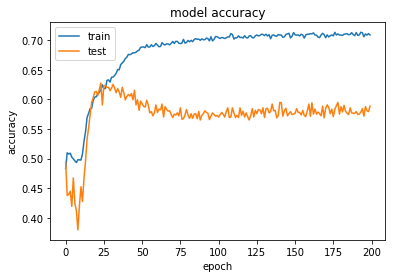

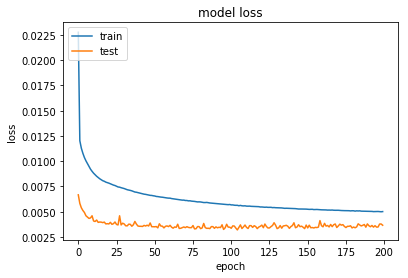

In [8]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
X_test = test['Image'].apply(lambda img: np.fromstring(img, sep=' '))
X_test = np.vstack(X_test.values).reshape(-1, 96, 96).astype(np.uint8)


In [16]:
X_test.shape

(1783, 96, 96)

In [18]:
X_test = X_test / 255
X_test.shape

(1783, 96, 96)

In [33]:
X_test = X_test.reshape(X_test.shape[0], -1)
pred = model.predict(X_test)

In [34]:
lookid_list = list(lookup['FeatureName'])
imageID = list(lookup['ImageId']-1)
pre_list = list(pred)
rowid=list(lookup['RowId'])

feature = []
for f in list(lookup['FeatureName']):
    feature.append(lookid_list.index(f))
    
preded = []
for x,y in zip(imageID, feature):
    preded.append(pre_list[x][y])


In [37]:
rowid = pd.Series(rowid, name='RowId')
loc = pd.Series(preded, name='Location')
submission = pd.concat([rowid, loc], axis=1)
submission.to_csv('facial_submission2.csv',index = False)
# score 0.04137